In [3]:
import sys
import os
sys.path.append('PGM/')
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

try:
    import rbm
    import bm
except:
    print 'Compiling cy_utilities first'
    curr_dir = os.getcwd()
    os.chdir('PGM/')
    !python setup.py build_ext --inplace
    print 'Compilation done'
    os.chdir(curr_dir)
    
import pickle
from ising import IsingModel
import estimate_correlations_ising
from sklearn.utils import shuffle
import weight_movie

(1000, 300)


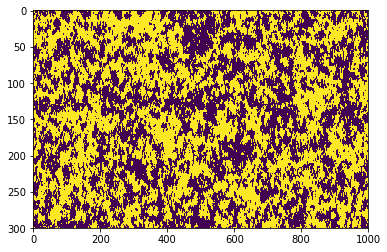

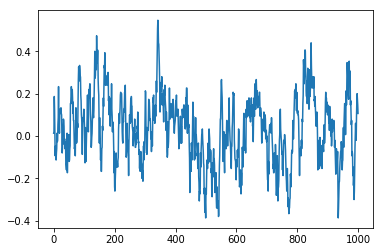

In [2]:
N = 300
beta = 1.

net = IsingModel(N=N,model='1D',beta=beta)
data = net.gen_data(0,int(1e3),500,zeroone=False,shuffled = False) # Generate one 
print data.shape
plt.imshow(data.T,aspect='auto')
plt.figure()
plt.plot(data.mean(-1)) # Magnetization

(10000, 300)


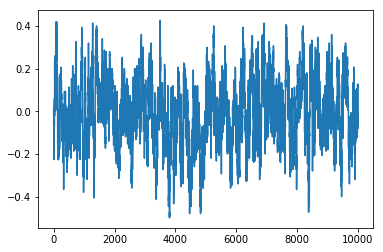

In [9]:
import bm
N = 300
beta = 1.

BM = bm.BM(N=N,nature='Spin')
BM.layer.couplings =  beta* (np.eye(N=N,k=1) + np.eye(N=N,k=-1) )

#%timeit 
data = BM.gen_data(Nchains=1,Nthermalize=0,Lchains=int(1e4),Nstep=1) # N steps.
print data.shape
plt.plot(data.mean(1))

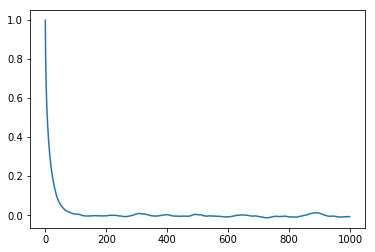

In [10]:
import estimate_correlations_ising
Xcorr = estimate_correlations_ising.spin_autocorr(data,n_max=1000)
plt.plot(Xcorr)

(1000, 300)


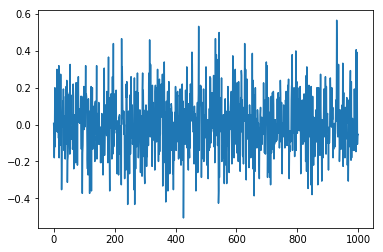

In [11]:
data = BM.gen_data(Nchains=1,Nthermalize=0,Lchains=int(1e3),Nstep=500) # N steps.
print data.shape
plt.plot(data.mean(-1))

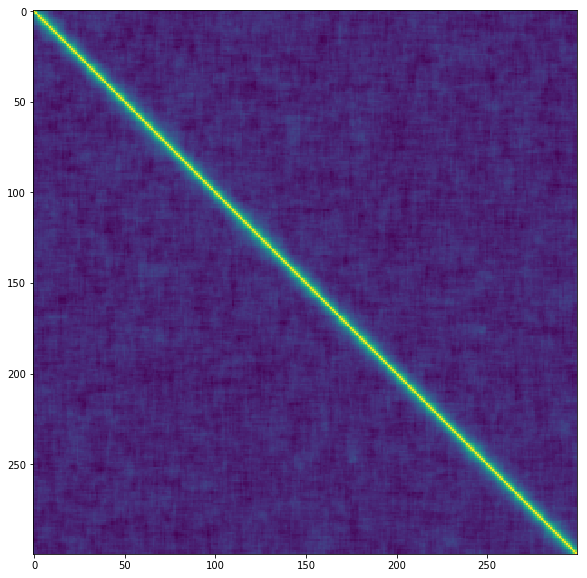

In [12]:
C = np.corrcoef(data.T)
plt.figure(figsize=(10,10))
plt.imshow(C)

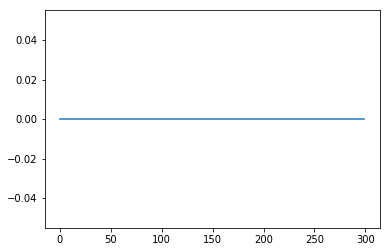

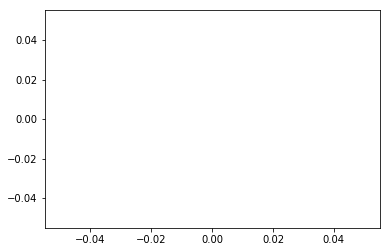

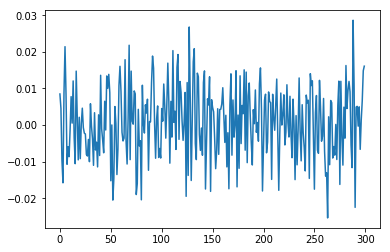

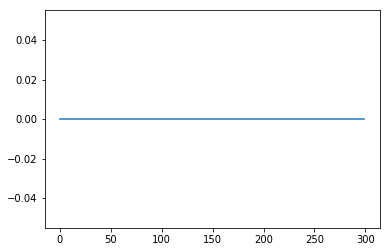

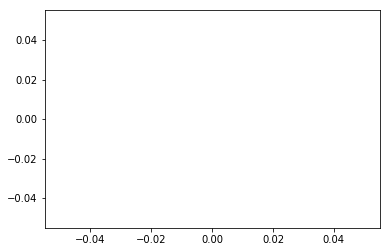

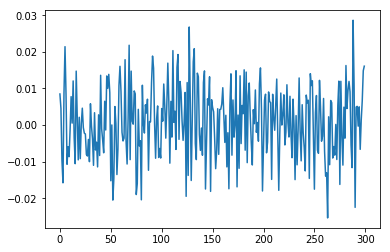

In [15]:
import rbm
RBM = rbm.RBM(visible = 'Spin', n_v=N, n_h = 1, hidden = 'Bernoulli',zero_field = True)
# RBM = rbm.RBM(visible = 'Spin', n_v=N, n_h = 1,data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQsAAAD8CAYAAABgtYFHAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAAIABJREFUeJzsvWvMrdtVHvaMOed7WWt9l30utrGP%0ADbaDkU18ieNrcNukQr38y69Wbf/0RxV+IAtZiiIQshSlQlZQWglFUaQataEJjkMQITjcDNRUKpWS%0AQErjqBTi+JAD+Hbsc87e37cu73WO/njGmHN9FgTj7UN20X6lc/ZtfWut951zjssznvEMUVU8vh5f%0Aj6/H1x92hX/fX+Dx9fh6fP3/43psLB5fj6/H19d0PTYWj6/H1+Pra7oeG4vH1+Pr8fU1XY+NxePr%0A8fX4+pqux8bi8fX4enx9TdfLZixE5D8Xkd8SkX8jIt/3cn3O4+vx9fj647nk5eBZiEgE8K8B/CcA%0Afg/ArwL4r1X1N77hH/b4enw9vv5YrpcrsngvgH+jqs+q6gTgHwD4iy/TZz2+Hl+Prz+GK71M7/sM%0AgN89+/PvAXjfH/Tip5+MenjyVchTRJiBMAGSAVkVkhVQ/xWw/5VfIAByBkKwP9RfIHL2b/XSKFAR%0AiCp/XRWAQs6DrJz5GWKftS5AjPx7CYAq/02EL/LXAUCQ+nvNZ1/oq/4cQ70nPbs/CXd+pHwfCN9b%0A7B/XzNf7/Qn/TQV37kXFvlNWyJrts+xzYJ8bpL5HzvX7iPB7yld9oZzr74XvzbVQ+/MKhOjfoHw3%0AZLX71vqza7bnZw/c/l2Dfb8Y7F5R9kNZ1/P38e8b5OweBRqE9w37jPP94O/n9x9Cfa5rru9XPku4%0Ahn6f58/g/D7nhfeQMyQGPgs52yf+mf7sta6DBq6/zGv9Xv4k7c/i72H3WJ7D+Z/P71MEN6cvfEVV%0AX4Gv83q5jMVXb3WgHh++QOS7AHwXAKRXXGP8lR3+2pe/HZ/4nbdi/y+fQnsjSEdg8+WM7sGKze/e%0AAOPERZ8X6OkE6XvoxRYyL1ivd0AKUAHCaAvVJoTTjNwnMwhnXyYF/hcD4n5EeHAAQkC+6IEMhOMA%0AtU0rawamGehaIGfoaQBOA9AkSNMAKUH7louTItar3hY6QE4zPzByE8i8QoYRsqz8+3m5eyBVoW3D%0ATd43kGHm5xwHboA1A026syl02wOqyNsWWBXim0gV4faEvNsAURBujvz7ceKvMQIhQKcJst3U91zW%0A8vO62/D72PPCqgjjXF4jywptEu8nZ+jhBDx5DbzwEmSz4bOeJq75pudnb3pbBPuewwh94gpy/xbY%0A9Dzc4wzddJCJv2LNyLueny3CvbCs0PsPgK7jOqwr0HfQ44mGcbeBdm39HAByGu05rlzPZYUuC3C5%0Ag6yZ9+rfDYBuWgBAuDlyP/j7ffklSNsUI6KXW65RpIHUBzfQ0wDpOshuC8QAbXjcxNZcUwS6FhoF%0AMi6QceJ62OvwpS8DKXGfDwMkJeSnn4CME3TTQpYMOY3Iuw1kXSHDxDVoEiDCNXFjmRU//9n/4bk/%0A6kE+v14uY/F7AF539ufXAvj8+QtU9aMAPgoA3Te/Tv/al78df/UVv4ExJ3z8c+8HECELb7JEF+PM%0Ahbm55QKvK0QEOgwIXQNtE5AC5DgCbYOcAqOIGKARkDUzWpltY4cGYZ55IFWr1c5nXgjgA9/25ZDK%0AmqHryg3atTzAMXJjAwjDws3eJr7XsvLftj2wZhof9z4hlI0k08xf56U8J1lWHsycocPIQ+AbueeG%0A8e8aTjMPNEDvFFAPugjy5QYyzPae9hk5Q5oGGgMPX+T3AcDNB0BW+3xpgCjANHNN1rVGWxONoqTI%0Aw78sNELC12NdaVSHEZgmfqYqfz2egMtdvec1A8sCmQLv3aIhMWOWNw1CzrzHpgWyQseJn+3eflmg%0Ah9PdiCJF6DgB8wSdF8hMIyMW3WiksfdnKMMMmcyYnwYau/0RiJGeLwSL2MC1HCdzKMpD3nVA21RH%0A4NHJWUSiYj+/8j7VHcFXYYnSdTSaKQBzgEbeqwxCMCFLcSaSZ66vv+Y8Gn2I6+UyFr8K4E0i8gYA%0AnwPwXwH4b/6gF4cZ+MTvvBVjTvjIqz6Nf/z02zFMO4QpIjeCHAV52xJgWTNElaFLzvQ+TYKW8BSQ%0A2wPQtQgiQAoI04p10yBMa0k/ABoi9+DaNyUaKDG8h/WBv9c28XClSGtv0YQcBx5026zaRBqfJvIw%0AZ/NYtnE1RcD+cy+DJtHL9V3dLPPCz5gXvlYEehq44YMA+z3Q95AQ+BldS0MQhK81Q4Scga7hfWSY%0AwWtqKqHKTT4fIVlpsI72OebVddMybVMATeJhW0GDvcI+R6HLCuk7oGlLJCG7LXRmZFYMcYw0Qn4o%0AmsSoIgY+E1Xo7R5ICcht+TuAZ0P2JxrLFBnqb3p65RQZJaXEAwgwtD8wEsU4Io8jpOVz1RD5LP0+%0Am4jcRjqpJRevn29uue9E+N7LAuSG6cV5muPP8zQgH2lYwnbL17SMUjTTGOLJe3bQGW1o3zISAiDD%0AWA3OstCwDgK0DeQ4IHiqdjjSGAQzrP75MULnmQ7N0+aHvF4WY6Gqi4h8EMAnAUQA/4uq/j9/0OvD%0ABOz/5VP4+Ofej3/89NvxG9/xo/jLX/iz+ORzb8HtdI2lF8SpQwNAhoXhX/nhAO0jDyiAsD/xwcYI%0AGUYevhSKNxbzSBojU5RNUyILWdbiIXXTIfcJYT/yc1KkMbGNoMvCjdMkoG1qRLCsCAfmvTKYtz2N%0A0G3PX7uGHtxxGAtHNQTobgMEQB4c6Z0yU44SlopA+o4bSgTygBGWe1w/HDJl6LaHdhG5aZFTsBw3%0AIGRAJqER8mhtXhieZ4U2AtkfGbkFqdHOYeBnApD9Eeh5uODefFmBeYbEQAMO8OCHnpHI2ffjfZoh%0AW1ZICEzj+7ZiGMlSvCDQtqEnBYCcuWbNlW+2cg/o2mK0pW0AscMZhIZClSmLKqRrmSZZSpKbyO/c%0ARITjDFlXGo6+QVwywlNP8vudRn7vwLXXFEv66WE/lgWy3SD45wLQeWZUBZTUIm/aYigQAnTTIvcN%0ANAXEFBCycm+0DV8zL0xlAT63cULeH7gmm57RladJAPdyw7PiRuhhrpcrsoCq/iyAn/1aXisZaG8E%0AQMQw7fCXv/Bn8T+++v9CEMVPPvs+pEPgwTq/8hn4lBVymiDTXHJi7Ro+UPNeYqBmGGdurpyhKSLk%0AzFzRvfdk3l8EQZWbb38Eri9oGESATc/PSpEHwMPLzEOau4Y55GmqufIwQY9HyGyG7uoCKg4GZob3%0AIvRqc09jESxKscih3HeToFGAiy3THTtknrPCMJZouEs046ohQKaZ95Qzn+m82M/YYc+MhKTvoMeh%0AhK+SFRosLfKoZ6YR0K7h8zAMBKgHX2caM73Y0ivGCN12PCTrSo86TdBwwbWaHOMJjMYcpLN1BgCZ%0AlmI8JEZAp4oBxIbPJFZwT05jNe7zVPfQstwFSc/C/9y3yH0q6JtuOn7vFGlcNxvbX5kRQQjAxYap%0AZ9dCHtwCXUd8Zl7oPDYtD3Tf1TWb55J6aLSIZvqqvaMW7Y22x30vWGojTcMobF35/TpGKBJouGFr%0A+rDXy2Ys/iiXrIp0BGQRhCnik8+9BUEUf+Obfh2feN3bMN5eYN4lqAiSRwnzAjmcGD7GUL2WKsNy%0AoIBAmBcEC/dlmqsXTPTauukK4KjjBChTDV9E6TvmlvyAEllgHCEXu5Lrlvw6/T5h37LQs6wr82xV%0ALqjdS7g9QbsGcbZQ8qsqENowegqnmQYk57JR866j9+waSM7caO71ABqvnJG7BOkTwq297zgUz4oQ%0AmCqsuUQU5xUSNWMGJdahfQv0bQHTmDJ1wLpCU4CcCMIhtSXVgxU9ZF65ftlybEfvVzNgOTN98fdd%0AFkYZMdCYiEAarWuyrsQGAH7/nCEqPGCnsWJba4ZOM0N7CTRuMfBZBf5Z7PmLKsJiWMlxMFyKEWlJ%0AHbNFVgC0T8ASINNCAzjPTFEyf04MtEYm/iOnkT8bDHNIkdhSFIvwLKKMYtGTYTAi3HtuSDwlsmgF%0A6woMI7/D8URb9w3iUj0axiIrNl/mRsmN4Ha6xk8++z584nVvw2/9h38XH3zj+/Cp9V1obxLamxbb%0AL3dobhbEY1+qHDIv3BxmKGS0Q2WVBo0R4TgUzwxV/jovFVD0vHPNpWymZZFzLbP55k7JwmlWQHDV%0A8zALkLcMX0WVPzcvCJcX/JkmWcnWEGxV5IstkELNl4cF4TgwNE4RuuuZopzGEv47ZhJOMyshKUCN%0AOiOzAWZtU3ACWVluzNuuVExkWfl9esMT2gbwcHlZSrirF4bo7zaMTsa5ALO5ayAp0BgY4Ke7Huu2%0AQZjts4eZ2FCTCnAKgEZznmn4Dcik0VqBW4syAu9V+w4yL8iXPQ3GyPfEuin4Ut52iAYIO36DvuN9%0AbBLEUyAHZ834h2nDCMD2ikcZMi1MmxzA9YjMgeDA/8LtUHEVdwp+xQg9DpBtT6PXWtR7HPi+hyNk%0At0WYt3QgHh169AwgX28RDUSVpmFqBkDuXUH3R8jWotEUKyDctVxDB+Ef8nokjAVU0T1YaSyiYOkF%0A6RAw3l7gg298H/7WM/8Mb/hTb8X8fIt5J2j3ASoNUhPQ3HBjuw/WTcdFCKGEcrKwTKZBIGDEwJw0%0AGYAZmIoA9aEHMXCLB4wI/WrgZOIh9rKiczXME4VxwRrbciBZYWiBrqGBCqxOyLxws+QMXGyhIkTi%0Al1w9gm2WsD+V8iQjAanpSVaEw0hswBB1WVbgeIJsNwV4RZMg81i8IVJEbpkyIYTinfP+ABGBXF5U%0Az7vraSAs9NVNx9dauB4PLAkjRsgyAZMgeSVhXoAHt5B0j6/JytTlbAPraahec1kYfb3yCRqRzCgM%0AUYBVaAgdfG4Mn3BPO69MQQ1HIQ6RIGGpofjRcC3Hf24tSl1W6OW2UhVX5bqelZQdl/KKEU4DZE41%0AygiBDiFyn3jpsqxX0xQHVhzOHQwOpToihlkgkhKgMTBCPZ4QvPRrFRltkqWKAola0mqPxL4R1yNh%0ALCQreRTGFYhTB8mKeZfwqfVdeMOfeit++z/7n/GhL7wbn3z2LXgJl+hfVDT7gG0A4pwRTrTWmGbo%0A/sD3vbwoD0q7BDmuNCa2AWWaka+29LaXjAoKaOff7TTycByPJYVQANI20G0HbRPii3uEeWHovmbo%0A5RZhsGhFtYathnBr3yIs1VihZc7PHJ44ixwH6IFouoQAvXeJvGnJlXjpAd/bUxqAFQj/zsZDQNPQ%0AE50IGOJyWwlPTQRWBaIgdy3WixbxhkYUl88Ap4kb1UqkchxpGCMrLTJOwDgh5Iz44IwAFZn+aZsQ%0AjoYF+Xc6DvyCQUokiHbDkmdgiiEpkUPTNtDCQbGDalGOvSHWq55GN4S7UWNiZJCvt8CSEaYFuUkI%0Atwceqq41rKXld+l7q4LlGmlataZwbESYol7ugKjVoVh1DAu4TyzikOaKEWGTmEJebi1iUEaIq0Ie%0A7HkrTcP3OY2lKiZZiZNY9U5WRn3StjVtsxI1VLmnuxaCUMvsAMFW1cpteYjrkTAWUHBTjzMCALez%0AKoL2JmF+vsWHvvBu/NCrfw1/RVb8xOffByAgR0G7j5A9mOvFBCAh5MsK3EUCUtpEllijlDIk5qWE%0Ax3lnRKo2FR6GIJRIQNq2EG6crJR7K8eeMwZVbdPb5jfikKPiheTl3sUJNNPMDduh1uQlMCddVxq3%0A2TgXyZYtKwE7D5vNw2oQiG065MxypntfB4pTYGUIAeF4YgqRWToMw8L3mmYaxKYn9rNk/uoEo8OR%0A0QZQqhY0jqsZowqs6czav+y2PHzBQGu1w68LdBiY588LFAMNl91/OSAhELBMEeFEgyfDeBek9DJi%0ApqGQk+Xw+wONteX4uN3XPH9dmQ4B/M7u7S0qxcRKT972jEptn0gIyNc7YjRetQoARtt/pTTuKbEB%0Azctc1gswEHOcICfDmjyNiQJdUUmFQZgS2nPAsnBvbnpGe8bpkRho3Cy6+RMDcAJnNOQ1Q8wrpxTQ%0A3jD1+OSzb8FfkRV/45t+HZ/8ljfjsF5DNCA/L8jJ8uTOGInHkbmzHyLLKQGi+bI/lpISmW6VKEUq%0AeKoHx/PflO4i8staeRvBwMizio0cR5Yg5xn5NCC4oVnNEwGQ22OlMsdQvJpe7bhh1KIcTz1WlM+R%0AGJBPJ+iaIU0iOm/AIGwz6cycWMcRyBaSdy0NVEYpN3uIL1M2VqulPssKHEca2TZVenwI0L5D2G2J%0AIwwWdTRftZ3UWaIChGi051ByaN2aATXGpnhIbYQxgsjGKbnYMsUKAplzLWXbWsCIZp7PQ5WRTa6H%0AzI2s3LsqB8jJcPB1VK2VE6ukOZgrsxHdYDyalviLWklZ+1RTJKBWzwBoY+ucK1alMZRUTJelgut9%0AjQJylyBzhswr070bOyuOmxhQq5sOuU2MWHtGH7Lp7XtWo/Qw1yNiLEBv4sQXs+qiiu2XO7T7gJdw%0AiZ/4/PvwyW95Mz793o/jL736A/jUZ74NkjfoXgrQdIl0XBGmDDxxUTgR4fbEjWXoszaJhsIOqRwH%0AViEeKK2yA58hIHfpbk3d6d97piQBYO7tUcw8c6N52W+7gWCDeLEroJOXbB3YRIwE0IBSPssXLWRp%0AEIepMkedRnzV0vulSNKZ/5xhCGXzNQnSttBsBDar/DgSL/NSD/c0Iz95yQMXWsi63AFyWQ2wdAdg%0Ann481UM1TqXlQVa7v9lyeksJpG2M2hxq+W81OvLmzGhkYglIVk7c9ozO2gbq1PJ5MfzGDsA4EcRs%0AGzMAsfBqfG+RFNXQAImUaoPMBmB6Fc3TCovUvNokJ8eDzEhl0EimyHaCnJHbSLhDBFiMd2MU9Hg7%0AAFmRt10lj9m+0dl4Pn0Pudjy37yqk9WMywjJDTCT/q+bjvfVJALWS0Y4jgSjba/KvFjpVCuN/SGu%0AR8NYKKAn23z+dxbCNTcLVBr0LyqAgMN6jb/06g/gh1/3f+J74oSffuFdWPqAOCb0QRBPK1LWQsQK%0A9/esCDg4qAodRpZGl5WA5lc1mmHNBMlCZW2Wjekl2swSo9OERYi6y9qYQUpQqWU4TEYpN2OjlhLI%0AWZ4twwS9iPRUHnY7JdzQexUBtr1RrCfIZsO+AWfv2WHUvjNDNhNc3Vh+v2as1zsaZcMhCh04RR6K%0A/bFgLGIRmBwH9nhkRb695YG20qeqkgNgDFNcXzIVaZtKRZ4sxDdug+YMgCXrHAVhfyoUdM0EeHXb%0AI19vIfOKddcijEtNxQywhuEOhQ9ixKWCOZz3EQ2GmUwz18RL7l72VqXh8e/QWhS2ZGgXoVOi984A%0Aukr0QxBSw7vasyOqZAVPwp/N/D7aRciwGA3fOBsxAuMEnWbukxh4b17hMWKYc3y0a8gDOg40kMex%0AVuhU6YgMUPWU7RsBcT4axgKoueMZ4UQOJ8Rjz6rHnhiFaMCnPvNt+J444W++5lfxy9/8JuzbC7S3%0ACTlGtHtWFNJpAZazMqd/jpcdvRtwzdxQOTD/9vTlMCCOZ3m3h5SBC8Zyo7E/hZRwWWtUUsurEZoD%0AeR1Nc7f0Ok9A2rCk2CYEiyziYeRhO524IY3FRy/VQO6fah3/vOKCGlk4Wq/zTKNkjWLswFyZei2r%0A0dwXMhgnM9ZrXYPzEjNgwK4j/vbdJKdi6CWxLMwSrRmaOSNY9CSOAa0r3ydrfW4euXkJ8IwkpYLS%0As1GJbKmmOrned+4TklVuNIZCmXZPrKcTZGkq8/U4GHHK6eHEPPILLyIsV4jzgnzJNC8eCHhjXhlR%0AZYXsyByN+1CjQ2te1NbudyQZLlrzV0lBlBGtjqxmoa1VIgUYHc+5Au/OMbLqlRpztLQFiBDMn5ea%0A5p1V1R7mejSMhYDdoyIMm7xBZ9NBVkVzM2IbgHYfkZ8XSN7gp194F375m9+Ef/W+v48ffOFN+Ojw%0AndgJc7j+hYWosxpddtsVlJm9HEoMImfmicMAPPUEECrZxjezHE5sdAoCuSbCjYWAm9xWEFUN4HMP%0ATw90Zvi6joQgT7FSgt67gq4rlssOYSFeEKaFmMGy0rNZ6O6HQiY7tJvewM4IDABuD7UZ64yVSDJT%0ALG3aDL3XUjmSwUrJ7rm8LLhm5Fc+UXAcmY1V6KU4L/tZjo91rVWorgWGESHRaMr+xEqQSEmHJOeC%0AFQBgk5txQ2D/JsOKYBWZtJDsRhC6KWG8AuV9CsFOFblrEG6PJd3SbU8P3rXQ2wP0+tI8/0JPbCVK%0AxGgAdQS2G+i9S2ibkLuEoAz38ybSwIUAbQJkzvz+azVusmrh+sSv3DDN9mY3Xz93Yk2CNBcFX+N9%0AtNAUsG4axNPM6G+arcelY1oWBHjxPtfBUhfdkS+iF9tCpJPTdKfC9/Vej4axyObdh4FgWh8rgGNX%0AnDNkD+Qk6F4KWPqAfXuBH3zhTfjepz6Dj73h3TiN96BJ0L+UEMeAsCjSA+PEGyGpsOs8DWgbWnWr%0AOCDAmJhG5T2eCDTCWJMTsYlCyPH3XWprMEQQhqmGgO618krwXwmYyoEeNUxnugWqAKwaclbu8lZw%0AL7WSM4KKnKczMC3UcjEutpVnkjMJR5HYgO42fM/gXtu6dm+spDcbEOflSH+OAAHLlCyNCaX6pIdD%0A7Vx1Q+OcA6+iOHHobP2dM4E28ZCdp4aBpVoNLY23N+JZ6uAcg0K288ujIMdmTmN5P6/auNH0dUM2%0AGrt//rxA1sw0wLCSAnoPE8vg/jqPTNsGmAOrNE2inIED5P69et4LxglweQDHGPyZqCB4PxLAfWZG%0ALXcN2xEudnwPsR4jEaA3LseqELVnm86e59d5PRrGIgSs1zu2mWfr1jxNPLAzw9twaowKC2i6RBwT%0A2tuEjw7fiY+94d349Hs/ju957XvwC8++Gff1Eu2DgO5GkfY8cMWumkeUtrUc3CodnrOKNULNzCv1%0A3iWrIvsTG38AMvGchdg2xDdsU5XLoxj7FZu+4BC60AjJbmuGZca663iQQ+D9r0okfFxKoxEAehc3%0AQOMEHCx0zuRzkMRj3uuMvASgttIbeQzGAWB5cS7gnbeO500DKZgNKvHNsSXrq9HjQFDXQDo1o4yT%0AeVI/JJn5tINt2tUGMaeoF1GbbD09+6GWZUEcQ1uWwOPhBDlOtamtayDDhOjP6izMd96KLMaxcIzD%0AqzJuiFUhD6x0erkjQ9S+XyH72TrcebZNojFqvBluLaVzxMj0wl/nDM0QoJc7RhFNrNWbFEtDmWQl%0AZvHivvbNhMCSajQKQEt8DbORxvx5+95bV8jyJ8VYQEhVbqtnEO/+dK+wrEBM0C4iHVf0QZBjxE4C%0ATuM9fM9r34O/+ZpfxffHET/+7AcIDDWC7n5L/AKoIF5BvY1ht9/TS88zDYkLwmw2xsoDnJ/PikoE%0AtDESjoV681I8Oj0XeRyY58IWLIYqRobu3o48r/QgAcCcIROBNrFc3LUmxDyjJpQcXWIAOjItdUNQ%0Ak88rk8xk5Kv1soMsJqqTMwKA9bJD7iLynBCPMw9QjAibnmH7vJbyZO5bAAT8wjwz5Sk9EkwNxLov%0AS2NUl6rehvNKvAenJ3chHCvoqPNcuSwAOQz7A6sEQCmdok0Mz0NgqhADZB5KA925kJBLCOjEsqQq%0A8RvtEitlE6MIr1BpkxjKWycwwJTiTirr+9PTQ5Fy+Mt1xohliz87cT0CE4sGWGWLxtokNpY3DXIb%0AS4rjKZYAjHRjAFYlcDqfVYCcLWuqXE4SvMOveYjrETEWPFuw/oKwZ3jmTWG66cyqEiwKU0Y8rWj3%0AwkggCX7h2Tfj++OIj7zq0/ixZ96FIfRoWsF0ZZ5r6oAgiAfjIcDAwOOJTMFOazvxODIkTDM3ULcr%0AC6+ueOVeaAWAyifQ1jzUwrxbh8z0o9nVBrcUK//fuSWGWUAMWV9zKYk5ZdrBLG/A0tn6FQCg6blh%0AjIR0TlHWTQdZrSXdPweAjCsjglBlBr3Dkc+nbjJZ17LBpW25wf07OYXZiFcBAFSRL3vyTbJapSMV%0A7oIchxotOKiXM59RjKU5LFxdMoVqLIyfF8j+hLTkmo54CuJ4QFYUGcRlhmtJ6LJUw2Bpo3j/xZpr%0AZaSIHJHb4muauwbB18wp9P5fkQKUSkTbbawyESA3B0tfY6nKedQTZpLg5DTSkGfuh+WihWRFmM1R%0ABCkpX5gW5Jb3rJKwXG8ga0Z6wOZA7yHSYeCz96jkIa5Hw1gIWBY7jpDbA8uKm742hR0H6P6AkC+h%0AxxF44gIpKzQRzOxfSrivl/jxZz+AH3vmXfjsd/4dfP+X3o6fevZtuL9eo9kHPPEZQAPQJEG0rtAw%0AEPwK5m3VH6hTa0NAvtwwevDQurGDPhMY83KieDWia2tNe83AvUvjC3TAaYJrH+i9y/oau8LNqWpq%0A2Ib2KgTGidyF5uzA7bYFudctD6Zf6qmSibTIvFa2JRpkU/GKh6lwUrStIDCswUwGov/y4Ja5/NUl%0A822T+ZOoQN8hX2xrf42Vk8OwWLk3l7ZsddEbW1eAEQSlAV2AJjEqOdGwM/yX8qxkf+Rn3NxCri5L%0Avp53HYL3b8CM8uRsWWGkKMI9drEFbg8s9QKQywtiZi77J0K2ppdiA/g5m5aO4DSywtV3UFV23PZt%0AjSZUyc8IoZbOh5ERpvWXlJK3dwgbr0INoE63VhXzdgMjtulpIM/GsbUYEfcT4oMDtGuQexN+MiYn%0AshZpw4e5Hg1jARQSDLqWYbqF0wSNzsCmYI1EXh5dFXEMaB/QKw+hx/d/6e34yKs+DQD4see+A7kJ%0AGJ6MSINCMtmL7rFlMABuMMu93UKPaxEOCfuhLqSXUc/y51KQMsBT+5ZG5MzDsFR4Rkd2wEqkcBFU%0AxOjooXaaen4sAl1WIBj/YNNV4RwHE73EuWZgPPMiRqtW82JeVSmydOGsryOZMYrOWVhrGRiAbLfW%0AMNXy3qe5lOx042XSBTgORdBGFrajq4XtpVzo+IzrWp61fcvhBJmsWuV8j3mpKY41x0lrGprdGY/m%0ATHHMBWOK9/c9tixFP9UdhA5DkRAQa9AiEUoha2JDIQwIjla1c2Urr+guaxGZ8YbAmlrO0LyWCKao%0AWHlDmJeDx4kNh6vtLBcOSonWuxrsAAAgAElEQVR78uKq9LXkNhVN0jAtlXDXNSVlxWLt+8cq1fj1%0AXo+GsRCG7zkFBBF6s2UtwI+cJjaFea+HhctYuNHDouhu2N7etIKfevZtAICPvOrT+EevfQeG7QbH%0Am4Rmr0gbwW4iui3zypx5WSyfXoo2AACStta1GgQDW9eLDWGMKOw4XA1V926/dSV12vUE2qbWwGMo%0AKDpMGIZKW7Hkll4xKC3PyshFrTpTMBWRimv4ofYSoFcnnP/g/I8gtT3dekNg9wIw3cjWnKZdADYN%0A2YGwyouq4RdAcPaiAaNiRLUSoW06GqMmQZxp6K3zHiFZv47MqOAm1srrcHDXGJeFbwLU1nOrQrB/%0AxfkPjMr0cABVzFHxqPnMmBpl2j2wyw4427VgaC6Ge7GF5PVMr1SKoS36mWuGLCh9PtpEYNszanHt%0ACaNoi3XgahOBHSOf3LfEK5y0BzCCMa0K3W1KZAiAP7vkkqLIaYLeWhnbU7P+T0ojWc7UgYgGdPZd%0AIQ4Vj2Dgm1O4w/19CT/TgxZp36O732K6iri/XuPHnvsO/KPXvgO/+R/8PXz4+bfhY/nPof9iQv+C%0AoD2YZoSaN+xbdgC69NrFtgKs51oGXhadLAfcsXlHo1RlI+MAIHADll4M30TzUlWcLLXJ5mE1BSPw%0ATJDjXL3NshbwFUGgw0hPaGEwsvFGztSlmPbQeOQdKwhrn4wFmRGGyVq4V2OPOokpIhzHu3m5e+1s%0A9z/W7tzcJaAFEATBno1syQHR0k5vKZqJ3qhhMXIcGFE5CWtW4HQqmpp6uwcG4lKO+rvcHQBotyPv%0AxMhMWLV0leZtj/DANDzlTHzG+0c8ylozgAx0W5aCN12Vu1NFNhxJ3UC+dMM+jmUBnrim3kVHgwrT%0A9nDxo9xUgh1efECR582mGr7GVNs98jGdizDOwOTEPdMjfXBDI7wF5BQQutY6ikdicCnSEeVQI9p5%0AgmoCdhtGSw95PRrGIpB1p5HiukVpysRI7sjme87vHZbb2prtVY9mH5h6bDf48PNvww+88l/hE695%0AKw7jNdKJTNCi+h0CdBMQJuutGAkuluYu1bulS8DArwxM3kMR7yLllgbo4UgP4ptizYwI+q56rmlm%0AvVxN+ckqLwD5EqIsw+mJUvCsrFAw2LkLkAC92FS9iWkGtCfpqJCtMuKwsGV7qEi8a1qGE0PnOyK6%0AQAVd90dGCGsG5qFoXkYjbOVty/xajPx1OJBSb63S4sShZQUGk/abXJE7Q5Fq9cLwjSJEbEIvFLox%0AxqcT0rxPxNcrRvauRLJmCSIvUM0lgnCtSrXvUHkMAhyOCLstI4BNXzqDZZyZGremBr7pkXc9zklr%0Ajo3khntl3bD5Lj441TEIQWqPkbX5exRZRgR46dWqbJgX9vi0TQWTgdqT5ICm8zmSlsY5aZqafj7k%0A9WgYC1h5KgLrhjRciYIwm9Zi10I74wTcDszL3IBYnu4FN5k6PPEZYHgy4niT8LH85/CJ17wVn37v%0Ax/Hdz7wfv/TZb8P9eIHtFwPSSdG/EJEOC3C5pSe53pZxAa5m5VoLahbc6dXaRIKyhWbbliYpEqgs%0AJ/cSVmAnYJnzcb1FMCOzXjJEz21CFAEOA+/bBFxC9zTbsv2gG3biYjEkMklpTJLTVDGWpYFe9qyU%0AnJUyNQq0bSGjidN2CXFVYNRCOBOAUYL3drj2hEdLGSXULq3pbUO+wZorual4OxoZ3fbAbkMsxbkQ%0Ao3XIjiNwjAy7n7xXyXnqOhwrJFvo328g42rCOArdNAhBkC96YpIgHkHj6hFfLKkdNmfqVQZs56tt%0AAX1lmGioAqMubKq8f7g50mn1DXVGQkAAEI4TNIRajs5aW939GQKQmwPTyhTJuPSqigGpmnzOzMxo%0A1wWog2C56pHmpXJ3mgSETUlFpW3JqN3UqPZhr0fGWABE0cNkdXgP+Y8DPexxZd4N1LZtoKL3ALx3%0AQwOQBkWzV/RfTDiM1/juZ96Pv/3MP8X3pgE//qX3Q9aAZg+0NwHaBsgx1yjBvLz3DrAGPxJLOS+X%0AOQmmsP9yAfTE+P6ymkaneXE9nIp6E1aLntqmdDKGiRobrhoGsRbq841hICqsBKvepxFiVYoOAfri%0AfT6WvqdRcpDTsAFBYuu66VaEcSHl3CMrALpapLCY8lJoih4FG6iojhWOU7kHrCuxAhdT9hTA8/9x%0AKvqgd55nkDKYCAAb/g4n3k/XGEsTCIdTTeu8o9i4CAVsnCpJTvq+8FAKi9fLta5n6TwEpZTeHVl9%0AgI15feKaWySTrd/FS6sOyueuQd4kSy0FKQrCaj/nDXeJTlDWFbrbsFFuOtNLEaktC533mTTGgo20%0AgjHU8vG8VPEcB5GDlNdI/BMUWQAWXYhAcqYKt3lpQazYgNOePRXwkqbl2PEwoUkCyQlpI+hfEKRT%0AwC999tvwvWnAD77q/8bPfctbcFyukb8SMF8YzXntLLoRxGGBrNajAYGsJtNvE6wKAWteuDDWSSkr%0AN4MuVH+W7YZeEKjS+2fGTRxAs1SEEUs1hLJkAr+7DYKV8nC5qUCeCLEMG25UQtRkBqZtGZZaugPX%0AnLASZwHJDC9ZN9bodr2rERXAdOuWIb7GUMWMH+xJl9900GjgZSS2JJu+9KoowAqHqaqX1MHb/oFq%0AMFIgVmEENhemkSZBg214M1BwJXXHeWYHqtdSWsWyUGF8MHDTG9aMcSmdtYw7azdxyJAYFwTjVJr5%0AZF2RfVaJz4aJBBeLjF0yg68s7WeL2IKlUmh3tSHM2Z2qRRsFQEnDzzE79ZK9GRHOo7GBV7IWJa2C%0Al6kCczJOj1bn+hDXI2Es9KxUJ6qmiTmXWj/nVpguhQnX6EB9CjnqHeYlLrbkUWRgN2W0h4gcBffj%0ABX78S+/Hz33LW/Dp934cH3rdu/ELv/1mPNArdC8GXD2nCDMXLRynqujsCH0MUExF5/CcaYi2ge4P%0ABpyZIpOBarrtmc+bIZLmqxp6zislZ/z9gpB7w9XxhGClyvOJZnoaGFb74e6NwDYslOXrOkBzaf/G%0AupKbsN+zFu/gsf8+VgCzKKEDVb7N8Zu2IZAJwFWxxYFPV/Zy7KZrKhnJK02W/2sI0J5jJtUdwFNP%0A0Ct+5T6w7ZiyhGAkpAC9uoBP8JJ5hW4a0wDJBHEnChOhfQVkmkl68s7MEJD7hmrZfcvv2NTxi7I6%0AZpBL34sLJmsTCXhayhOG6Q63xQ2A7poaGRuWUcZPuuhza5PYxpFGYLdh2r01rdPjifdpxiu3EWLt%0ADojcK+v1BghMmeLzDxiJdW2ttJnGqI6Tqcg93PVoGAs/KDkDkOpdXRTEN59IEa4pk6gsBJe2rdbT%0ArHJcjOQSBdsvBsgacFyu8aHXUaLvQwB++rffgzgI5ouINGSG4B7SbmJJE2ACLH4QWN4M9UClxP/m%0AmepVFrbLOBPk7I2ivJ+KUcwbU6AaTWJeecDkNJbPhEilBouUEY7OF5BovSClryRR1clJQ4ZrFPao%0Ab9bEzkYPs3Njg4jmXGn3ruKVMzB1fC7HAXKxtb+391pXKz1mADYUp7OcOQj0Bat6xFiJZDEib1vk%0ALlENvUuI+wA1XVAACH3HaMZ6Zfzvi5itWAQ2ryy9qhJzAVidAmjkcyBhSoQGJ5Il6ziFp0TiwkST%0A6ak6lgJwr82wNV+sXLmWmaz8HkuVUuxr9aEY0RiAhtEZxKbGZQ5Phog1lfWs5FiUxJJs5NpYhQaL%0AUrYRjMYhQoA7EDfjCIy1tCNI19ao5SGuR8JYeMimgXkpZ3ayq7FEFpa3A+ACL2cb1BhqkojWh2Ex%0AJHmFKOd4ppOi2QP5KwG/8NtvxocA/NCrfw0/88xbcZo32HxZEFbBdNkg7lMReC4ev01YLlrEcaUY%0ASmOLOJISjkHLOL1gak967xJqhkKNBxD8sNt7F9DRGshUOP9DbVPmvkEY6AldAEeGkc9ku+GGWzh3%0AVTcdKwaBnAGfkOVivnocGGVMM0G/Q1f4ArKx8YYKyGGohCbDJjzjFec2AAyPbfhO7gyYzbnk8HIc%0ADOeIxbiX7sucIdNyJ7ohBftMo2OiAlcJxw2U5azRlfqgHnL76xo7FDkj39tVhSs3xtYU59yekt+L%0AFAKadnXUpIAl5rAfoJuO3afRpBh9cFQmrZqUcsOx9kfqlXSdDXcXQBN029RotWkAnMpeIK2dhEQ9%0AG2+ADCDwnMhMwmBAX6owdRCVGqmNrFQ9HBHO08+HvB4JY6FGVgozS39l8K2LrogQoTYugNgMBqzU%0AoxCTU4MIcDwZTVlKk5KGgP6FiPaGGMUDvcJP//Z78DPPvBWf+Qs/gu/+3Pvxi/Gd2DyfsHleEZYt%0A4rAiPRipSWGGp3nhUEtoB87/rC3bhqecBhoK18Hsvc8iF8At7zrklt4sZDYFcTjNahUKGpewEPAN%0A+wH64IYetbeZGY4fdC0kWedk5uDntY+Io5QSm89AFSP9cJRia5oIDGdVpHwnjzjEGuGw6YHry9Lx%0A6kOgsSzASwPkJiJeXXDGbDTDcBxMZs96Zgy/yBv38JE6EE0ozze3yRS1LUf31m3juQQrp9+Zah+1%0AGpmcoalBbiKCD+ex+3A+gzTJFN2FlSxLb7Vr+XwdGEyx0NF1mqgn4eMBj1MZ8CTRqOpXO+InI/Ej%0A7DaV9TtZ9CFi09hyqUqpmuxhDMhPXJoGLKqhbhPCcWS04AO9Ny1B2OTMYJtB4kYo2eDmp+6Rim7O%0A52GvR8JYyKqI+7Eobcsw21j57oybHwpvgJJ3BmwOA6sOKUH3e+hMbyUxMkzvW+gmIB0WaEsws3sx%0AIA6C07zBd3+OVZK3vPFNOLQ7aAhIQ0ATgDhE6Mow2PkGAYAPILpD3fZRgOPIhVpW4IkrSAq1e3Hm%0AokoTEVYtiLnEDExWqnNv0tj802heuGmAvmdzkgG6pXzseIJHXNk9pVS1JBeIiRaaegv1NCN0FgkY%0ASY15cSxYQenLCEbNttKxNNZ27WGuTxCPEUV4tm04lDl6RYkHP+5XziLJinhzKmDh+QR7Z4yWyWEA%0Avbl3cAKMuBzrWFfIzKjQ2/DvSBSuFPaR/alK7W+NK9E3ZSBT7qw6ZQdcstZhQFeXZ4pajEbK5Ho3%0AWJY2saoyWtRk/Tebmp5o35LTsemZjiR7L6vMaNtw3q5PRvMGwdn2vlPaz4RtPALX232tLM01DX2Y%0A66GMhYj8WwC3AFYAi6q+W0SeBPBjAF4P4N8C+C9V9aV/9zspwoODlQUNkXfEHCy15UuSYGS1ORUA%0Ac9Gnnih0a25cywEHDrCVB3sSri63LI+uHa6eU8wXEZsvC34xvhNveeOb8P9+4O/hB77yZnzst96D%0A2/US7W2wFncuRLo/cPHXXKa0I5IpKbdU0tIjQ0q5uKAn8TJcRy2O9bo3qf3JWIvhThu4N2ABOPs7%0AG7BjorKAlZVVgZdumFaIDUmyduzgQrguvnKOZ6T6e+2s8cnxkHklhtCwLV/GBfmiK6pP3gDlJWLt%0A7up3qjNifWpaDPV+3OsFKRqSauQlNcGbMlH8NAKztYxve0YBt0dgWZD3BwRc04t2VkoMgRWEcw5J%0AmxAOIw2ui/Wedamqn6+2MT6NlpGY4fqi4hVeYUkdo6zZWgJihIRc8AcUqX7z9jlDbo9l/IBse6Or%0AE6MJk713Y1HxGYvZcQiEug+wamkVKEJRANdWpBYDupZRkZ8sq/wU6YKHuL4RkcV/rKpfOfvz9wH4%0A31T1r4vI99mfv/ff9QaiMG6A4QzOzgNKmB9Oc2XJnTMlw1KANtKfe9JiA6m9ME586YdYWfUgmCnY%0APJ9waHf4ga+8GR9++jfx2eMr8CuffStyy7mrkoF0WGvrOVAOh7NOZUiQlJCPJy78YAzCGKtHzkL9%0ATJeOMyHYIoRiTURy3natCmSriJyqhqT/jKozTckDkD2JQS64q9NcD5x7oGmmZL15cXXPmG1jKe4o%0AY4ejdcoua2FNlpK1iekUzoRzGM7nVQBnwkJSGgMlZ2CyKMfSgcpyDKWsXDgZrpwuUkV/bRaHJiqV%0AkQVrxsnlB93Aeol2NS2JwhUJlG80oFqHwXpaQq38WLnXcRR2BRuQbEze88OoKSAcrHO4a+sUMsAi%0AQq1SAqY2Xqjeh6lKG7YNNNYSO9mzs6V6PgvVnn2ydfBh2puu7iv7Tg97vRxpyF8E8Bfs9/8rgP8d%0Af4ixAIB84XLwwcJj08cECj4BU0g6V1V2CwwJpSzHn9nW8HycOZ1KIjQKcYA1Y7pssHmepdqP/dZ7%0A8NnjK/B3vvn/wNvf/FrcfuESsiakkZ4ingLDQcCk2BssFw3S/dpHIX3PfP3qogrh2GYmlTqbZoel%0ANSmQwGTT0kgXjqzl50z1bQfwPPRd1wpU+qUctMOhv22tGHlFwxq8vHU7nGaSqQDrtzBv2yUrK1I1%0Ay0NmjYJ4Gs+k8oyOf3u0eSodyIRjriwp8lANY23CcyOvZz0nmQ13Mky1tdvwg8KK9Qa4vgNOCnTW%0ARNc0d8l49hywZATv0/Fqjv97CAUk1l0q4xjEVbIbgaw2Ed0JT/75TqjabgAblKTWWcvOzmRVlAUy%0A27zUvq0UdyG5zae0Oc+EBiGUGafatQRVnX/jaZk7D59b6ulqaVk4q3gEB1TVKiJfVa7/Oq+HNRYK%0A4BdERAH8T6r6UQCvUtUvAICqfkFEXvk1vVM2CypnTDP3nNZoRAp2qiw1L7G6wEsIpqeZ2WaeUhlO%0A42KqcVi4YCKseixbpCHgdr3Er3z2rXj7m1+LT7/34/iBr7wZP/rUe/AgXeLi97gIzW0ocvTh/gHN%0A3LNyYGXVwsxzKrhRttnPUNONIrln3s+xAAXIhry1SV/zzGarxXoDYqBe4/VFJdqceQ+53FUj5X0c%0ApgSFrJyaLoL89BW1ECxXJ9iWIeOCcN70hdVk9/gZuj8Ur0ZvyHK1zAvDX+V30ievuSZuzI1foJcb%0ArrP3PdweOQICYH4dLPqYF6aRqsDhRGB2Xs7YoG0luU0LNHXEuUwHxC+5PRbil7ePFwMRQu0w9iE8%0A7uGtE5bsYVvLWZlKGFejDEYWU6SyUm2ZT3O1hQaqV2lj7eVdx8gpRmMNGyh5u6fIjwj0cltmgshC%0AiUPdmVShySxiXRmJDVNV+rLBQtlZpG1iJcQ6Y8PN6Y9wrH//62GNxQdU9fNmEH5RRH7za/1BEfku%0AAN8FAH26qvJqQJ3x6MKuRcMxl9yXFQkbcefzIaap8iK8U9T6MmqvB5FxbQiExWFFE0CMohXcfuGy%0ApCSff8M9/PwX/gyaQ0BYuQkbAPH+kQtp4aGLupQNZ01BsqwkcgGFgOT5KLkjUkLOomzUgYYAhpQb%0AEKmL0cLHCFztaFjM23Cy+KaOHpxMT9M8oybbtBPR/NwEwKay565WXjioZiodpcXQnKUlLFPPNc1K%0A5Bvk3kDS2fouZg7UqVPuVwKYQdnWvmR63mmqamhuWMzgilc+QuD95xV6tOfguMG8UCfUD+4Z+QpW%0AsSBRqq1gJ8A9ZaMZyK2wtnXHZOZcZ53497LfqwjCSok+/xkBahrgOAZQS7Bm7FzYqKRuKdKInBms%0AvGkAtOXZrZuG6u8A9NIIbEBtHDT6APJKIScx1TNvsHsUGslU9fP26/Mi8pMA3gvgSyLyaosqXg3g%0A+T/gZz8K4KMAcN19k5bQVoQIsGpRsy4MT4TS8IQgiKMJxDjbbrOhFJ7VsNWrBTGUB6jRkP2NAZcP%0ARsQhIjeGUawJP/rUe/D5N9zD337mn+Kdr389bvI9hFkQFr4uDtsaFQBcqLbW6X3Dl7EBy1panQET%0A1u3bGhXkXFvhU0SOkfRl5fxL5yUU2Tf/DMvDNUXSwttIz+0lUzdiAZAHJgZ7FqqS0wDEw1z1KGYj%0AJC3s3qzDlYyPsJhntFENAGoN3/GD1YDqzFxZBhrosFiqYdqcbgh8MHSZSG/aEQB4/+OEfHMDn7Ie%0A7l3DG9BcIg9OwW/OsIPDsZCrdMsUsRD3nGnqxrCkthZJZC2Vn6KpKkKjvumszMqfdfIZuRLdHW1V%0AmeaSZhAojaXEWabZnc/KHSfivNsWCjq5eDtCOwor540JV29NC8M7moNAm5b7xjugfSyj75mHvL5u%0AYyEiOwBBVW/t9/8pgP8ewCcA/LcA/rr9+lN/+JvhjuUO+7EucttAxjphOpgndkKNz/XQe5fwqV75%0AcoOwH0qTTmGBivDDHLASIZ9jjejuG5g5BjxIl/j5L/wZvPP1r8evv+cf4IOveR9+Tt6J+XMB3YuC%0A9qZBup/vdIDKwnC8KDcZIKnjBL22cYrZ2pKX9Y7W5fnAZXYnNlAQPBMnOg0jmaGG9KtVL/y+1t7k%0A8KNAjkt5FvDJV2cNXfGGnbL5giXI4NR6Jz71HT07zFtaGRaDAa+rzTQ5mPaEdVsW7sFxgB4H9kNY%0AabJUTERKt642CXJCNURF98PGFI6m1+Fao23LP0dyMNT7XJwSb92dBdA1bkjpo+kagpmnsUwnk66z%0A6XG2jo6DeDTrSlX+HVczADZLBiLIxyPCdgsdB1amQqh6KKehdLXm1mjvVvXRLkLGlamfpV0SifsE%0AsOol40RnEzYEQG+McOjT5FOEXmxqP4iqie+shXrgxYOHvR4msngVgJ80L5YA/H1V/XkR+VUA/1BE%0A/jsAvwPgv/hD30lR+h3U1kr3R24MkYpaOzLtnjbXuR5e7tNuR2KLl4+muT6wFCFrKN7MuRMuppIO%0AJARd/J6gOQTc5Hv44Gveh7/1zD/D21//RuzlGrkJ6B80aLqI9n5EvBm4QS3fLTyJbIrOQoFfrLnW%0AyQ08y1cb6470vpFUPLk4z8DIXtK2pa4vh8GEbS2yCIHM0pzZrg0rr246gqtdw/wVsKnoRggbTIrt%0AXIbPWJkOZJYmvTVTFi4GSGfkrk1n+hRjpTqL1I5OA/XUlbt8Tbwh0Hkb48Qo0A2Lh/WnExXSmoTY%0Ataz4uAaEazn4QY6RVSFvMrTD4uVGNwgCwGX6fXRBMQSmF6qRkZo0EXKMFRtzolrWSrdPCfHpp0y6%0A7mTAq9Tn5wbYJsF5pMn+DRSlrTvSegaoSs7AzZ5VIEuV1Ih1mEPV8myom1EmnflanKce6d+j+I2q%0APgvgHb/P378A4Dv/SG+2Wp7tmyVF4PqiWvs1k1bbtoUCXhSdgwDgXI/SM+FGxS+vsJgkWZGkbzmd%0AS1NAuj9A24R44gEMa0SYBT8n78TbX//G0nz2qd99E15onsDmSwHbrwT0LySEKRvNPJRcH0ABsOQM%0AW9K+he6s8rN6lynzeY02w+M41oMQArCaMOw0kaH61D0DsJaiI7E2AfFAVp9Gm7R1HHgAYdhNjCV8%0A5ywA0AjY4GcsHCrkLd8AS45yTlGf5jrro0lnBpFEuHxZ+SCF0GUgn5c4z8cQkvuwKfNEvLPYRzW4%0ASJBud/TEGzZ/aYyYX7FFGNbCjpUlU8fj/p7kNCei3d5CcA8BfQGSJSWqT80z5Cil9I6ri6LqHW6O%0ABdSlGtmZlgdgzYypCA7LsmJ9+hrB6NZQJZM3RuI31k3NtbfqXmvP8DQiX/SQVclkdZ7N5Y5p6xk+%0Acu6MyuwWa3cvxnBZkA9HhIsdEJrCRn2Y65FgcMIEbmCkFZnXmge7cIiVvAqABNBzXV+xD2DTEikG%0AKjDmGhAAtROH0TYLN+Zy0aJ54WCItqUlS0ZzawZjiZg/F7CX2nz2keYWP/zFPw8O7wiIQ0JoM9Jh%0AgbiW5FlK5YZLzQu51gRCBa5cOdr1C7zk5aGmDmMplXJ2qbXwDybuuqyIx5kM2M6e25pLYxJC4KZd%0A1sJNgPOXlpUGKCW2cy8LZLeFTxhHv6k9B9vtHTVzPdosVmsMUxhLsXWKu62dOjWeEUq4HRieO59g%0AzdDTiZ2Xxxn6wktlvqprjDp1XowfIapI+5nU6CCQSasQUUpFdPeO3L9fVnKUri2jAOXEIdBsPWAf%0AiW66O6VPbyTUC0oGYF2LnCFc+csi3jsVIsDzimL8ZFmBE0VyfNSltglq80BKVODsWKdw2/4+B1XZ%0ACY1a1m4SRAQyz0Bv0dXpDGP7Oq9Hw1jYA/bSW6kqnIFYMBHZ805HBKly7wAfqA/Wybki2fZvJcS1%0AvDuO7BosFG67wrigAcjgfJEyaZ/63TfhI80tvv/p38JPPPMOPDg8ifaGFRRZrdchk2UXxHsArBy8%0ArBwJ6JtUFZoF6Xa0vpC5UI093/RSZeFuZKlcCxuzWFB37249DkDcVoEbN06GY1C6LVnZ9qzM6CH+%0A4cSc2dMI/8+rPtMEnAas+wOkSQhdh3w8IVxfwQdKeyNYKRN7dUO18j6ACi76upyN96NWpSlYpQhk%0AG7I0LJV3YpwKNMH0PcyYdgT5yqhHrwh1Ne0M+yP0OCA/uEUQPou8P0BigCwLok9980pCzigCyifT%0AzBxIqNI10+iosu3AnA6xJ9ieAMLtcAf8zlsbOmXgfe5bS1WsEiZVWPkO6FvSPGsP8H2bee9q5VW1%0AMQYQG1X5J0YpSzgLQUz5CKeBzUu+MCmVidIAyFAE+JplJR9hSyq1OvuvbajC7TqZ/tAdNc/cbN5h%0AKLeMMNAwson3j4jDFu1Ng/5BgxeaJ/DDX/zz+Iln3oF/8a5/iA9+0/vwy7/zrXjpn1+jvQm4em5B%0AHGvUUyi/+5MNwDlTqorUJuDIumOZZq4xMo3wRiGnKM9LEY4pwjAhlg5LtkATWNUQgD6U8Y+kLNsm%0AnRdO4QKqEpT1fcg4lWjO1b7gz9y5F5ZOxIsd7+Fid8a0nIH5iDhWQlG5OtPT9A7I2QRvja+Rn7gg%0A4Gnj+MK9a75uGEuzIKYJwYDPYuy6BqLA2iekabHW7FzFb4aRNO9pLt62HLZxQtj0Jd0NAD/TBykN%0AE3S/Z6l4WRCeuAfve5E1sy8jJRpQNw42BpOCxGsBdB1D8dRhveytj8Rm16RQCHOSMzRTSEnGxSaR%0A2c82iRGQR6wDhxIBKBWPcHOsEUYIFlWMVXvkIa5Hw1ioAqeBHqXvGQo7t0DZlSdtwyYqS0k057oB%0AHMRSAxidqQgQq3CQzXhU5BUAACAASURBVHJrmIiuNgE45AowpUgNx/sHerJpQbqf0XQRmy8FQBMe%0AHJ7EB7+JoOeHwop/8ty7kVPA9vkAWROp5PePxikwPkjXljKjDywq0ZNFPiSN5XpIvUwnUqnOTcMq%0AQDawtAxFWo17YPX02cqSqqWq5KG0g5Xw8YmWq4ttLqjWsNV5CPZv7HBNUBlq6uBGeLcth1+TjYj0%0AqM4UxFiFEhKx5gUQihfLyVWuLNLxapXL5ata9aKr3n7NxGxyYIepXyK8t6Yx8ZeGGhEXG3rqnFkV%0AahrIFoWfwA1jgKtHtymZcagl66JE5dT3WernwipCq5YqUvH0iZUPzmn15yzQzozGbGMhxonT2mcy%0Ae7VNJU3Vzlinlk4jWYqVzgSsfV8BpT+p3NtDXo+GsRDUoS/GREOKFG5NnD2p247aDtNKIxCMfXh7%0Aprxtm937ITQKyUcuVjKfeUwTFSkCMJEK48tFg2bui8UOw4T2fsT2KwFAQHsT8Mu/8634UFjxQ6/+%0ANfzsa74d07rDshHEKSBY6VSjAOOKkLXQ1iE2SKg1AtE4s/TrQjnTXL2vGUEY+Sc/uCVYFTlPAqpl%0AJiesBwTZiGd+6EfTg5hdXDcDsBwbiZ7pjPSWtz1R9f2x4ENFXNYEXHw4jmKuEY5FJ3o40mg5DmCg%0AtYyo3hew0ueWxnFZC67kYb4eTEl8s6nGaLull294oOU0YrnqATEQtrPDsiripuff7Y8FrwgejTiB%0AabFmrBgZeahPTetqh+tLVplorARsEUveNlCYSC/AgxsoyJSvOBoT2lSi2onlTz1SviCakI+mQAPS%0AxULXDgD3ue0XTQFsEDFMy9M2L2fDGgT92YqcaZpkYlOhRi4Pcz0ixkKYn9pD9xF9crFjKNU27CI0%0AncKSOgxzpTw7kr6iiqbMqXZ/OvjljLpprgpGypECGgPS/ZE07TOQMt4M6F9IiENCbgUv/fNr/JPn%0A3o2ffc2341//R38X3/259+OXFuphNDcRF21AWBXxtPIBB4CycKZBoUZ/bip5B1kLCFl0JL3RaBwR%0AX/l02SQFxDqN9DIAn4OV0AAUcVfXeETO9ffjxBD96sLSD8oChsm0K0Io1GvfsHnXcbziSaq8/wU1%0AKuAlPdNwUKBODy9krrV0vIoZuPz0NddTBOEwIO96BANsAdSqQ2nYMsaiRSnpyzdF7Ypru5aIR5yc%0A5UbX3sfVxeWG3aB6saWmxVl6Urpy5xllQNFuU0DzcHMsXZ5IqYjvwlIwWfhdgzX+yTQTS+moDOZr%0A7nNUZESt3Ow2bCkYZuTL3vp45qqWZnRx3k9X8BQ1LQ3AO2jPxKJCoAF+yOvRMBYwgGvNtanH8i1v%0AwY0v7gkAeWejg3veft15Z5+esQ4pJgOJVYV7qTJ5MtT5j3J7ggxnNfq+LVUALCvClBFaajS2NwE5%0ABUzrruphfOubcHuxRf/FiPZAib615fySMDEFKL9fQYaq07qNpFSG65oyVwEFz0Vlp5nRkAgwhSLV%0A7+3J2UR3Q1Erl5KmeASmvQFyPrqgSdUwdw17KoAqVnuOEywLvbBraTapMhb9MOfMeZxPP0HV6sE2%0AvBkBbY25uCpEM0cfOvAbI+TeJdfGwTkHsh0fcW4HUPkJ5zM02pZGz4FZZ0+WcrAw7XrFkzZMmpWX%0AMlEsEfsKfV96S0hdT6w4WdObGA5EA04quRzHkqYUVrLrcSRbZ8NE8hMXELFRmAZSe3m5rh33YAFc%0A/X4BVvfM2GePyNcMGY1vkb0QEMpee5jr0TAWYlbfFJjOF2296q2tfKkPMBuTMaDI1Xk/BsHDcOad%0ADbgroVsoGgMYjMqb+asPwmG9PwKtSb0JyUXpsCC3EVfPLdg+H7BsBL+0vBNv+VbqYXz4+bfhZ577%0A03ipeRLNTUD/oqJ/CWhugTiy0zW3Ec3tBDnNiADC/mhTuvqCKYQHBx7s08A0Ia/MsS1Xl9NEroZI%0AnTAvArnZU03K7/1iV1SycBrYuZlz6TiV01hKsbLdFMOoPad3Y7ZyYXIBoAhBa1UN4x4cCJjqNLHZ%0A7eqCazrNkP0RoYk1AgSqoE2TCjsxHjlPNpzGYrD0clsazaTrKo5gg5oBlJZ1nQzMbei9K8BX8SnP%0A+2UEKwdN4hp7RDHNBBVdKV3NCBxPwOWuNgLGUFPYJZuim0VMay4lZz+s6phPJuXcBYewnM1wsXKz%0Ak8GgM+UZb05co9OJz9tmo6qlUs5mLR3GXrnxXinreiWb90xY+Ou8Hg1joSieS71EZRsXVz2w5Cqg%0Ami3E6rsyS0Gtw1KD53Gw2r+X2Gxgbc5c9KZh+Ni3dXDv8YR8PLFU6UCg53ptgzAE8iiyIo4CWRPi%0AFLB5PuH2YlsmnzWy4ke++AFoSAizQFbSyL05TFSJ3s9rGaiEeeF0qyiQdLbplhXSGSAqUghPxfMA%0AtXx2GmxDpTsjE/ywC1BLb47ge3XJJoAVUdk1Q0VJs7cuTadzwzohMZqMvr+H6U9inBjab41p6Aci%0ABGCh9ED5mdkiqw1ZpbrrS2TFQU9zUewqFTCAKecwFj6I0+HLGERVYkOm0IUAGiyXBPTnsKkTz2Vu%0Ay+/55ZjuCsAyZ0bV85joNEI2bU/r0IXrqMwLG908MrS9pDnUqpZXnJyKbypqqpuSWstxIN5l1SV1%0AXoetGZv4UBovg6dvQAX9m1S6mR/2ejSMBVBJJwaEqWlYhNNcEXzPx5cFsjZVwv2McKNtuiOH7joJ%0AYqrLPtcDM623ngYCqYCxBmPth3BehnMZZpgsXeDYgGVFcxPRfzHiZ57702hkxV99xW/gJ171DuyH%0AazS3gtwAayeIY0CYbSp4AtYt06a8aSBNhFqK4oag0KwzADnrIwmBfLDVNmAToQ1l5L3qEMxQAGCu%0A63wVG4GIlGggbHwBooXAbjCshIxhqrwIcfo3DYMLKfsQZhmmorRenp2VLp1HUhzB2WwUN+YSAnJr%0ATWer9bxYKdXLzYyC9G7bvaWW0qTavWn3n7ftnYpTkcBbqY6djUkasldhzIi5bL91v5b09rwhy0Vm%0AGkBBdmpwOT6LVNX0KgDUkv5gUVBeixMo7QreZObtCfPMvbnpaRy8wuXiSK4AbhUTVwIj1rXWtQOg%0AV7uHP6IP/Q7fiCsI1qseYWDVIhxCGTCrQpKUXm4rjTqGKooC3FnAElbaongu6Ivgcz10zVWFG4Bc%0AXFDP8+qiHADmu4aFWGQT7LPS/SO0a3DRBrSHiJeaJ/EjX/wAfuJV78Cn3/txfPj1b8PH/sX7sD7b%0AAghIx4x4zJAoiDc2vctk9XKbyuajOE+doK7jBPFBzU5TP7uKurMzXC3S4vMwNSlP08yjiumBUNez%0AK6VRR9jVul6R8x1J+3zJcYvOcESmXiU2Dee1zgsBQcNJ1PthLHcvIw5svmcBCQvVvPZPFGEYN3o5%0AA/3OgOKmtpQ3CXjV0+Vw5DaRs2Fdr2GaS0MW3Psa0S84W9hTBSepxVBKkYjsamW3MqjPadFdIZ6d%0AAcHIGWq07bKHmlgYswgCbDcVJ1nJ/SkjJfZHrvl2Q6d4eVHTLm/jB4oDQJOq9IFLDJ6V0f2+vB/o%0AYa5Hw1ioocNjjSKcoZa3DdbYIgwLQ/TjyIU0HCK3qUwEh9awV4Mw5PUH7WH9ZgMImXpFhds79CK7%0A89hvYeXM03Knz0S3PrnMDvZKib7mJkBDwn64xodfz5Tk5175Fty88BSG8f/j7m1jbU3P8rDrfp7n%0A/Vpr7X3OeOzxB2YyNmPAHhMcB8bmw0kw/dFUkfKrqMmPttSC/GhaIVmW2yqSi9IfRRQ1VSpFhhQw%0AxHGwGjCI2CGAsAMRIAGu0kCLMbYxtsf2MHNm773Wer+fuz/uj+fdxo3NHNQeeUmWZ87ss/fa633f%0A+7nv674+CPUxOjsvnggc9AaqdI8/Akh6s3fqsETkRCgA3hb7CThOqj5d9L0J2cfHlJyFBm0CNqCM%0AGrMqJ5nFHcps4dbVST88jtrO12o/jxKb6NhGBpfgBF9Do65kLdnIjSt+HSswKwBat8JDsTUxILhC%0AFn4JA8VG0EhIgILaSp479YX0ZA/b5V7GpUExiH4sGa22+g1BGKJaaGnJPr5gUoq0unVxq52BYgoI%0AkIR7VMXm0T7rlQtAuS3qGaUIZgYg9n1kY4V1MXaN9Pd0w2PmMk4OU+l8bbtkbNgQhCqum7H1jnYT%0AKWDd3f+j/mAUC0BXpGIWS8PsITFRvRUBOGiGXQcmKSbBCEohFC8GpSjzuZcCcDoDpDf/rhNSTooi%0Aaw8BeOiyoNZAcb9S9iR3jVvJIwMuZR5XxH7FWguYGWZCdUN492+/AR945NX47b/8XrzlRd+OD/3h%0Aq8CpQ/e5CnFi1PcI8TQXarQVuEjF44FysXUzMZf6d1qbzKbyrJJgOMt6y7SWbs5yki1rIYKtK4Ak%0A0vllAY4nYKd29BUXSfcwKuBWuarRzGRyW4s9va5iyZSrlnp22MkqVTkcWZWuZtkfboayuZhm8HMS%0AcxDaIme3Yp33rRoeacGYZoSbvihj20qZsNHX4m5MbFsg/TxEtapf1w+gIAE8GEuINA8i4gtZtDV0%0ASoKZnIZStOzBVrBdilqr8QarRFmcle/DXLCUBPD5LNwUoBSJZUW+3CEcB19te9dwPAsNnVk8RqYZ%0AdO7l+1ZKVOQADjI+BW6c80JK+eYmIW6Flc/z9WAUC84SBpPzLYQYQAGIbKU5zyCoxbm2jWxin3kG%0ADxm4eyF/F5ATwjI21r20xxoRZwFApIE+Pq+r2AzLKi2h3RQ6d9KxF9l3ZiRAZOv3AFqjYBQfq3H9%0AzMN4y4u+Hf/bo7+Gt1ZnvO/pJxGHgOoGIhsnKj+TLd9CV4sx+krODXrVBMcAV05RJOjKQcExy8Ng%0AN5sVhwwfLwznELOVLHyUulbyWylMNq7RQUOdA/wBMUp6QeB11WsPKLPgMFMhy9HKyLuIXG+Up0SI%0Af3IFT/xWqrrrOoI6lU/qC1LLWEqAgIO2Pq0SsFaeTwoAluRFU+GkQEFjALB8EAtSkrRxvafqSsaz%0AjVGQUbXtXvN2n1g6Q/s9N5smGIbkymh50WGvtPFQ1r260eNG+US6HaN+LAebjUW7VvA3dRkXRWoE%0AKfVfsI+AUFWb+Ifo/I77eT0YxcJsXU2a3G/WPCrOonkBP3eF3A+Ih72KsUI5hUIQlD6vjj67n6J6%0AILIauuRd7ZGCANRXoboNgEFuEr5zkJu4R9nQKLdAXKyAMK2obgDKAmYCAcNI+NAfvgpvrc74oZf+%0ADn7xsa9DP9wFBzGqCbOSl3pZpVkBAiBtso5GPmaZPDoEMTcmjeBbVURFQh3OMSBOcxk9FpE3U2wc%0A8+C2AeULQMlIeORhzRythG1IVIRKJqkmXTE3AgxSkBWiO4bZ6m5ZEG6GgrlosQtEAsLF6MxHHkYZ%0ABYdRgGXlzViCGO876bZQ4gmQCeE50T/ke8/JqvihS2CFy9zBXIyCgUIdt8CnGAB1Gd/mmdI0gzj5%0AyCJ/R4mCJA89DRNwHiTmctMZIKnX6ryIiFDtDHNb++dECwqRylatW9EecwnSMpvIcZTRWe/lvG9A%0AQ+U4BwdCvmgFn1mqcj2iXk8lf92ixD/P1wNSLCBrQ0PNd61clEXt72PtM1wwVuCkhraNWJwZYszV%0A3nEFA5g85LjSdenKJVLQWtdIQDZbOGlfswKQ3t4ui6hHUyqWcgoMxnHVtaqAmfUxglOH9z39JH7x%0Asa/Dv33yPfg7L/sW/MrHXoWrmz3aewn19YqUAji2SDf17RZdiTuxH4s9X1SPAwMsVfNCyj3wzkQ1%0AH8aBEHJZIVfZaRYuD6C6Rm4bWBKYE5eUAETnwV296NQD64rU65ZkVKHapNGN/QgscLEerUWbgrrS%0A2Z1LcK9hT7sWWZmOPv9fHwU7aNUOXwOQuQmFoHZxAXStjEVW1DYjAt2c5M9U5i1WfquPR4WkFUr4%0Aj5/k+mhYx0fkhxj3Q3HUshWo4S6mvA0yOkrkgTi1Uz9ifdFd7cgycOjk55wG31zkrhLPjkkBaXVq%0AN0Oc0M+FDas8lXAckS87H8loWMAXe7meqzi65dDd9yN6/+qSP6cXq4GIPSR8PiNf33g4MrakEhtL%0AKlEU8jzLf9fZk/qpUIOtapu7FouAZ+2qW4E+ua2KGjDA5czI7DeJrR23u/hcR+QqgJPcLGHOqK5n%0A1FcLus8xDp8IGP7vu/g7n/oWvPPlv46/9erfxvUrgOPLojA82yg0cNtG6CosX3RK5skleUwdkACU%0AlXA/il5hr0njFhJUV3IyAf67G6OQFGgzpqNntvZKibeYPlu5qjs21lUxFXLXa6ifgoBrtTAMtdPz%0AlbdqV2iYCvYDyEOcTIMiD2y+6OT0VVBVaPqrELjs1NSRh5pa1tjDVCwGlLgmmwb9M72GPvYZ+ezm%0AVLYqACwTxT0/FKPiLW1dOSYclBlr47KNBlndynRcFddx7QLUym/tKhGQ6X0v2SuKuemIJubNGgJl%0AOp26KlsNcz7bd2W8svcHlGQ3QAyXHpCQoft/cb59gjcVaNbEcnPGsofUgCgrGHUFnqAtYVkZ+k2u%0A7Rx1LfjUCzJfRcTj5KeRuH1HX2cC0M0FO0/hlgX8sroNHkfhR+RaDVOIQNryxYkFowiEX/nYq/CO%0A5hrf/6LfxU++/A0YxxbTZQBxRDrLz80piFO1CoD8JLNV2LJIYeS9GuiIGavwHUjuE30Q10ODdLOT%0ArYFK24nIJeIIJEzAsMlh8ZlfOA3uoL2VrM+LWPpvlbMbzgRXCRSkeAVjki6x6Hns+9SSSSpGMRtg%0AFijfT4sTAw7errsAOrTIbYVoa8kgknw2UNM2BYCMYIrX2DxvZj00Ts7exKwbGw16ckq3AoSeuGYF%0AxR5yK1yGa+h2grEBMSm4gW589hphax9o9/EgxYapVSp+KlsVG/ESQL2yTNW1HMsKdOLYHkfINi0G%0AEOuIq51WOBdpw/N9PRjFAiQ5mGsuYCUghjfaOpuYyEhTlroFQMC6JQsOocQUuQCTFIxWMi0JKKCb%0A7tfzvpHsUTudcnTrMnMkQgwlu8G2JiFI9gMzsALVzYS1TSLqvJ4QT4T6now1a5twdbPHez72V/CT%0AL38DPvYf/Cje+sTr8b5ffRLVdcLhkwmHpyLAQNgnxDEj9jPyw5dykzcRtG+FpafmupIV0ahycUY4%0Aja6nIWaE0yRGrpk1X1VXgEqs4l3rlnvrrkLQSEhPeyMSerj7XoSywVgZ7FZbtOEkaHd0vEY0n8u+%0ABzeNj0oAijdoJBCTb8FyHcXx60odzdumFCSjwg8LaFwQz6PiUdFdtC0ygTQECLvWw5+LuRKQ24iw%0AbG59Etal09m1vRdQfLNWrRLo+iQUdPMW6VrgYl+6MB1vwqkHHzoB0hXboMsL5Dt75J1SAWzEMdas%0A4jbBLP6B4lhmXImMQsRaVMaegv/cdNV7wlw4nkuxMQ7JfbwekGKBwsRM6hN5KXmTrkrcMDVtJSVs%0ANokO5LNIvSlnWYkCTigyrYm3a4CfprmWkGLSmZ715KF1LYIr+6ADwFk7Bz9VWQhJ/SwU7p2AShyi%0ArEeJEOaM9l7C0kWMY4u3PvF6/NBLfwfv/6onMFY7jNcRu6cJICCOikmsLONUDMAahPIeyenX/jBg%0AmzlSyYpMC4RxHFyOvd8XXcJ5kO/RtUj3zmJlZ+Bg295WjBr12T4Hc+ECxNauroT7oCd9eEZ9U3OW%0AUzUzOK+gWovFNCMM7N0GmIGuBu9FOWwBQnzoCunsPEphzJuH165lPwlnxIhr01xcxUzBbByeoE7k%0A4wRcH6WILoscJNviuIrvBYdN50SkEgE176nEfxOr+mGarCAFz25xp20b60iwHCYNXF4XtwpkHcdy%0ArBFOo1zrWa4dHrojnrGskZPKwRFy2Cg6EtOkzFSAV9OSbMet5/l6MIqF0VKNCJUZTFxMSE0RGINw%0AB1gBu3kC370EnVhOE4t2A/y0sBMx39nJA6gXPnfJi0/uEjxY1xD+TL5uy5cdsDLWrkK6GX2mlZi/%0AGpyl6Vw7JRhZdmglOgIGUF+vuDMwpsuA9/3qk3j/Vz2B/+vbfhJ/++PfgV+vHkeYKzRXjJwIDQAQ%0AwM1e5t8AgBRLaWsBGp0qrISdnAWFhxYbEzJVCXy5A+ghQM2JTSdBdoMqPVkKhIKkwyCh06rABCAP%0A3TDJNeiawh7c3IjU6zrWxH62bZg3D3AI4Doi7xs/kXOdhH59qFUnMTooiF3rp725f9mIGtRFjNX7%0ARN48O5vVfF1534qmY2/GMrUkuAFAaD3o2dXIJsjiAI7smwUAwmnRYmVmu1b0wnlAvtyptGApfpnr%0AKlufe1fCJ9ERz7xLDBcSRm8sGEOtRLx5Ac4oZEFWwZxhRwDivRu5Bqqm5uNRinUgYYLe5+vBKBYM%0Af7BdSk6aqjRswErjAZgYKHVg22VvabC2krJd+jQjqAGsIfOs2ZQha+s+F8UegKLgA+SBj1HMdVdG%0AOMsI5NsGSMtHxjGYV/EB1fdC/YyUAkIbQRxRXSeM1Q5/++PfgX/6il/B96QJH7z3F7G2ImNPfUBY%0A1K0qyunhXhjjWngjx3Nxdro6SvuqloLme1ASuKRohiEXJ3XAGZmcUqGM68u0NN6KA9J6J3Eoy1rM%0AxTiohqd+m9xaOQa5TqDTIEVNJfFcCTBsArswr+BJOBhCyhsdf/Dc06gd3+VewEAFd90ox4qa/n/e%0AtR7+TOsqxYkI60Ect6LhG2sWG3+gdJ9EYlZj/pq2abAO11boJv020tfNqQCxBqirYNH5JACguTB+%0Ar6l6mOYVcdYtkwHay3KrS86HTrgUZ13d35zdykHcxXTsGmoga4zEn8PrwSgWYN8ECMd+I6jRVZq7%0AR62a3lUlcFthuWjEPWuYb4GkCBAQLQTZxS9riTWcF9AYSrsfC8DKTSpAphrGiJ+mnPAuSIOuUq1N%0AVoIPVUI+onUjCptmcBTMIZ1XHD6ZMF5H/Hr1OL4nTfiRr/43+NpHH8e57bC2Ac1zYtFXTRm0yo0X%0Aj2axtyjwpyfVqgXOtA0cXJpMxzP4sJMtQ1uBZvk9g8r5+XiW9eW8yOixFCs9mA1/INCkRXFdhTWq%0ATuCkhYSDxvnVFcKpF/bnNIEuL9x9GhDk3128tIUW7CIgzivCrKtBJVLxNMvNbpwL05EYk1LXiWAu%0ADl7zLMSnZZVITGbXg1g+S9AVqp3ItJiOZQDay3Kqt7UXuO1aW3Ah6cKcvRBV1LfvhMdja3e7Xww3%0AsHsLANbJ/65n+hqhjkg6FDPIsbWy8lXkA2W5pgZAx+ju7jQuoIO4drmNwX2+HoxioeCY3QyCNBPC%0ATY982Em4sfkA2Aetu3Cx0ies+wZhXgt1mkyYJYDfeiHtZ7AZXEFKmhZg0m4iZ0kzV9s23stumiPd%0A8j7gtpICYvLi8wjetcj7VmzfAonWA1Cbul54FEpkOjwlGEWYK3zw3l/E1z76OD7yV9+Ftz71evzL%0AT7waV8MddJ8POACIQ5QwZ9UeIEXgZi6BRimWtHn1ZhQTlSjgWyXJ6LmOMs0wS/huFUGWKXs8O4nN%0ANkhCetPCm1IJFDqekJ+7AtU1gonQNtsHu2npsBdK9cYKgE69e3cEIixqf2dYB22o6hIkJLEDTIMw%0ANfWBlFM8KdFLwc9di2xxA1aMDKvQUSrvpAiEaZUxsU2FQxE1LsEYvFX074GqLR3TtYKaQFlvkoCN%0AsR8db5FRiwCLbFQ3KzAjNwnhLPcyreriboa99tAHEoq5HZx23x5PCLsWed94pASW5CO7a1VSBNzY%0AuvlzeUwfkGIBuWCqS7DUJXblKRWxjBGthkncpnTVaSIfTkHAHgM17e/PcoPYn5HdoLOdOtmdnRko%0AxC9Wb4QYHfMQTYR4bEiIjHEkSKz/dEXHkXQ+rvwmzyno7ws0V4y1JZzbDm99SkDPR+obvPPTbwYH%0AQezrY0B9TUiAnLpEst1JUU7cQKDDDlxXQuklpXX7Z2u/r/zr2unKMQQgsIuyfIyzzcO6FlITEZAF%0A7Av7HbCXh4p37S3OidnaO4kIKOtP6zAsTlFfpuiU8WNxfIqaGuh792b11l9Xy8RU1otE6tGq/27k%0AtFC4DFxFEAM5Baz7iHCekasISkGVxBfiDm7hPuOsIj8G9YNwFVKQTkw3PW7WZB2DFddceDq+/lQ3%0AeUQZp9bLBrSrEG8G0FD52hWZZctm3SuzFzwwgw57ZFUnUwpemOTeL3J4YC1cCzWtvt/Xg1EswL6t%0A4LYBgmwpooE91tI1uveOEXwoCV7+gc3KfNS1F3L5ID3By8Ri46yBMqrsjOoNGaO2cyiIcubyc1YB%0AQZ0gZS0mi0eC3fwyipQLFG6EpUd10vUokJNgFGsb8C8/8Wo8Ut/g7Q//AX7y5U+iXy7QPqurxZCw%0A1gG1kaqOMnIwUD63RgtapFIEtFCCBRMQ8Ez+jmkuAP1M20ZNhFYxabHwHKMhK34BoHBeTBWqvgq0%0AwEcEN14edX1t2wjdWCEExI1OxM10N4eGWS36KErJ1Z2A4EPIUmDyvsbaJsTz7NJ/6x6xCIuRqyjh%0A1m1ycRrrg03Wsdo2hFmtDdVUyQR+KsDjcVLdhjrM7zpYzi1SKRysXYvhW3QSi8F8aLRAToU8l1LJ%0ASjGcLoQi0IuFuMgWpgzIqDguhd5t3cWWIDd8pfAsKBRfRmbQ1Rk0KwCnFdlaLL7cIx+EvhtPo9C0%0AobLySbn10+xglZGqItEtezfqR5AKd/xUVS5/uDmDMiPHKJoRQLwT2TI0N9RgFS2Fq5Pb74dJYvaE%0A96BCI7NfyxlxFMFcAyD1glFcDXfwzk+/GT/58ifx7974brztsb+Enw5vQPv5gOYe4/AZxnRZIQ2r%0AMh8DPFfVXgFFns7qHp4Z4Tw6cEsXO7jrk21TDjvpwKoIpgrhJBJxf8BV50AkYwfvmpJpYZ8JM0DS%0AUsOupZLICEC+9xwAgNcV8ZEXlRFQr7H4Z3AZM5dFaNV1LWtfHQ8AlMDgDagdT5OkyAcCVuk0uYmg%0A8+TiPyMo4aELbvnTsgAAIABJREFU0JIRxsWLuDM7PUAb5XBQBiWpwA7LUr42RFF8qkfHuleq/aLj%0ADqQY8cVeugot6mFYpJAD8juasY/hduYbGgIsLQ45qOK4AdVRA7JVMtMksWy81xexXqMFu0o+Ut/P%0A6wEpFrh9gUzLENU5CdBYeRX8LDKvk6LGMPOPDXLvrkFnBXZOQwHamsqDkSXnM7rDkcutITcAm+ek%0At4m5pE5tW+MQnEBj6y2Qajj0weQ6ARmI/SyjAkG2HmtC9/kADhH9coG3PfaX8IMv+TB+4bGvx019%0AAY4JzVVACgLQxb14ZNoIZSPb2kirT5lVDt76Ojic1XlaAVenkY+TAsZdWQ1atICRrQBY0LG9nCxk%0AjlCAXK/9Tm5sIscAxEtEC4O6lFkR8msOKPFIGZGkwT9K+zZ3LTqP4mMxjAj7nftT8N0LAbqn1Wnd%0Aa7OT+2IqbTwAIeBlBs0FL+FGuCLuAj9OZSWs15q188w3R9kwWEyiFThXnwrwCGb3+yBl5YLZYzbR%0AVr6dI7uOu7YYQdloO2rgEqRroHEG6QoYummisEN0o2rNS42bZ2rDS3m+ry9ZLIjoRwH8DQCfZ+bX%0A6p+9AMBPAXgMwCcAfBcz3yMp9f8LgP8IwBnAf87Mv/PlvBEzGdnKdkHkiLZ5UoAzohKTuO9d35Cb%0AJMG8O2nveLOG5SCnUtbZWNyj5KYK+rXyJgSsxKwJ24plmNkIjVM5OdUBytWdlt1pI4ndXKRp48Pk%0AvIH88KUQiZo9qF9QTRkHAGFJaJ8l/HR4A37hsa8Xx63PfwN++qPfiJvpUjwzJiD1csKmQGIbb/F9%0AbVKEfPU8CuOT0BTUUr48qPnQgc4j8oV+fuYFSSQgqHZd665yyz+aJSiHlgzW24dbNfABAF1rbqnx%0AUnjqIss2TUXORch3OpdVb6uOUDvZgJBK9p3Z27XAYQdYPmlbOyYBJSBJt7L6dmF96CAFM2fpHk+D%0AFJUUse60UwwkTmDGz2hqhJtinoy7F0ICVFNo2u9u5YwAsrWye8ycvsO9a3f9Mu4L1hXUywEnoi8p%0ALhaOzEkV0FliKoLiFusLDvLfjabPXK7bSTYvnpGr+bp82Il26D5f4Ut/CX4cwH/4BX/23wD4ZWZ+%0AFYBf1n8HgL8O4FX6v+8F8I++3DfiVvG2EVEQR/6j7I+pruQCHTqZidvWkWkaVcRjiszRvA5zSbHK%0AUPdkqeK5lTGEG9UMpKjtn9y0PE6leFnL2LZwL8Y1i/K134T1EMnKb+NHkRUF95NKLdBIlaphWhCH%0AFfUxozox2s8H3Hzmwk2A//orfg/9izP6FxKWDlhbiRhYLiSHgnWdZt8rt5WMalX0QCIA8vvF8t4t%0A5ChcnRFPk5zCKo934VXOCLPxAbIXWeonhFOvsm61mdO8DFLjWtaCkS06z2wD7D3o9kWoyqG4mQNF%0A56FbMgGJkxsS2e/j2SghiBZCcQD06oWh1y0cB71PZr3e0VfR8SwdaTjrKOAPYS7/npRTUVeg/V6k%0ACO4rsYJDwHrQrYMV7EV1HBvXLDZvC48H2DhlkWBYMuKUjs5B8qSeIJF0LFpljGLWWUQ9MQ47kTck%0AsVJADC5cu5/Xl+wsmPlfE9FjX/DHfxPAX9N/fheADwJ4u/75T7Dkw/8GEd0lopcy81Nf8p2oD6Pn%0AN+hpb1RrodUqUcr+e4ob5egmSwQoKyRTS0I4EnnfacDQhDBUchPlXNy/WbIt3anZ2vV1dt8F4VQo%0A538cxSjWDVhZthNGIMsKrqUofga1Kg7XUDAGAHFYUF8LmNncY3BM+OmPfiP6tRI/jFd+HY7NpQC/%0AY0LVixw+LFlO/XlFCEE0B8r9WHe1bxoAlN/FRoutb4iNdQZcAurbqSNNnTy3Q8YeAVXdOawfN+pU%0ALdjGMk0K0hnrcVlghrMuluOMfD57h0IXe9nwKMsz3AywRHTeXmPl53AVPVnejW6nXdH3JPPH0CJt%0A18SEanY6u2GM+MCGWdPGlGbOWfN4U5JxKmcHdmmNvp1xUNZempPqoUC2LRkKr8KVxNbtZhmRclsj%0ALFJ84um214sfiBZ5EQJEGBILhZw1U/U+X88Xs3ixFQBmfoqIHtE//yoAf7z5uk/pn/2pYkFE3wvp%0APtDGg2ASxvsHHBDkfYtw7EXvYR+O0pLd6MRwCyOnjBN4WWV3Ps/gfkBoXihpUkTAudexYgFfXQsC%0Ave+EMbmuYA3DdYv5uhZ3Zc6iDRlFsJSvbiQpLAQhM9l8bsbC43zbnBaQ02avWAKpeOo4IuSMBGCt%0AAw6fYTRXATfTJd73ySfxi68UP4x/eO8v4B//wbfiiIfQfR5onwWmC7nBqqdPoEU1Iq2EEqWrXtSZ%0AJ2m/6dj73t5Oa70YMveal6eJ9jKDIYDuuhPdiRQDGdHWfWnfnd4+rwLkKUOWlnz7odnOzpuODRCg%0Aj3Y7/azZT1UBGoVkxQcB6kwOzraNWcTdimOQ0VTxLQZKFwEo7yQJgJ4CeMkShDQusn60NXISx3XW%0AsVbAagJfdgJeA07yAgQAD8dRrr3GMrAa11iODbcSecgAaFE+Diu4q51ouhq8gObLnXR/Z410TEk2%0AMNuXanjynZ3geya/3zUFfDaPjft8/XkDnPRF/uyLIivM/MMAfhgA7tQvZjDLg7lB+M1bgpYV2Xbg%0A1tGZjsFkwpCTUuzmAxCytLQmNFPQLO9aielTLgHWFWjbWycqqeGsOVQjUFlvWSWvKskeNUxiWSXX%0AA9C2r5J9v3pHUtRCtixFxh7g3RCtjNDPqGOQrUdgtM8KH+LYXOIf3vsL+K8e+iP85iOvwG/u72Kt%0ACQCDo3AHQKSsyA2aT5ropalsuNwL8GXci2GRjcG8inuVAbMx+mn7RV8pKKYDbdkhN+ks/89JkPl0%0Anoptv3WGQbc4dfLP242IAS8UGMQC38E5GwM1GJhVewJd+SLI5+7bG3NlrysHCk01bIHEHJXdyyhs%0ATgPNp4ygrmlMhV3sfJ0UsLaaEpYB7BrZfFXyQHOVQMMoPzOGW/iV0c/FolBHKEAOFtO9rLrBWVbw%0A1bV8TtMsgKrZE9h9PC+Ccewq6ZAG9bPdlZGZv9iT+Wd8Pd9i8TkbL4jopQA+r3/+KQBfvfm6lwP4%0AzJf8brbHzpptodZjoVeNQM4lX5IIfCmrU7RV2UzYaa64BwGiRAwEZhYEnBm4ULxjVFJN25a1kgJP%0A2HVi7KoFBiEA517aW0C8IXZduYHMJNj4HovSgM2/wQDULO7S3i63tYBwvj2RkyYNq0YCAM09Rq4j%0A/vEffCt+85FX4J889kE8/vFXoM8twhzQXMm3jnc7HUXgrESg/DNpCHHUz5M1NZ762clnaOriO2Gn%0A9LLqSahktFZXlwCWQ4UwrLrnD+5eDsisbbRnA4cBuAIYKkCTcGIdJdUVytboHIMb5VpqOXeNbAQA%0An/VFQ7QU97CNulhMkBk5CAeF18LgJJfZA6FfiuGRAdhLxnLZIl3rJs0CtvX7yt9VK/9tlxSDsENZ%0AthJBZQO3vl7Nlk0Yx+MIHieEEATzWhZnXtJevWN1zY1R7BQ83V6fFStCCChAtipaw/jlwJP//tfz%0ALRY/B+A/A/A/6v//7ObP/y4R/TMAbwBw9WXhFQoEEktOBje1g5ww7cO9KweZCBAl4nOqWVADW07w%0AfEfuGlmpDSOoNYpwrdZqutYaRr94TIJP8HkA7hwE1dd1J50G4OG70jZbgnkuDxR3tSZlZwkAAmAy%0AcdSVINxLlovPeydy0akXpH9dgZsZ1DZCuGpqxH2N1NdY24A4JhzxEH5zfxePf/wV+Oh3/Bje+tTr%0A8b4PPYndZwKmI4FjgzAx0rlGdWVgnhLIgLIONXp0zmKLZ7+/BedqLCHUGVp+5wyOwjaUdlxuRlqa%0A8rsa70ILO83Fi4IjOYGLhklDfNV4xk7KYaMa3Y4PdkC0Gzq5EtFonIDP/YkUfcO4pgl44QuKn6iu%0A0uUkF3q36XaoH71Am/co9LqCZVORntWkMKVYywZFCmMBSwMYyrfpe+GAJD00zMxY1bFW0HwVq9J2%0AaII922dkYHsIHqZF0yw4lK7OORCCKYjnFQgs2xtTEQMwE2rfNt7H68tZnb4HAma+kIg+BeAdkCLx%0AXiJ6C4BPAviP9cvfD1mbfhSyOv3uL/udbNhofoMZhrF1RzbBlJ7S1LWyRrIb2wpBZsnfHAbZYGRF%0Aya1Nt1bRksWNgMM2q8t7YiJNy0qyvgoAQiwrU51xLXrvT1OtC+oONWKhELzim5LSHbsV/PK4wxWo%0Aekb3eWCtCX1unRr+wVc9jmfbu+g+ndBck1hKxIjqmuR9BDjV3bkfQLEC2KoeKciDmyL41MOS6Z0x%0ASTYWWpeka+VIBfB0BmlAbpOnydGcZX5fhVBmnwN3tVvF2bnHFl3gGxtRz27Ba5PkG2jofpj2vtTO%0A319K0kOGFCllNop/6QRa6gJK2oNlneJqo+QXjMdLRlhXUL8FMYU0xYNoWXzVC8DZmFVC3ifHdDgE%0AAS/7sfBMchZ+0GZ1L1iMXg8ANKrOCUL6Ckchl/HxJONK28qzUlVlLLvP15ezDflb/y//6Tu/yNcy%0AgP/yz/wuvPrVwPEIuroR8diai53dKqSp3PcCUk6TIL7W8lubO89CDCKlcc+znFimSbAHd1kk9ckQ%0A/HvXYC5bAyeFqZNRmBZ33kIlYw/vO7nI02YLY8SccZJ2smtkLbxmoB9lLGobcakiEXEZVkOGFegD%0AngJhuagRx4D2WQBghDngfR96Eh981eP47b/8Xrzj0Sfw3o+8HsfpAvU1o74R340wr8BCwi3YFgX7%0ADKyDsHWu/e7DKEDuOAnoe3UjbuMXTZnrRyk+8TQp5Vo6CwrCwcCswrdRHdX7Edkk89MM6NhH/SSf%0A05192R5Evbmt47EuU4uQPWC2FSFbp+qWirq2hGTrSY1ak+G1WIbjWQqOieeMmm94hxXFqEVXCXxY%0AsvyeS1ZM4SyH1r4r4rOLnTuVm7GvmyfZFuo0gJa6YGz9KIl78+L5rGKdVwHGGRp1ezOuzkq2Ym/0%0AebAaFxGp3eQMSoLF2er4fl4PBoNTtSG0ZKBthUxi2Zsm0KlqMbuxD6jrfGblFIHTWvj9dmLHqEnT%0Aobho6XaElEtBjQXi5vJQ2Y0D+CqPK6V+b9B7pCjZFYDIgLmI08zJiOvK50vq1fJe21bDCZx1Gsrp%0ABmaEcREB2ZIxXYjLdXMF7D4T8Gx7F+949Al8/4t+F58dL/ErH30daCWEGVgbLVgxOJFq3V04c9Hk%0A/aSaDkyzjH/9IJ9TXQt/JJB0BADCsS2qRpWl07yKZ6hySNjUjbahyErTX0QCT21z+7NTKjXX+sDf%0A8q1Ut3d9fyIMlJEgv+iOeGYy3+44lAYfrk6lzTfmpq3gbbWrxUgwA+XIWPiPbntyikACGPKQisPR%0A6iZAPI4AbbqaEIqGRDtSL4AbH1Pz+mDdkHgXZKtVBfXpqGDnNq5RKQNu37C1ZNDuhZpGxvANT+UL%0AYy+fz+vBKBYhFDMWQ6zbGnnfSCtrqLyizbI5UTLKgGJY0xyky1DfTO8QSPb8nJLceCYWW1ZQykpP%0ADnIzGLNQPRmFARoKSq7GLq48tJ+nyj6uOlj8IatLExYNn9EME3PS9nZ6XT3TdGu+QktGWGfXGFiQ%0A73QkdJ9OeO9HXo/Pjpd458t/Ha/9ulfi1Fxg2QU010nGl5MqPneV5MWq+jXcO0pBS2oipIxEaIFF%0A1wI9edq8bFVszg6+ucib1pZbkeCzRkzaCOZAsm6tbF63rYxpa7ixdaRuAlSrQYACnToaLYuoiseS%0AEeIPkKoweTtiGeC5UbpCZfh8Osv3s8Ji+EAWn43cStcUb0YXp3kHkqKPblwl5E6iI4IVgQ35T7Qg%0AU8FblgV0VtVuCK55oXH07ZmRt2jFLa6IiP7UJUsjM0SyoONwlaTbberiJavUgvt9PRjFAii4gaHK%0AJDTtvFM/Qtu9d52vKjkG4OZU2HUxAFXr0mkOQemunaPDDPjKlarKv5bGSZyONHIgX0imw9omxHHF%0AWgUxk7VCYeHLRhIjEtagnVaA0JaP2Sv+erETrv9pLMKlq6PThYWwpRTqptITTzYa1dNyWsa7HTg2%0AaK4Jx+kCv/LR1+G1X/dK/Ls3vhtvedm340MfexzH6x3qK0aYGbSvkBOh0tN32Se01/3t1ttYkLMG%0AEtn7V4MdScxaCt5gO/yckWNEGFbQ9UkenIHcwctGCNfVVAkMdS7Tgk7DhEh025ns5iTKzmURnkKn%0AD5VtvDS/xKMJq1SSz4FS6PXn0ji5qzmbxNywo8qCmjsvhnIfQoRmZ7ERZLX2MxMljgG0a5HvaD4H%0AM8KSkbtKqdibrVQkrHcPpWDUB7AR36wbVT0SR83ZNbMnM/cZBummLa0O0u1y1ZWwKevWlhX07BXy%0A8VS67XT/j/qDUSxIi0I/yw1mXo8m991mZWyBK0CclW2+7ZrCybcHWOXRrG0mVTqrBgmqcTp4EJs6%0AnmZhD6rbNGUpYPG0CPawNcLNq2sI6Pp4m/uxU1/HtnEuAzHL/RyEh7Hl/NMwCnVbfTnWJgKtaAlC%0ACKBldLAyTIxIQH3NoJVwai7wlpdJVOLb6hPe96k3Yq0JcTIWLFAdIdjCYp1TccQWsk8NTklON0A+%0Av7bRLkzZhDbnK4gr1ngR4TzJSs9IW/YZG+PRlvw2dqgPhcUZCC09CxCqZj5ssuxp0s+NZf5nltFR%0AQ50B+AFj62hWNTANk2BAG9d4DqReFfL7WfeZ76grlbqpA5DNhxoe0zCWzdyqru7LKhjGNMtq0sYI%0Ay/d45jkZ6dpaOuZ5uQXgysGjBdKKZSRwUnVtJFDaa/aImviYuU5mpeNrd1abQ5Yyj7cELiv+9/l6%0AYIoFPIFaf7Gci2LPWkpdZ9Ga3WXIXqxORO5/aDiAVWgdLbAh8pjjFS+rq1qpqXUltQjZJpLMqynI%0AqR93cpPbpoTFVyHYZkRPMUPMiRlZq7uZ03AMJag2Z4C1FdVTiJayvgvTIu9FXaJDANK5BseI+oYR%0AZmDZBXzoY4/jbfUJP/iSD+NnH/0GDHmP7mkCJ9kwMEGCgA1ht3bdXLBGAVhR136S5Tt7X/eJ85P6%0AmjK7L0gYRSeyxVqcHLW1INQT3VS5bKHEG/4BZlEYZxVAgZW2HHX1uaxyfbpGHohG6OzrvkG6Eheu%0ArMnu8tnquLANNtJr5//T+yoMy6253jN2jdq98SYVIxvpML3gdo13LIAVmkWS8sxICQBxcDexW+9D%0AAXwToeVaWJe0Sgh3AERn01Sw9DhWc2lz9UJSXgqgrFr2wnGLOfs8Xw9EsWBCCboJBJoUbe4LkYd0%0ALIH6Cm4BHzZnaqDoHca5+AFYapl5A0wzoODp2kr3ENZV2mfN14CSZuisLV/UP19WoA3AnMvKzmbv%0AKJEFIsnWG3acECfpmIJxgOxkWPQUMpLYykBgX/1aUhrN0qEYg7C6GlBdS6ra2ghGcbze4X2feiN+%0A9tFvwEf+yk/gu17+nfgwvha7p5IUlal2QVi+6ORnW4HdeFu4dX5K7hhGawaOZ3m4jbfADJ5q14W4%0ASYt1InpyciOswnzQSEnzBVkz1joB3QY0PnTShseg7NkV4XAo13E+y/h3PCudWrgRadSTf5oRtPvM%0AbS0Bw8oToXvXchjMoahfDRgdBjmFzcg4Bc2h1fvvco/1okG8GUHXJ30/IhikYZT35IVGrfeJxFpQ%0A7wEzrQFQ1Lg3J8FkxknwNAC0LKAYEVLE+vCFjzL5snPMKp4zOKnmx3g/aueYDx0oN35vWceNZQX+%0A5M/+bG5fD0SxMNowKxWYd627QJt6D+Mk4Kb6Rrg0eFsx1fjFwFLxe2wAbkUSrqxBDCpgyow4kmMk%0ANrb4+gyQB4roVvSdk31YWvNw1jlRCwWActKGImOnXGE9NAgnjfGLwbUjvl6LBLB2F6Okp93iN9gN%0At7KsRyEgWH3FWGvCkPf4rpd/J977yl/Gaz77UpziBeZrGUnSQKBV/q6Ma9aFrf6enT05Fkk95lkM%0AbbUgO4Bo4KKS6hx76bSwnQcFOAMk3Mc8UwEGsNxtQIt6dAyEOM7KxWiks+gawXnUj4OqJI7d1tXZ%0AgWGdhK04WencWzcpdf7iXglrREUp7KtllcGPRX1qSevJMmfjBozVUCtuKxl99T14EbL7MtkqtBEv%0Ajq6Rr+taWVUH0tE3iVu9iRrV6RwAwk0v+HsMXiwF01jEZlExLvfqOA8bzlK81YU/39cDUSwA6I0H%0AQdSbiHgeVKacZT6tZP3E8+CW6v5Xm+QCJptdAchN1JOOGxn87HNAXQsKPs/lRA0EHkY5KfTUI50P%0AaZiEK3Ee9MFO7sfA4+QFiw77Uih0ZeYZJ8rW5HtXSDcqsdcTF1HT1cwEVhPGuGp9dl53tbTZRuEe%0A5YHDIpZt1WlFmBlxCuieJnwYX4vXfPal+L1v/Sd4+9e8Dh/4o1fjZnkI6QyJVDwdEKYMuhCTY0H8%0AB11hil6CwgHMDEthh2V7blF12yDUlWsxzHGLVgbXJauCG+UIKGuWmxpBae1xWLF2CcitYjQPiffI%0Alj5+HoBBBHfCjIyKOSmWUmvmx5JB1yeEmyixBTGC11VOeVNyngQUZ2bQrvOHzVS1NKoYrGuLvV1d%0ACfDa96D9XjJ2Awn4CpQgbzUo9vswUMF6YhDla1shdxXiomNZ24ofSg/xtuhHcNeIxMGo+YDibkHy%0Aae2fWUVzBBBIOqpj7w7v3FSawfIVw7OQymnAVK5ql55zXYkOY9TNwzSDM4Pm2e3fYa7MamqDRWfs%0ARZmKW+VjSnJybU+AXetUZE+0MpNeO60s7s+0H8YKNNfvRoA1Gie3+DM1pnkokrLpZARZy3h1kExS%0Ax0HUSjB3yYVgua2KO5Z6a4bz5PR12qtZawJ2TyWc4gXe/jWvww+8+P/ALkx41yffhOaZiPqasHQB%0ACUA8m6yfvbPyTi6z4zs4C61+69OJ4ezxh9vZnyySIQTBcozFmZTYNi9+aoeuQoasJNO6md/nBbSQ%0Ajzvw5HDdFGnAka1ug+kgcgYmpafXrTyEzPIA94MUhqYWLCRGBMVrWLEPrJWPCNh3ong2ly2gJJbl%0ALNu5jZ4H5ssJgEby8Ga38Z/UkV19VuKihs+nsxY64bfcCsEGbvEqjAzGx7OMaia0AxCPwR3SzdeT%0AVH0M45vc5+uBKBZMQN5LcApyRk4Bsa4EzMmKZPcZrIIbeUjrQvd1ejDraaMPFiAOQUTAUjntW7JR%0ArX1TUpZuMJBzYd0FeHUGAJMp06x6gjk5OGVCJ7lxdI43XYNiFAjCV6DzIDfXpeU6SK4Hq/N3OMte%0AX9bHAC0Z8TQ5tRrQtZwZo+xkPWpgZn3DmK8JH/ijV2MXJrzjRb+Hf/7oN+IYLgGKahRMiETgCCBT%0AMUU2ibONff3gY4qZ2tCxF56LnqAYRpdG+ytFBO48bpFsq6WrR5d8pwDquWBNRtcfJ+Wp7MQgTbEV%0ATtELK61iCpNDpeY7+vO3pDPzda1LfCDWDGp0FFBVqlkKcoxKDVe7va7xlSR3tXQ2SvqzbgaAkOti%0A9BHDfDD9vY4bENj4KAYGr6vcmwacmw+nWRcyy7hiHUoQZrKJHHkY5HvVlWzmquQrUwM+fc18H68H%0AolhIdJ5IrNFUblvvqDZtVkFZT5iuFbq2ouIAJBtkFSk7s1r4KymKL1pJJbOsT0OtlVDlMQOKIhOR%0ABPRmRlD3Jz7sZM5nLiYyuipDPxQlpF1gkxJHaZeRNc28quRho4dUR1FpCjtkLFhX6RqmreYhAxRF%0APWoOTYAwM8cFFRGqoxTeMNWIU8DN8hDe9ck34Z8/+o34t0++B9/9kjfh1z72Nbh5bofmuYD9wmIe%0ADC7ksam0/i4uU6k/68PBR2nHw+WFFDhz4V5X5OeuEO7eEXZjldw7xPJaAEhxmRdEIsQkjmhG4YbO%0A7GaBH+q5aEXCZh06SDHjXrQe3ETwpdLIR12BxgDKG3l4U8u2qVXVcqWhwnUCc1KDnULuyk0CDp0U%0AeOVQ0Cx8DOpH2c5oDorobVBo1+bYpbZ+Eki1iBI6s4xJk0RPUKPB3ca9seAn3dABkHt8GGWdXdfS%0A5VimqwksTV8SSDxAl0W4IOo5e7+vB6NYZEa4PgsRKgDgIKEwTfJ4Olzs5CJAtiOs7Z8H8K4ZtFRl%0A5lTW2tomxGERgFKrr734PIAso8SMYucFGAe5kJnLrjqqDsVOK13HmqWb7ey5H0qRY4ZZ6EGZfeZI%0ATfu9+F0ov8DKgpvmaktvojk69qKENU9LVWQGVXHa50hBgpjTQEhnoHkm4hgu8d0veRN+7NFfxdvq%0AI37m029ErgnNtTxEYcpIVxsTYsvXrCRwGpCNQRhVyn/nwtPdpKNY1EEqCTZgXppmkbesQB4cVCTF%0AecRNTMcfNflFjIVXo2Onb1hsZT5MgheZHEC7MOfFKPsVayweH/NcipUWcktFo2XCctmC2so9Sw0c%0AtUKBeUE4kzuCYZrBB+lac5tA1Dn3Irc1uAoIKUiQUwoINzLywHCwvNmmbfJOWQFc6hVDiwHUB/Hw%0AUGm6uLJFcexqajnIjIjYaPiUbYLmRSIqvlISyYpkfBbmXJaWl9qk666xEIMMKVZ9Ahu2oNiBrywV%0AlAvjIiemhb3oapAzy+yqF8mzGgCt9rU/PLxrhJdQRdCcEG6MELTZX9u6TOnRTuBRjANKynH23zTL%0ATTRkJ2ytXYVcA3SxkxtGs01sxMl1Ej8KU+Gm6O3ysk+ghX0FTauAmfU1ARTxax/7GrytPuIHX/Jh%0A/Nyj34DjvkU6JtQ3AfUxI53rYsi74SpQCBIqZPR6Iw8ZBX9ZixFNiiBo2543myp7v0SSMpY6B5Nz%0AiMWMZy5jhH9m4wzEtVDjza9k0fshaqu9csFvxgJ2I6mJs4ZCy2FiJj8EDIsrfTkEhKlk1YQhly2Y%0AdgvSQei2Z5QDyMV6241QDMi72q+Pd5qLaobappjXGJ8DALcJORDi0rm0AYAUBcNshkHuXUQn1Rkh%0ALpOsfrHu/5ouAAAgAElEQVRrVcYeymd6n68Holg42cp8HiZZi4UbQt41BQsA5EbpR6x39kJO0S0I%0ALdJhSEKZmMJKMLKukwC52UbJ4DTSEO9aVzSyyqrzCy/FOBVAvB7LxdZWGICfchjVxEbzPSUoxm6a%0ABFeZGrtxXkAzlBUowFeYF/DFDtEAPi2W1jnZuOORBHpy2Moy3Duive69iOYLSX2vTgcsXUBOhJvn%0AdviZT78RP/foN+D33/QT+P6nX4N35Teh+0xEOkXEsUF1EhCNiWT0MvJQisAL7kqROw9A0NOLWazf%0AzqOMDcMEPp2ka2oUI2gbZcjqeLffe/Qi51Io6VrSz7bAHO9aEVoRqQ0hFf8H6wJN32IGt8zKgiwc%0AGPEtnQEqojIjNAFQ/85FXdEzctXBgpmM6EfnQVf2tUjrFWANRgIEvPOkJMHW050alIE4bAyQILiS%0An/T9IF2p8VeGRbZR10dw30M0SwF48Qth1HDwBcJRUtJcYavXI6gNgx/A5wFA+5XTWTgKviygVa3d%0A7WTjQi0WABSwLE7rFpztqN/O3Ynsw7P22i7YUZLAeRhAfa0huWrxPoyiW9i3qsswVBrlIbaNC5LI%0Ay62QkUQLmus3jxPEH+PiFqOOd61cxKS08FlZeEE2Bn56V6m08jZfW2q62d8ZaatOBatRFmCYxNcz%0AV4TmuYBcE477Ft//9Gvwjhf9Ht798Ddj7HdgIswHjcSbchn9NgrKYlwsXYX5dIr+JsrvY/OzKWir%0AqmgezC/VDJn95IX83HiQ4rmRaAMC7t5ih9KG5Wu8l/NYioatb6MJv4TgBhMDandEHAvDccmgSuMM%0AlhWxnwuPJsqWbRs+TKviUl2lviu45V1BoyTfxVGunQkBb3OCpIPDvvOCnNskTFJmTRObXXK+mvBO%0ADxPzHiXD21gYuS5ijAqgmmr6K2UbItVTfxnbdWcGxqG0aJYzWkUVDo0OTlqq+nrRqL1+LoCZtq0c%0ACYQkhYRI3K1OTUnJburbgGqQApUPjdKt9b3ah66AE10e5O8q8YqPJwEwz72IoaYJOPUIlwfhh+Qs%0AK0fzpgRkFdY1wt7UU4KWVdh4plBtKrGOSxEY9eTI7KIpWnPJ3UxCuKKLBvEsQOJ+YTTXEemY8K78%0AJrz74W/GR/7qu/D2z70O7//Ea3C13MXus4Qw12iePsPNb80WsKrEyFhnajAjd4UoxoddMfSxtr6K%0AImEHblPC9aEOZukXo3iY2GZq+7MtVdwS6YDb6XWDuFrnXaMFlyS7I8jBYg91bm085A0+pA9VFo6P%0AjRJMOr4Crjjmi513dHQcBe/ahBHbpoZvTqJkfdELEMZZwrufO8JCv3NTgeYI3kXHvMzFiubVPS6k%0AoGrodSA59Ox+UfKg4WzcFJMiriUImxgIRMISNWHdfb4ejGIBdiITgKJH0K1DriUtqlxmlDTzQT5Y%0AriJyI1TheJqAwKIrwap79xrIa7Gz1+/trE51b4J+39wkgKFrNANQtWIo+MXq5ERGJ4dyKcx09ngS%0A5JrIw5B8fjeHr0EyM81UVn45Hcs0fct/50Y9Mw2om4Qd6b/TNAtN2/gHsyhzOUJOOSLUNwHdZyLG%0Afoe3f054GEsO+LnffwOqI2EcI8LUIrYV4tXggLBvlXSmNvGdmbNwFQt4qxoPAAUrAhxU5K44U9Ek%0Aq2PwoYwcq65F1wxwKD+LyO3yOKhfhFK3TQRGAcXFHSifVZCxgyzj1dafej1p1FFj30kmLpHa76mL%0AlTmZ2RZt1yI3ERgBMwsmWwvvWix3d259RybNX8aS/G56pLryfzdpwjYJjSECOvTjbRm/2VDWqbi5%0AVTqKTMXBzMl+XyjAfB6vB6NYsM6qVVVWj7ZGUxJQbmqEcy8f2CTGLN7SBki4zpzclKXQfKOsvEYV%0A/WzNUmLAeqdDMIFXCp79wIEQT2qua6rVcy+n35pVa0JuW+ZEHbWAo7UGdiz5FY88jNyqIpYZ665C%0AuncuQqd5UV2K7NX5sAPvO+SLVsYpwAlT22AbALe3BSYKW1YXJkl0OIEgN1F9zEgn2RK8/xOvwZID%0Afuilv4Off8VrccQeOUmcYnUK6G4GabH7UWXUkhuaNcGLNGyZTr2rhbfjnn/uFgt4PN/aSJA6dVHe%0AXHN9SWc5lY0TIJ+Pqjz5dAabFaBxJ5glOd34MGpqI0SzchBxKN2Nj1nKqaF5KaQ862DWFRybMi7b%0AmKYjMbJGXma1DwwdwqSAaqAiGehH7xzcHJpl3OOduH4HpZ9bVuwt8qAW01sHCwBzIDdgVwr0huoO%0AfAXRvQO5xR2spddNgrllrQeZbxEJ+QUXsrJSxpoQe2bE8+wrVdlyEGiYEXoZKXjXuINzrgKo0xPd%0A/pehKH9G0M2AP5RVUipvIw+Nod7HE+iwl/dvgjCVoBOg87v4bAal3IYrBj9zT/CLlAohR1FyTgGo%0AOlkdK6mMToPQf/l2lCPbe4lRGICmdQHEYNdm+DohXS1I5xpxbDAfIq6Wu/i5338Dfv4Vr8Xvv+kn%0A8NbHX49/8YdPIP/WBZpnA+or2f1HQPCEDaJOmw0T1xXyRevbDOolAiActdMYJy8UvGwK+bo6ucit%0A++0zA4pjtrXrMchmo60QptlxLWHsqhYlyJqR6spxkmAPqCqKjSjGdw66ctUAJQUZ875R8t0KQN29%0ArKuxTmleJED7eFZmp3pQLBF8PstGq88lhyQGsEU7GrbQNrJqt+9thK9K1NIyLhcHNvsszDfDckso%0Aq4YkEDBl7+y4VSb0vIia+D5fD0axAHwswKwnrtG5laQSr+WC0pQLGu7xdMllut6aGRquD0tuEsK4%0AYO0UaGOAA5QMpSBhFBm6+Szesnc3X4NT78lPnkFiI5R5htrfqbiwCU3nYA+Kxfip7Zy3+zpS0SzA%0ArQGXzu+wVtT0Av3grTin2wbEllUqRS/7ark6LeBI2H2WUB0JR+zx1sfFBHhFwAc+8s1gIvQvbpDO%0AGVWQ8Bt//wYuG9CaM3KTkHoFM9tKQLhOxE00B1fzumOWcmHIDgR9oEAkvp5ECOaErZgFAUolh2xZ%0AJrFepFMvBjV9X8abqKArSQwl7Vo3hnGzHwi4arR6UtfuXKuCeV6VZyG5saQCPMzRg4xd0KXOVBJj%0AIaQyc+SiaZYNVYZsymxsVNxJVvZdKUQxwQOP9OucS2PygioCZL4k6sBVV0Wirp2MYHGylr/f14NR%0ALIzPoGATV1QqvUW6rRLJJ61dLbmWgBYOM9aNToyx8YXVCyGq/h+6WsOcsY0/MowitxVC0NTxzUqK%0ABjFkMeWlFBwW7KGpyk3oSsa1YAr9VNB8e8+GVMco4KHJutcVTAXwcv8FoIBZts4cRn9Pwngc5QTR%0AFnpL4aaJvXDQIkU3zDXGMSKngH/xh09gRcA/eOlv4edf+VrMzzTong6oI0C5EpewTXq8XItKWI9N%0AEkt6LZw0KxFtIvf+wNY4mdTGrtlvVoaTPGBJPUxNYKfbFSzi2mVbLqhBDuUsI+zFBkC28CgWXQil%0AKCONYUbmJqUkvaCKTQPGORFCv9Fi7Dsfa2hRYdf2mqjDmXW5gNxHzvkwLC5n17OYPyYW9fZQObzc%0Aa7oqN2cvQDrqJsl4w3Idc51kTavXlVMQVispqG+EtXBblPd8Xw9Gscil4nOV3DUZQXQH+XgCLr5K%0AYugjgVad8Y3Rd30EMyN0LTwnNRJyVYvOghkYGWHNwJ29o9R0GgRcy3A8wVZ9sO1Cq+an/SihzOpd%0A4FLhEORUa9XrgVQSTOTtqgF/UIdrADJ62EtXiiAC5yC2e+anod+DWzWKsdXlqZe1rAKnboWnRYhm%0A3dcvm1FKvTMEvMtonj4jTC1oTci/dYEPfOSb8fOvfC0++td+HD/wzKvwTrwZ3Wciuj8JuMQO9T0N%0AKFJ6vgCGs9vr0/EslHjPJ+mASt9TjLe6LlbQ2laj+aLT1HAgd0nAw/SIP6RWvN1jshLxlek+WDUs%0A1LZSMAN5kJJRp4X2bdsZ1aJEGWHDM8/pv0eEcycPfz+5WpO0AC8PH0QQx7UfPn7PsRxooZ9Fm2eu%0AW7ERXEEfXhpnx0vojozUGKZiF4kNZmNeGczIlZDGVpX6hyULwKz3SejZORZcK6YXlApuhLf7eD0Y%0AxcKAI0Auqoq8fNdOBPRToWpbCwgUWzLz0wRuC5qcRRjUyGUtjDzTcKiVHYCS15kisBQjF6OE06oU%0A2l4JS0Hfd2YwsYJwuuayk1+RfWrqIgCKUZh4gJx+9pCr6QwNk9vDAwJQ+U2kLbWkvM9Ab2OPckdS%0AktY7HKSwaEwCQU63oAAeMiO2FapTQPOsbCrmZxr8wDOvwtsf/gP86CPfgnHcIU4BaxMkgUyT32nM%0ALrQSXkNEyBn5svM8i1tbJ+XQYF6Kb4kddsxij68cknAaHB/wBLAgnplcq74nRaGIB03wynrNl8U/%0AaxonMFfA9VFk6lUqGw3LAWGW03frhGX3lwnFDDcBinPZvID08aGcPUkBGe7dSjrOhPMM4nUDrEff%0AYEmQkG7FTChnz8Ouc3CU1VzJ3hutLIVCyYOC6yiOppiIs1it277P1wNSLFBafd0rs5l3LAvo4iAf%0Aohm9knQcIEJ+5CFpybrKSThmmsNNKLwIt0wPZStiFm+7Vqi70DUedIRQcdg2qd2/T1WVG26cgJnE%0AZ0J5/zyOclMc9k6yEcLUUhh7Dz/kUnXOGXQjLkw0zp5nAaCkmW/5B3UluR5BXbjXFWgb5Dt7KSrK%0AqgRptsbp7ACl/R4cA+LVgO5mQH3Von+xjB7vxJvxo498i4CeT70eH/j4a/BsvETzTET3bEZ9tfiN%0Aw5ZroS29pYhvwWTuNI6hrgB1bafB1p3ZFaY+9qlZDocg61C30FejoJ36TzS1YwJ877lSgM1GTnko%0A2HVlHb0WpTCC4iDWTaq6lMZJtRkyPvJhJzgCgPjMTXn4mhrrHXXD0o1PUKwgknAjvtATlo1cBRSV%0As5v16shWV2Loq67htGTEK1mhh36WznORwGobnfKhw3qoEc8TaNXsGAumVjzjfl8PRrEgKnmj3YYz%0ADxQsILO4Xpktm61ZybgKaoBjiVQhuGWb2dfzuvmeBpyp3V4+NNLqQrsLM0ox+/UYgLbzrsTJYg6q%0AVu6HwW3tbSvrw+/u0ypI87+vxdFf2+9PZmYraeYAirFrzqCrG1F3JmWSRospMIm8FiZ1h+Jzr9yE%0AeEurgiydSzpn1BHCwxh3nnwWiPEzf/QGrJVJqyNAQBhX9YYkMArFmipN26qassa2scwwINPNEIGp%0A0OHNCcsfKEums8/DfobFEJ5F9MdWyK1zjGp+A4C6Vlzhc5ZinTZmvYBLwSWQiLwbokV/VmYROCo+%0AQYtgTeIFClW5wu8drFXR6Myrhi1FYF28qyNlFpt3rD8HKci1ITGxdpp7igiTrKnhnUYULw/76zYG%0AE2SbpxgKHzohpd3n68EoFnrq2IhwKztjnIr4q2rlRjTXH2VmWuSbv/QmdHRZb1QxTlX6tmEiCnrR%0Ayr6fD1Mu44vd3Ga1tvUzAHTNmW7rVwCRTSsHBIAH4jixi1SWvWbQ1MPyOcDsHcC6qxBmveidbj/0%0AvdMqZB2y9xiodEtGN2cWbog9QICIwsy0xQhG/YgIoAoEyhW6PwmIU8AHPv4aBGL84Es+jPc/9hr0%0A1QFhjeieISxdRG03MnD7d1f27BYQdaA2KB9gWUHLVDJOFZg0/oxTyhX8tJ9BvRbkpircDAshAsDr%0Ainw8SiLafi/gprmtn9g7nVv0bLMmMLGaft+t8phGJfBpoee2LtaLds/ZPWukKiuINiLotWXDLVS2%0AwDmUaMuVpciv2dfwuRX5AluXpkUh78zvpXCHfEtlzFJdr/p28D5eD0axIHLjG6FhD+4QJQSlVund%0AWVrztZaCYcy9FAUYa4V+S1c3APQ5zdkt/nlZgBt10JoaefDuXJQLs5SUcQCbzYYWj7wpIqqIzPvG%0Ad+PBfhdAbuBN9yEmvmthD9ppYmpDM+3RuZXW7JoCrhPWnaLoi4QUgyC2eMdW13vqQBUCcDwXf0l7%0AqRYGwwC8QEOeKxl1uIqgYUa6GhDPMy6xw9oEPBsv8TN/9Aa8/7HX4He/5d34vqe+Cf/q41+Pm/5S%0AYgiYZVxISmCbZEVLKgrkfScbmq16MjOIrKsbnf5OJymYfmrX+mBapmyKAJQGryNOGKay+dAXzwtC%0A18n1SdHvH6gRDV0dy+bNvCZiAJIAv0FNi3icBDxWrMtwC97+LtCuYnMfl+3TDFPn8ukkYdvQVW2T%0AAG79fhZ3NHnow72T/iLs7N1AJCPJRedMT64S4nFEeOba2aUBOqrp/WYdCeqEqF3z/by+ZLEgoh8F%0A8DcAfJ6ZX6t/9t8D+B4AT+uX/XfM/H79b/8tgLdAGrP/mpl/4ct5I5wCmCrfX3OAz680zmq8kkt7%0AOilo1xfwDlBQa55Bu50GzcgHbQQpt2DfPNRufGMbmWO5YBgiWMEz2u1kTUfkTtfhundNBikOkC92%0AUji8yHAJxgHkZkqx/LvSijkI/kHUbDojWelZdADHKH6ZlVnFa+ektn6WTG7p7CaF5roSP4pNh8Nq%0A3+fdGwCaFtT3RiyHCs0zEWsV0FcHfN9T34R/8NLfwt+LI37qY9+OXBGqc3QhmHFc0nEWYG3JcgCM%0AKDb4a/ZohqKHqGTNaA+XXgtiPbUNkFxXF9EJ2U6t9rWrYhtdA4kreErCfTCFKbQr27XKswiyudFo%0ACa6SGOjMNQgTKBpNmsvWZQ5umiO8m1z0R6x+KOZ0vpHxU9dh3dWgaUFuK6w7XasOs2xHAF1nL74S%0AhlsoBCFv2cirTus4iL8Lj2KwQ/tOzX2iE9xyU8mJGWTjc7+vL6ez+HEA/yuAn/iCP/+fmfl/2v4B%0AEb0GwH8C4AkALwPwS0T0tcz8paHYVfgPzIraLyvAi2AZREWGTuS2Z2bfXkBHJSFdXtyacy1LFKFy%0AgJDPQ7kIFvVm7bmFBi+aDWpmJ9ME9CJVppSkKPUKwkJJOTMQdCYVBl0EGiUV6SbFNz/DBL45yo1+%0APCHs1WbPAdXV8Q1vm1somn+bdGaWa2RkH8BPINceAEWTsGaVgKfbZj3GEhxXdM/qabdG/KuPfz3+%0AXhzxPzzyf+I9L/smjLlFfU2gHBBWYF2FI0O7JFJ7EjOakKVdD+cJGPuSzD6zBza554KtljecG//n%0AVYl45xnhuvcHxchp4UUPKxalm5eU1Bc1qQI2iqkttaL9iOorETUCsLZAZCoPu3WT6gzuQq5kehUp%0A3mxSdf2M3R/FrlusFcCfEcdFXKz0HmfSnBZTDXeNGPcuIl6kFIsWqVJC27zpbozTo10E63U3HhDT%0Ahqdzn68vWSyY+V8T0WNf5vf7mwD+GTOPAD5ORB8F8CSAX/9SfzGMc7H/P57LA2VEH+syQgD6Afnm%0ARm4yW0ctC8I8y869rYFUi9PxOAPzUEQ6elLRYaedRPSbwjoDSkkeYD2dqZE8C2TGejwhHvZgGtQe%0AT1LHPTWr1gKRInJbAykgp4DUq6fkRSdzaVb37ySFJz93pXhCEiAXMn7QpDP/Kis+WaPJZybAmuaB%0A7mSXb6OPqQxpXcUz83iSkStnIEiGp5jPkGs9HEQMYhpcX8kJ3z1DuOkv8VMf+3a852XfhD9884/h%0Ae/742/BLd59A9+mE+jmge4YQZvn7YVyFQDQIsJfrpMFKjHyhJzaRyMLVzyJfdMBF54QsSaLbgJbG%0AdFScB/0gWRu2hlaPDHf5ct5OdEEXxyCZr9q10TB5zCEtWTJNNQAJMQHP3ci17TrNhZXtinFi3GZA%0AjaZ534KZfTu07sQLNgyLYAfK5KVZCYZNBRpmLQBzCR9KUYD+ZZUCqpwfyahVD49RgqjdWxRw4BtZ%0A7pncJuRKaAHV/xdjyL/n9XeJ6D8F8FsA3srM9wB8FYDf2HzNp/TP/tSLiL4XwPcCQJsu3ZeCZ0Xw%0AlYjkH4oZuLYN6Nyru7JW2KAmqxd7WVeeh8K5sNNciTOCeFf+kFlSt4fHWjcSJbzIVKMAxOJMpcNY%0AMxjaXltilc7npCdKOI+lwMWgcX0BDD2tukbJW0v5OSxOThZUROMiBCErRoCDrR6HB2y2B9HjDAAA%0Awxk8DEKFrrVIEHkMnn2dsxN1P0+jeGGAIGDmNSNXhDG3+J4//jb8yFf/G7zxmZfic3gBOCbUNzI6%0ArhP5CjCc5cS2fBOox4SZCdG0iF1gWxcv1Eo+F2F9LkU0ZzwJAyKr5N4iliNi19cBxkn8MZw6nVkK%0Aqpnnnnt3n/J7xvwv5wX5dBJj32VR0525jJY28uhIsx4a5DoiHSfhPsxZWKDMRQHKBJoLMU86RHh8%0AI0JQBS7DyF6WvnfLKWxV9mogGYst8JtINl8qJYjLimjLgv8feRb/CMDfh4yBfx/ADwH4LwBXJm9f%0AX7QHYuYfBvDDAHCnfQk783BFUXW2tRNNME7A6Yyw321mOvaT2VFsk7ZPM4JZoBs9NxBwdRSdgP39%0AZZEOoZE5EjdnYQBGqe7QUBhSP8rQNJIR0ksr7KlTmcV4VTczNoKQkX5G1TRsW8IqISt5KLSNG7/6%0AKg9y43OTsO5rEAPLoQIt4j4VT5NwTMwF3QhMU11AwV0LtDXC5UWxDdQikTtd05kqM2dwqjwSD5D1%0AaK1YUXWWKIFfuvsE3vjMS/Ebr/vf8X0v/ia8/yNPoD/vUT8HhEWL7MrIu1op01rIzOPCAoMBb9e5%0AlUxQAE7RN0cq58OkCM/1tM+xrgAIc5d3jWAlJi0/9QIO6s/K5q2hoyufe9B+J52J4RDrxkzpzqUU%0AdQMLAXhUgD7AFukIiCMWjbOobM29KwCgiGDrfNvKBbgGJley8UjXgkX5GK4UdwClaHSNvL/rG7nn%0AlLVMaqZDgB8E28+Jxs228Hm+nlexYObP2T8T0Y8A+Hn9108B+OrNl74cwGe+nO9pKDhsNlVEl6sk%0A44SSV7jV09hwCOM4jGVvTVFuvtwm5CYhmpuRqhH1l5ANxD0hXpFGIHrhsS2FCYk6SQ7P5774RwT9%0AmioJgMmCb9jDK8WIPWDX15y6Czc1qo0/tlojK2ywE9E/eITB5mIRXJm5TI4aUjwuBSj8AlzDwLh8%0AuSs4wVZdmyLCzSAFqmvASy4bngz5DHNA9+mEz+EF+L4XC+hZ0Yqf/uwbIKQDYP8UgExFEbyyW9jR%0A/8Pdu8XalpXngd8/xpi3tfY+lyoKQ4qrCRXAhnCL6JiAUZwX90vUD91KP7Q6lpX0g/vBkmU5siwh%0AJAfFchR1JKct+ZIEOrQxoo2bjrBky3aLOFHS7rbjxNgNNBIYqALqnDrn7L3XWvM2xt8P/2XMTXC4%0AHISOakqlqtrXtdecY4z///7vss6ySIo81O47oSAjqSZCTm1tGSEnDveyqYcrxToGBTxVfVzaKAt1%0AiSLiMyOlNSNcTcCuVmBIEXTj3FWdUN4CRYkuhHFQjMTHXEHGLRYUAC7StnEKatYbK+7EkHudBQwO%0AarQEQFsEzaFlGWGTUcjVPtDiAlht/sPhJONmqxztawykt4+tWdpcXUPu+PYQ17e0WRDRi5n5Gf3f%0A/wrAH+t/fxTA/0pE/wgCcL4awP/1DfxAP5Ep6/9vEN3SJ8QHBgpOghgzg0rSciwI47Pkaj6zrKAm%0AAi3qSWZEGpsU7DrQRfRQYqECd7X0bVKVPGuZG27euFaGSqm7kf+a3RpCnYEDoNm4GsUTtIxJyqGe%0AfhImo6zOPvpIWUAuwO35iGp1BCCMGh9wEvah05WZK5fBXLiPk2A3xvU4nLzMFdXt7Aa25pvASST/%0AIQPtfYBjwsc+9T1oKONnX/SH+O1XPYX7zS2sdyLOvyDmwQDEy5SA9isH/9tcqWtsTV2YZOHA01xP%0AbFvw5thVUNtC53HY5k2QXkiJa3bPbdLDLE5pSpc3H1FPM28blDOVpO875zl4NVOKbprKc2iTKFbN%0AKyOLjWMJ1U4BmUX8VnSsqUnr4fLkvB6vtrIoSOnyIAJFO7CUcMdR2kcikmmXtRg64QLgbSmyjn/X%0AFYT+O8PgJKJfAfAuAC8goi8AeDeAdxHRGyGP72cB/A/ymvkTRPQhAH8CYAXwI9/QJEQTukylaYlf%0AZmMeD9kfBlYAi2zElFWsFYMrGsvZDqz0byiAZ4g8R2EVUhTZerxxpkEspiYVn0tjvAWgYgMxKqlo%0AkfJVFYmAjHKpFZv34KXfUpPG+rae5sy+CEvfisDNJzFByFRQcNICiwrk1J1CxTHMCKZvQRcHoSXb%0AKdNUxyxT8JoLN7NOIs52CrS1KOd9BSW72kIxZEHFg3iF5Bww3CW0l4TTcY9f+9Lb8Nuvegp/8NZf%0AxU+97PX4zS++Bl/GE2gfALsvJTSnguZCR8825tsN4Fbo+66PkGdNJmLq0Ukn5VHYezioeGvU5Hbd%0ArGmWjTFczVWoZUrPw0lZtVJBBBVxudPatII7eKsRTosAvsxSwcRQvUbNY8UMnAFhVeqIWyjfo0gS%0A9D77a+msNWgEFDVD5pXdVd2xjN2gqtlQ1dPaWpRdK93s+SDtYoy1arCK0gSZZztva78dE5FvZBry%0A336ND//yf+br/z6Av/9NvQpCJUKpl4WoFDtvH+wGo1GhlY5Q+eogJyKr/dgiKkhAFonJd6/9ozcw%0AkngUim5D056MiantgrA+F9nZoTd0kSkGH46iz9BIRV5FCOY3T+MTodZsLm22lgOQMnYjQ6YVclIa%0AVgMZxYmPAtRTQeIPKEh7xCG4CAsKmLoAjrn24ir3JiMzGSimLulJPTHp6iinoUU3QhcFiz4lLEJ/%0Abu/LH3C/uYWfetnr8dMv/I+4mY74+c/8DWkFCFIpAq50LfcfKEVcRqNl33obgblSm7mJcvoam3Oc%0AEC5kyuMBT2t2gI9JNTClwOIrfaRoh4FtpECldwNyny1BLkUE06gsKyjrIREJWBjIK6go96evr911%0AME2qZsfaznI/1HGsM1mDt2hutJMzEDTkOGgOTUuAHjQ0mR2gckdWyQVGAMKDQ10/gKyhvvNkuXI+%0AfB6Yc44AACAASURBVFNL8mtdjwaDUyXXlKIsOJtpK/1XXJJQwZqsYT6Wo3A4iDQ5RXiuqPa95qfI%0ATdyUhgVAhFu2GXlmWSudelHTWS37yvngs+6o+IjTg4lAN84EhGUGtrNtBVGxwgOSoK+HTgJQhsOp%0A9ptE4r6130mo0CwBzmbEAmilEMmFZpwCeKS6iDztPHgKd7n/QBy90Hkw8BbT8CsIWancGLy8BgCs%0ABelqAe3k9eeZEFZpMdY7Eb/5xdfgZjrixx/7DH7xib+GaR0w3SUwBdlchgYF5wg5y88/k4e39NL7%0Ax3X2BUenVVy+LenLlLwQ3AInab+IyNspqGkQAB+HM7NOqqxaLfVAKMUT0HzjSDWkCETg851s8lba%0A60SLFL8o+67iPaTWCafJK0hLGKNpqcHRpPcpSBUjf7PeL8tc1f83bg3lAj6L4C6JMU+r3IsHR3kP%0AbBPa2v2npPid/O3h6vkSjEwEPHZTsAH1jwDg/ga0zkIDtzzKFIGb5/LGd2Idxgo6BehNOo4SZGOx%0AcG1TzWZyViQ7uXaATpL4RCmCH7upEwMt17X3d3RZHxbqO99cAEgbYCdZDMDZTsKBL0d3uqJQgKsL%0AhLvqRaEmNu6jGYIH5froMOvmoJtjuDhWQKtJ1d+yaSo7cehqLwwg3LrpM3za752LYVgAnWaNFeDa%0AStlpHZQaHQmRGWFSV7FA2D8DnH8h4ct4Aj//mb+BX3zir+FT3/8+/PSd1+Cftt+P9rmA5YsJ/fkO%0Aw50FjWIw7kJlnAMSkpRXQ8z+8HMTwY/fUMAT4G4v1eG4VG+R0wTMoao7LaFLK7ty3vt9YMDd3ElF%0AZ+XmTgDIq5NPkmgUe0CCHj7Gn1EZvlSokOdKR55sDNGgQKlpXdbg416alzri3YmUwYHUUtS8KFUv%0AEtMuTTNIc0y4Tde+h48nwaRmiQ+QJDP2sGZbUw9zPRqbRcnA3XuCQTR1/EOnWXj9M1WGHQBaQnWR%0AGpXLYMxIBXs8Gm7NcpI2rVQgQ69jTgU1j5rulIX7wLOGtCxCouHjeM3s1E1zQ6hGOKdRPrZTtmnO%0AUsLvpa90zGPoUPY9orE57dSZZxnBBq1krAwOoY5TWzlVKBfQ0rm4yBmhXXuNJyInHftJypOCtCW4%0AF6XRoAHIwizQB11BzV0nr18nQqaAFG0DK7mMQCujfQDQEjGtA376zmvwUy/4f/HBv/AWHPkM6RDR%0AXhLWPiIMDeLl5MrgMI/eU9OyyiJeVmC0hVD/HlNXItV2gpskPysLhd5a1WstRy6ufmUV3FmVxjE4%0ABwcmMYD82++FgYfDVqkq3qrcBw+H4s3mKj/CKpJYNwDlT5gcHhBsyzY3WQ8bnoXdT6Wz25ibW8gm%0AoR6tjpMclIOkaX1OtX/e+FmEKCy5eZa5sfbbPLTihD2vNSLOyEdtg7JrEExxd5qlTDvvxVELAIZO%0AMzhjFYWdy6nEVwepGgBpYazHH6XsLDvBS4K5K5si0C5SdWGMwAtuV+fqcdI8T/udoS6sNSMYddzA%0AxiYJPV1l5EbSEg+F4KYvNK9Ix7mCb6elTldSrK5Q8+KSeG7PpLLhofbRdmo3jW++ZWgQrkg8M2cC%0ASFuuFERmPivtPgWhcI8Lgr4Wa1V2X0oAAdNdwj9tvx8f/AtvwR//Fx/AT3z5jfiNz70Wl3Qba09Y%0A9wHNZYPmokN6cJLTUvNauWulzWgUg5ik2jEMg0OQk3/eANIaDGQmQzDilk06TrO3uO46ZqY2sR4o%0A4TBpyLNGF16NqhdaASTwmVrrLQXhwdHH6ZggI0oLi0pRzLhy5Xs4wMhcpek26TFw24hXhl8V+Hth%0ABDW7JwCQuwg6G1TbM9UN1/6mXEBBIz5zAR1rpMS3ej0am4VeRCQPT+iFyZlahKU42OQYQ5JyVL9J%0AbmISoImOUtJLXyhELx4n96fwSy3aKUfPHwXgXAhSz05PtzZ9xQZVZh3B5X2L0ES5cW3joUBbroQR%0AgbBmj6VjzYyQB0xk+FAhnACVGRS1HVgVaLXN0SqonH3q4pyQriaBhdMiD+j2YellLEitsURNNyKo%0Av1vh6UkGIlGPThCtR4xaJguwV5qA5iRjb6aA9rmAI595LklEwYc+832wwOs42WRL1JemxHWsIAIW%0AVmQnvaW1WcYtECtQ3LVCPnPsoFQfDMM1TM2rbZ3l0ZC2c+aATsvk41F+cKGMTiEIko51hWmpbd68%0ACqh+pbR0Vq+V7XNtG4J5kcyLVLYmebcKxFqvFD1vlpNueqxAuU5OnLuy9S5JSdTGy1FkB+NYWbHb%0A8f63eD0imwVL+T/rSNLk3RvugV8qqkGRXZ6uTnKKG+25MJiuU7ztorbRfrUB3x2FVBVIKMFApcQa%0AkDqqL6ZPFkplhOYMmuRrw7g4kGjcCZNSmw7E2aJrBHedtEIhqA39Jg4wBgdCaZwlYMn6fF1QdsL5%0AQ6Kze+L6HvipaZUEqQ2/BQTZtWquxzSDllBPQDs57T5oScuNaD2ChfpkBgg+Hg0LY/liQjpE/Mbn%0AXouIgvd+13/Ar7/8DRjLOagQhucIuYtI97O7gMGcuQ1XUoKanNA2KStqZyczezqc6kncJJ8icdL4%0AhWUFR52SlaJj8c0GrTwYmllOct3ADLRkFiawjKFbcBdrjov6hpioUCqAVNs6m8Zs7qVn4+YCSpt7%0AEJTT0nfXyFNGZPMNQSsmblW4Ni91I9rI9JF0KkTBv+c7Mjr9jlzO4tvkSJztNHFsAR5cyseWRVoW%0AVZuG/VAJR/Zz1L+TN4Yozsok0rm7Amopgk1PslGpmsGpWcnbrNp4+xTkpvvpP1Z5tWd6ajBP2UVh%0AKbaNjF+7RkKUi/6tat3uPhbTgnLvvvhTtC3Cgyuf8MCAxmUFTxPKNCuYFWsPb8SiArGvT0EcoJmB%0Aooi48VVM3r8FSG1svR2/GhYCKFdlswHPqxCuADVnadCf79BeEi7pNj70me/Dr7/8DfiT7/sX+Omn%0AXoOPfO4NuNu/AN29iJt9wPD0AbwWUNd4tVJUzi1O2tV52zkLpQBngxOuZLMV3gSYUXoZ+cYLyD22%0A+7IxCDYcIBxNsZkR718PocKiDlfMCIcTuHT1ICmMfGNwbMMB0qMaAdu0xSY1dmilBKLs7Y3gDsrV%0AGSrz1wlqhkltcB3hoBSdEir3xyqkw0HWh+W4xnjdHPohrkdms6Chl0VvyVZt430bpVvAcZSNIApA%0AR5vvNds9Sy5n1ZSUXVfNcQBsSTIUYw1fNt6+Ln4+F5VpWKVftj7WVZ2GWutc3sGjVX0tNCRJKMjq%0AlmUHieIY1IY6lVEWJW0YmQDqdMQ+ZqeHEnXkQeiuz/azlKilT6Ap+wmE7bTBfo+CgNeSwlLSKqep%0Avf1mZI3phKjvtbsvLav7QhScY7izYO0j1l4YlWM5x08/JaDnneUMH33RbYQlYh0C5scGhKUgHmfJ%0AHrl/goURl07GquFqlgVvQj5Shm/unXlqehZaMkIIUo5DJ2qxqRWm8jNo2mBgJODz1u2M+1aAwk6U%0AnawLPqgPKvIqWa1Z1Ku062BGwI4lXelIv6mHlW/81k5rOyWmv5tnarKqogocOepzYtO4q6Osl63n%0Axt60StqSbUbHD3s9GpuF2p7zOFUuQYybclzFNPsd3NloXeXBSamWeeZnEGNFwJVi7K2M+hOQysHL%0A0HqaE02LtjgAqWu3+WdYhgSMKbro4nKPgygJ5KYpWCxbQzUHmevJsL0sINm+b13FiVpHp9cczU1V%0AOc6yYW5NZSDtCC0rcJzEg3GcKnUd0H52Frs5nbhYIpvwW6KzYLGsIuwicoq5AXCWPiaEpNml1OX+%0AA4Sc0aSAMDRY9wrQFsJHPvcG3FnO8D+9+P/Gx1/6KtznW9g9E9Ac5P2L+j5arkZpI+JBVKuI5OCl%0A+Zf4pq+LSTZopaq3SYDIy4MfAuWsr++jLVzFGNiIa9ARqeIKXFiUxG3r0nA59YsfLD41WQvA2r4E%0AAhXUjUgvcWzf1+RzW8Dail2LblBQk5dFMBBrqXUDpzV71i4bTmKYjPm8bCdG5fnShsQgXpjqfsX7%0AQcZ2S5aFYSWV6jD8zTZBj43MgFrCMcMyJDHq92kJD8BPAQfQusrgpJyFLNQll2xzCgiXWsYvq4CU%0AMdZxnZ3UMXpGZ7gcJfPiQnJFXDY/dPVmGpV51yspqCC+8AlpB3IGZkhLAAWAmeW1qru3fkKT4FMt%0AW20MWFi+dpykKkuDALqmjh2ql4VbsUEAxbLvtBrLINIFshkdmqt60LFxAGSKU8QborlsECfG8Bzh%0Abv8CfPRFt/Hxl74Kf/DWX8WPPflmfPT4Nqy7hOYKOP88O/mJmwBaFfnf6C6cdBRIJhBArZLsoMnF%0AOSNmcCTPhEQSIoiTmSXBewSj0ufNuIbMWLkoSxRCqQcAnmbwOCKc7TeMUany8gtuysvqk0x6bcTO%0ArKNWfU437Fjo57AWoCc3TkKKwt6EjFcJqBuMPb9NA1pX8PlONsnjVDEpBcoJAJ89XxicVuY2mrZl%0AgiFd2Nw1VUik/ATWU8WTy6Clo5n5Wj+7aljQrneqsKd6FVEqxqvsPojOUVB/B/H+1JNZg2x4XcHL%0ACtrtalCxUYeN4tuKzTt/NUirD0kYGdxGJyS5+tLUohtg0qc4RsSZ5k0PrICjIuWsAKYRj7zVsNGb%0AUbytN9+AXzRJG2VGMjTqONJ8H5W05d9DJPcpBNF6RLGkl01+QnMh8/7cRXT3IsIScZ9v4ceeFNfw%0Af/ny78Vh2qO/S+guE9JVltHslBFPkoBmlGgHQm3xbVTGsHunQdNsalE19qUs7WCYhWFJNrna8FTo%0AqM7ZXevh20abJ62uuOu8pQgb02gPBEoq/NvQv7GsCMex+o6MSsrSise9N0pxoFvazcad3LnvwB3q%0Ac2b8DG0ZgVbboaW2KwaG961zPB72ejQ2C8DLQYt1I/MVACrqXPQEzhmAaiKM5ddJ6cVtIxuG0cXV%0AKt5PYTW/cRBtEWILN0EYgEWlvTadMHDKabpBsBWaAS4oL7jphiq06KJeJcMTzIh3Hkh71TZA16I0%0Aqh7sGpR9JwHNa8E6SNURk3AqvM9tNy7Wy+p+mjy0KrQqVcasGpHcJqy3OlGiDg04EqJxOpjBRUDE%0AcFIxU2HnK6Dbw+0NlfhG6wws2goeR3G4UqTeU8YsDR1w+nF6cJJA5vsZN/uAdQjYPRPw0ePb8C9f%0ALmHMP/Tyd+Djn/6L4DigfRCRRkb/XEbqo4jXlCQWH4xO6aYlg7Nohyw3w9W4kKoHKaC88Lbcj+Mk%0AtP8mgo56jwJQGgkfNkEbuhY8dMg3B8RLSY3naQZT0WiAk3NZbGLjTUYjbmDhwVFHnXztsHMtyFqQ%0A9XkjhnydjmPLTjN3N4ubLo+ySZxGUaIejlItTbMMAboWCHCGp7mEW9yA8Tw8A/UhrkdjszACjWWB%0ArLnSnA3caweAZ/962XVrT8gx1t0ecGaeTz1sfKiLqnQJgTRN3R6ySKC5SIsxz9oLQx4iJc54Vkgv%0AfgNiVFsqyKnINZsEXWnhYgG/GXHq32Y+COLWVa7pMSgXqQRMcg5I4ljXynTFJM8x1MjAGIGhkTI+%0AEgrkIY1J2qkSlAJeoIpN+Tcvip3kzWuw3nwUF25a1CRoEas+JJ30KN+h7EWtS0tGmEfVygiPYnj6%0AgPmxAc0hYN0lHKY9fujl78A/e9m/wg+D8fGnXy/v/x0gdwFmmRRmJRb1SU7sSGLQo5MXWC7JuIoL%0A/GmWcJ82OU4EyCbnHq2nWWX42uPPS2XvqqMWpwDaDQIQtvW55P3gRsDeLti9XLO4oFnlpa7b3FUQ%0A1rkrgGzKpJMMwyTWWXGm4rJ5NnOjFEWxm6IzlN31K4g6tqSNKhlwurtjXw9xPRqbRS7yQCpxiEJw%0AF21ezLrOrMgIPPQocRP2WuoCYyPaqChHhEEb1BsA9wlM8I/Fi1Pt98ZZekQDk3LREnPwxVNun8kD%0ApwAhDw3icXTDEtcn3L9QcswkpKEgD8pWYwLAjW/cJXs7FdmSwLrGRXbcRPDNvSfGS+Wg75FyMeKo%0AArRTtXazAB+OpP4eSjayktUmAqy+EqT2hbteRpIqpEK/8X5UmrYZ3rqx7Dh7+8BrEYIdgOYK6O8S%0APv7pv4gfBuOXX/Z7eOplr8Ip7ECZ0BwIxAQ6snhmBm2JivqNhoBwOMnCOE4+7RJh3io5HE30hDPL%0AIbHT394jn4ANvfwOxbnCcRFZeCCpCHnznBkVP6sbWpIWj0bdaGJ187KqS8BaVR7vB6kEmIFVsSUD%0ATlUa4Bmnp6lqVKyVXCQ716TzxgKVGEmZopBiZnx5AJ3vgbx+bbu6b/J6NDYLAvj2DeB87xJ0Dmfy%0ABh5OghWEAPBamYlXp5qloKeFkVRMT0ELpIdFcuQapJ4FXaq7vI5UjeRDwyDOWOa3sArQyifNtjhO%0APtUIh7ESgSzJzKqMrGzKFFGaVPvZJgJD6+Sm6JOF4kHDAEQCTwGsQZpe8o6TEFh1hMbqTu6YC4A4%0AEvKQkDK7EpJWxQAuDqB4JvkqfKaLXaYgNM4o54OERlsrVIqM7LTlK+eD27hdS7pfi6hHt0BsCMDp%0ABOoaxOOMGALOP8/oLhM4Dvj406/HUy97FT71/e/Djz7zVvzu51+Nu398C/2dhFsZ6FYWebwBq23y%0AqRWdZtCFpI6x2iPKREirsvsXUoVZDq4Jx0xlapOgFAV4tNO6CAmKT6NMRGwaNI4IiokIfpNdsxTa%0A5vqYfC2gexfA0COuguHwUYRspFWEt3DG/wFQbuxEgHjWIlwJmO/Vj/p8iGXChuB1tqu0cKoyeVIN%0AELrnE8+CGXRfgoEw9Drnz87eI0P7x1EWo2agXjOAbcSaX5h6XUXuF/bNwBlwzIhXwXkQpmYkxQ0Q%0A9E03UdJO5/n7AW73pmPKspe4vXCawPsepQ2gkYAAhL4XBFyBLI5qp9ZG8L5BSQE8BwQVB9Go2IQC%0AdYhRnMyPQt8FFAQ2ElopAKL/Ny168p0NiNMClCpOso3ESmDSCRH3VWZvxjuc1B/Dxs45w1PDphk4%0AH+Th7Vs1lc16j5QRqac5d3UxcCsWhwDAgZCuMtoHgt+cws5zSd6TjnjfF9+BMEcs+wCwUP5dM8kM%0AOlZNBZ/vK5O1bbQKTHVcvK6yaPRwYGaEy1MdKWe1O2SuGpWmdXdtr2zbBnx5We0RtYUMQG2j1anc%0Aphu8H+SZ6BIihMjl/Jx1ks3X1NCAkLBGmWDES8EgnES4LFWOb9VlLsKn0J9jQL5VhsI3ipV0+JDX%0Ao7FZQEpBAJVabYAZs+dAGD3bZ8ZaNsIsz2L0vtuNRk5qXzZNoEHEUJQLOIs3hU9UCiqivUX7Hesg%0AhKM+ODa5OI0IXeNekfLA6QRB7dgdV2D2sVk8LtIGnMl8PmgAjKtNzemIBIGnnEG7nWAfW/u0qCe6%0A0YqTclNirACxvUdGowakN9/ka9bbQLB0N7eO2/USKWjgblTMw9ixtrmZg7VtDrYRKZ+B1oJ0/3SN%0AR5FGBt0BKBN+9/OvxnvSEe9+4k/wgcffimndYT4nUCYkCshdlEnJnAHaAfte+Be6Mbkeg0g0Efrc%0AYC6gTmn34MorMcm2vedJ08qt7dCvIcDfc9rvKg4xtHWsqzm2njXatzKqX7PEGXQJZdchRKnq5B5H%0Arwx9MqWTNJiEXdtpwfMGp99bhAGlCB5XWR9WfdgBZ/czkBjkPHzG0COyWZjtfi4V2ASk71pkhMUn%0AMYhho3PrqMlk3s7Qs5Hp4QQgy9f1nZBrAAnLffy2PNzMjntYkpRLpLeOUkaCuXtP0q5u3ZTXdjjK%0A526dy4mUgo8aDZR0O/citv4oBfRgVvmzUsVNZWuCM0Bn7J23HsYXMFs2x0Z0M6DLA3iaUZzl2iGE%0A29cl7JbL0neeg2LO20jRk+jLkLy9IiOSxYoBsDqfm6Wbp6CnKMY19j1NElFYjGJtaH6eTUCYMvrn%0AMnIX0BwId//4Ft73xXfgA4+/FZ965/vxnmdfh/fzO7H7YkQcgVuqQSEFM8O8ykTLcB9V8ULJfOLp%0AqRyIJrkREOVcPTkVEPcEd8Vzin2eGmfk8q6vLaa1DzYOdxwjuxydWOwCaVoQ7GS35zoQ0IizmQHj%0A5XxwfRGwGZOaUrYxglUEVq0mB3lNfDhIu7SIK5YcTFXXE6xifcjr0dgsrE1QyqonQE3mwdiqCEyn%0AHanGEfrMumxxggSa5QEgbWtwrJRvzwBlrn6KS6zO0uqRYdmWBMBMSWio2RJ+uo6zuCplrjJpwLkh%0AHCPo4qpWJCqGo+Mkm0qT1NhEk9HW1anZnKKAVEY8MjcvquxLykW4H1aBqYVeiQRayVl+AJwz4Xkp%0AWoH4z4wRpdMevujiLCzZo6yu1epALexJqiE7TZSKhRkYg2d5GHiHRqoDWhnxtCD1EWCAmNDfSQhz%0AxLTu8J5nX4d3P/En+NWXvBnT6RzNRQ0+ssCgYtWkXea21jYqShRPVGNA0ry6PSPGWRPQw8ZjUyvW%0A0+QZuc7YDUF5F9mxHQCyIWmq+TWavhkKzYvERyitHylKK900QEfgyyupdmOQfF8DSc0EWkeqJimw%0A3BknZM1L3aDsmQ5qAB0IKFSl/dPDlxaPxGbBKvmlOcgb2DQ1YepyAV54W0hQSohyxiMzaKwjS5tg%0A0GmuTMPLK9l9VaqOlIA79yWnY57rKGqcfSfe0rJpWsAnDaOxcledrWgY6jju8ghSEZZvJkkDj/aD%0AOI7bze078NkgSH7OYt66zNIypQQ+jfLA7gbnVVAugufY+FarMHdKMs0BF3DO0nNnJSk1qYqwQnAm%0AKS2r9L3TLH6lyyp6g/RCJXjpaWYhQNC+exZUnodq7EunGeHyJD9b3aBsPAklx5UuCYVbuSTxoO3X%0AkXErA8s+YD4nvJ/fiV99yZvxJ9/3L/C3XvzX8UdPP4l70znSkXH2JUJv8X8MqS6aKKbH2qfTdjEr%0AySrfHMRGABBvzxSB41grt01mLB1OlRi36kalmg2rUgDIZqgGSD4BMzr8WqRl1smF/BJtPzSXls7P%0AFAhuq58FsHHtDr55GGfCOBesxDvfJCxciFmGf1oN4zCqH8rzZLMA2NOlxBtSTyRbsLZ7JzmBedeL%0Ayo9ZgoQA0NWIcnWQMJ2znYCKywqM2gs+dquGE++6Wq4aGLTrazl9OMlpM82gvgOdn8mCM/GPjqoq%0AeMiV/r1Bo8u+5mpy31QqroFhxp8o2Ud7yGq31wl4iL6tXo/MQq5RIRSrpSABsnHNMxAiwtkZ8rnk%0AphIzuN0htIsb43DfyMM8zfJAGvhpbmFqTw8zk01R0swNz7F20bgBpbjLetXg8AazKFUa3iZnOHIM%0ACHNBmFZ0KwPcgjJh98WI6XSOv/Xiv44PvvJ38E9uvxT/8NkfRHsvgmNCmBnN5QoEIB5X5F0Djjel%0AEjKsxjbmXEDrSfJnzT3+NErSvE45qG1QLi7l/pkpEbO6qhUQYpUWAOJ1soF6+MZeDhsANE5icGT4%0ATd5McpiBaQLfOKsVhH2dtThqw+fh1SZrUNcuaff2GxvIJFqiG+fgZfFJjbRJ5g4WnkdOWeoZKcBk%0A6zssK+feATQte83AFkDVjQQShV+nlG9XkgYvk43Vybt+4yi9eBknuSEBtFc35mkWfv1mhIgS5CYZ%0ACNbLeIo6TRSzm0LkdGKC9u4p1nK/ie6uRDF6diqY3bREHMU3nAyrfOyEMo+JGEBDr0xOI4/paXZa%0AQAHwXNeYa9msRB6jvteSV09uZY561WUiPmN7qreEEdGcy9DECpYCavpTxKpfcQux/JNTmwMhzBlh%0AKUgUEEeguSD80dNP4p/cfil+5Nbn8XNPnDAte6wDIfcB6UjIXfDvp7VIuW85IcpdoXidYcBNlLYk%0A8TUJPg29Pz9Sic214jRvDwPCW1WJtgkcmkr+0p/lXJQN4cvczNH3LgGwRHnEoCphfW+ACk6bdQKg%0AWTISX4C2EXxizaC+FwvHSZS6nqeyrFUA97xxyjKDEy3/XaPfNLIYjUdAJFVD2yDvWzABaS01lAbw%0ApCg7+YjICSncNT7jFtMWPR5iEIq32qcbkFouLuTTXQve7eHORrMIiWi3kwrEmJlXRz+drK/ktqnG%0AuVYaEgHHqeob9oNLr7EB6qT3JRGwaZks/AbBDjiK56OVzU6XD0ECh47j9T7bSt11o7rcAMO2CYTj%0ARntivbgarJjPgrtiA1V3MsrfxI/f8A3R/ShLzd4wrUd8MEqKuxKuOohd3K0suMS96Rz/8NkfxM89%0AccKfvv1/wbuf/R78yp++BRfrGdpbAcPdjDgVSfxqolPUuW+Egj8vwDgKbqHtGzcRfL6rwK8ZBzWN%0A071Ln6Q6yAXl1jloXlBuDJ6rYlwdmrRS04rDkr/C4VQJbtoGsW6iEZDWErgWEmRO3+GqkvvoKMZO%0AxQ4V9YNlrY7cYqERNi9bXOM4AUMvSlv7G78N16OxWQDOV6hsOdn5ue/UtCT7eIrXLMy+JCcoB+Ug%0AmP2dzeBVB2KmKAKOSSqVjfosEAgKEOIkgB6KbE6Syt6Bu+gPdlBtiiV703b3XxagV0+BoCd8gFCT%0AI8lCNS7Dqi7ZdhKuGSD19DCkXMtfp7Lbae3gofJRzER4zWKr1iQ3BvKxp42Ut6NhImc2EiC4ziIp%0Ab7aZyd9G130+lb5uZCYeWoQLHc3GCDRwKzw3JjZzXBuLN6kKuuw5aKNMPQojHRntvYhp2ePdz34P%0A3vPEJ/CF0218/LOvR0mE4Tkg9xFhKcidVKBEEBcxo12T4gZUk7++2hnbsArWrNXSacpYCH7fwmm5%0ANmYu5qgV1vrMMjso6Tm3LBsrhlbo3Zo1YpsZ7zrNVJHXVc6k6g0jua9opXRvDpMQBEfb3kd7DXrQ%0AuKm18WQe8nokNgsqNSkKQEW5jb2WqXofqmuxk4sWUQvyTii7Lt4xfUbO0ns3ceMOrQBV1FJtnFGu%0ADnITuiCI+rGOaWmaQUPrkxcbh3IT6mIazSGJK41YbeRRCNwJBTjvAoKepH5SW+m+QfjJHJeYP8iK%0AYgAAIABJREFU5VQ+G2TqMnQVy5lXrR70b2Z23UjZ9W4B5+W0bUhDJ+0Z4GWtGQUFnQBxm9z0h06z%0AKyDpuFTEXVWdKBAMwjcPeenh6uSMSTm900ZmrpT1qBJqpcBvw4zOvkTgmLAOhF/507fgC6fbQg1/%0AxXfjlHbo70Z0lwXdvYJ0NYMYsOxWMhHhUaXs9y4Qzvcwg2MHA5XTwAZ2EiGai/w0V2bt1RGBGWXf%0AKaZDSJq9C+joXdsKUbqqr4pNL0oBTBOk/B5rM8hU1iykLNLKj8723n6W852TvoQ0Jz6r2+hLikIE%0A8xG3vqfcxKpqfojrkdgsbHcsQyNs2aHxvsuMVgC5IbSUyr5TNFpk1Qlok3hyXh09Ak6IV7K7W6gs%0A3zjzkRMpWBlwU3MXZoBkwXnWxjQ7l8NDaNfs4y0/udV0pKiFW7g8SRV0X3M+mgQ666XnNBPZG/t6%0AMpSi4JnSf4deNgi70Za5qnwLDgHliZsIFyehY2sZTVdH1R5or22jXBvNGW9EJ0c0LyBb5MyawSGn%0AHgB3HeNI8rtM4NQmccEmkkjBNQMnBnd7ILFEOASqo2cFO93Wb8ngpHqTaRFmJu1EFBZk6hFmRu4D%0ALtYzfPyzr8dTr/hufOqd78ePf+lN+Ai9Df1XIvq7AWdPB8RRuDdxFDd4AmTiAAjIqrwR7jvw0CAc%0AoOPRWEF1G0k3wjuRwykgLqs/lwS4DwZFribM86yGOZaIJ0JDxIhwSHJvpqUqpa+OCOtOW9Xk5shb%0AaYKPSnWCZBssWCdih5NgXIBMDK3lMI2PVSHH54vqVGnEoagBbyOBMtRsSizlHLiNnZbq9jGOhDw0%0AgmEYjmDXmkGFaonm3IK8Of2l7DSchNZVTuqd7NTbstKcuiWDtHhVYS7ibvJqwjJjDKaI0jeIx6mW%0Ap8bF6JMa7qqAa5yAsx2gFHERSJWKyxTzYzCLuCwgliW4kU4xlKRD46xBuaEKrxZZlHw4SlixSp+h%0ArkumMHXC2agl92mspj2Wp3qa/RR0kpzaxjEAnA3uOk6XR/kbs0yPgiXQ5wLoBKmoRLu5XJGOhPZW%0AQEmEU9rhx7/0Jvzsi/4QH3vF63BM5yAO2H9ZAM84i/KS951nlQrzVKtJJV4Z74R1I4yT8nGWVa0T%0AVxet2SZq1ojC2dDJmY0zNfsWMci9M8OirvsqbChUm8OkvBXlu2DKtQrp2hpgpZgYaxtLBdVLFNAw%0A7r5qmswB3dbAWsBKSnyY6+tuFkT0UgDvB/AiyNv1C8z8j4noMQC/CuAVkHDk/4aZ75EMuf8xgP8S%0AwBHA32bmP/jP/pJQx0TWNwLQ7Ah5Y/ONHuFk8moLi0leZcTDCTFoKXxxKePHvtNTzjw0i6g/cwGT%0AumiZRXqnORo2Xzc6ri7M5Ykd0tUimEMn7srrjR7p2Qt5qNZV6MDm6WDj3nESA97zc1DXSiCNAVsp%0AOXM0EEnuySD8krDfXR9XWq/KakdftAIxVqfRlLtWNoV5EbBOS2LSMaybwBqgHAKYgmxE8yK4zbqC%0AVFNBuqGFcZbKa5rBqTJNeRBfEItKICJxJrNLfSNlk+5ri0nkJ3zRVgcmo98pZsMAgkjWh7sZw3NA%0AfzfiI/Q2fOwVr8Mn/uoH8FNfeT0+9mevw738OJpLRnNgNMeEOBeEeS8l+JW9H636iM7SKSloGOel%0AOmUHkvdCjWQIkFO5FBm/niYVDaYaF6kqUcdIhl4IYuf7Olmxg8Oq0C3wuPUC3ZghyyYh9zyMqkbt%0AWmBVcWCvVgU3zutzAgizOMuUBOrSVa4OX2+pf93rG6ksVgA/xsx/QETnAP4fIvotAH8bwG8z8z8g%0Aor8H4O8B+AkAPwjg1frP2wD8vP77z7+YwfcfCFPT5LqmY+gbd5NyajJQU6n1++k4S+uRorx5emPI%0ACET9IOpPPS0BPTUiS1uwcXX2FLEU3cU7jFlm62pawiXIjEtNbZxfYYAhKbeiSQKiKqFK5NtKDlpW%0ApSTbSLgARfEH8160EW2T5ORPEfjyHWmhTHK9YQ+y6iUA+MbFXQM+GfAGP6kMxyDdMC2rwsequpic%0AR0HkSW7ukWDtxazJasY2bJJ7XJqNn2NIhd2KH0sW/snFlYjCdAMEhHAVj1L9xKkg94JR9F+JOKZz%0A/NRXJIw5UsEHXvwOdK38fcTwioKjhgcD8vxs7ADchmDRECUbfareZ+v4Ls9DcGYtAA8bJudwVE4J%0A7XrPFkGKvgEG1OnR1rfFIzK3KXE6fiV7v3IR42pALf/YPTmM/GYqZ7GjLLXau3kDeMjp6dfdLJj5%0AGQDP6H9fEtGfAngSwN8E8C79svcB+D8hm8XfBPB+ljrv3xLRLSJ6sf6cP//SLA02rQdraZ0HCe4J%0AQQxo1RzWbc4VoELfyQOihjgetDNrsPAkJChShNvAIivnOISahJ06D+Ax2q+dOrQW5D4hRGXmmXho%0A1puzrsB3vcCBJeQGuH0DpW/ldA5BCVmzhwNtEW17kMiqLONNKCHHuBQUNiE8ioegFOR9h6QaFG4b%0AhGlBCY1OMoLbB9JRaeama1hX6X+NJq0sTMtzMY4LAPn9zAB65VQU0KxO0qReC+NUcR2gKi7tVCWS%0AzZp540dRpf8AQE0UwlUgMEHUp/cK+rsBxAEf+7PXIVLBe574BD740rfg1OwABFAGmiOQ+6QhPZaB%0AyygUq1IUsqnQIngOLwto6BEeaHVodGudmgg5bQRunIGmuTI1rQK1yYPm02wvOYBMkiDSAb46uIrY%0AqxSb+G039BSB2ICp8feHTycFqgk8zV4xm7jNDKS3E5yHvb4pzIKIXgHgTQD+HYDvsg2AmZ8hohfq%0Alz0J4PObb/uCfuzP3yxIORWTxBf6A2ylHbOMDnU3Rr+RoJNy+nMBLaM7UllStRvYmPnLNKOcteJ1%0AASgAWgRAMjKSibuMTm1u4TMDa0GarR9t3JDEk8+sj50XhKO1P5BpT2EHFPl4ciUsL4vI4Hcdyr4V%0ASvStc2+LRDwkACSNa81xtZ5UaeUgQnpwcjd0R/zXIqerVWdKA/eoBNsIL4/CVj2NQMnge/cFNDMe%0AwbwgPPG4AHJa7XjvrB+DlupQvQp2YoXPvYKDp6ma6wYBRgHU9qdphD9QGCEXcLwpr7+JEkx0NePs%0AacEo7uXH8YEXvwMffOlb8Ml3vB/vvfOX8OHPvhGn338c5S6hv5EABqgN6JaCYgVG14OmDD7vhd9g%0A1WAIWM87xJO0m86EtENlWcG3zmXjj+a2JhuixEmo0xqztLhEKp7bjGx1yiSJcK1zO2ica66tYSeF%0AhRMCoOw7ifBUiry3yUOLsB8kXY1Z7vOqEyZta2ic3eLgYa5veLMgojMA/xuAH2XmC/rzd6yv9Ymv%0A3mhBRH8XwN8FgD6eq/hJMQOzsZMvlH9br2u+BfaDlVqNrnF+Rdl3ylMotfTM7KQZe8Br5ZAFONoC%0AmEROB0ZEjUYErjliI2cVmYnjFLqujijVH9OowIDs+NAeWajtAqqWQSzpcp9cik0M0GnxjcY2ML/M%0AM8KEXepM5VJlG3euGXxjUBGXboil1Hk/a1r86SQPlfkrWF5rvWkVlwhBNrdWJgnhShSP3ERgDlIK%0AG9OTireTyKnK2gu7FR41TTXRIQIb6FkgzEyGbLYMxLGIWvWS0bUBp2aH9975S/jJF3wS99YdPvzM%0AW5G7hPYqISyMuDCaK+VhaItDzGBQNSM2TozeVyoFjADiIk7vVvWFIHyJNqF0KoQLJAWTjiit1SxN%0ARFgyShsQl+ynvjN/dz1Y73e8EkA5HGUMTcyiXdGpXTCejE3xkqbbL4aDAJgyaCFBFq1dssnhd0p1%0ASkQNZKP4ADP/mn74y9ZeENGLAXxFP/4FAC/dfPtLADz91T+TmX8BwC8AwM3+xWzVAquSFFEWv59+%0Ahuo36me4rJUmbgtFQbdgwh7rnWMUck0AEANynxAzA436OS56clKQG2qVSdP4z3DLtq71OThnrkCh%0AEZbMMenGvv6tW1m5ieE2QBYviyzatSAexaQnzNknHjTOjk2IL6cAnDT0UrkYst+3cuqpg7jQ2etD%0AQkW+36nqgUAB4BCrG3QpAoytq4zkchYRnrJJvcw2QlUkgJUcZw+k4hMmrnLqtU9uyn9ihecRCjpq%0ApLZxEyRWDw0i6DSAEeeC5sCCwSDgw599I+6tO/zsi/4Q/+blr8TT8THMz7Ton2OAgaISb8qieJVD%0Aop68BmSHca106UjAUiqdW9m4pY2yQagLuXA7lNuQQg1HMs4HpMXis17xHRPlGaHPjHpjZfvmUol0%0AuYDPejGE1gOKlQ8DQKq3ApilIQpAM1etE1APgIe4vpFpCAH4ZQB/ysz/aPOpjwL47wH8A/33/775%0A+P9IRB+EAJsPvi5eEaj6b5oKVFWS0ejKWnUYfZqD8ul1oUQdj5Gh/YptUNeKSY3122uWhahXaa73%0AsEEj/Wwq4+rW+1fSW06zy8jj0NfT2MhZa3bB2Faj4CAkkee5OpBo5Jsly+mWpcc1tSEvWrI2EqiE%0AFzwmZe+yIjw4VJCr1fg7JQDRxQEurZ8UoJwyLAclXk01lHjcjHPbVtSoSYRt5eoKYRhk01iVZ6A4%0ABi06ijaLgRgryGuxBDoyDkHDh0+z38cwzuAS1AIxCY0ecA9WKlw1EYssvjiuKCmgOSapvjJw+v3H%0A8eFn3op/8/JX4l+/4dfwM0++Gr9w8QOYbgV0DwAqQFjEv4QKgwLpoobgYVppBAurshbLKilTnTKL%0Al2gRAZyB7mRU9xQRT7WShHGAckZ4IMY3luqOvgMDKH0jbZHiP3nXyIZ4TzZnj68gAsquqo0Nx9qo%0AXsO4XgNOCd8eLwvgG6ss3g7gvwPwH4no3+vHfhKySXyIiH4YwJ8B+K/1cx+DjE3/P8jo9Ie+7m9g%0ApVhrEjS1jRJoKi7heIXOyREj0rS48xIA7cm1B1ab+LLrQTGgnPXSM+ciJb7K2IPmX3KrAhxb1IYL%0AqLUcr1lIT8reRKOvsWl80kG6mLlvZHxoDEh7bQbmbX0IAJhLOAA5YbT8d4v+yYx5VGDXb6orqgvS%0AqpXSa4jvpeSXuFZiLb5RWLZE0L6aWslidbGeZY5EDQMOASFpCLDJ1dcMNFxFdgpYurWb/mwDjzmL%0A9Z/7XWpyOQw3MpCvbTxwCqYUzQyCZMWE4wzed4izEK2aI1DuEnKX8HR8DD/z5KvxE49/Gr/0ordj%0AzgPiTOAAcNL7oO7dgE5NGshGHQLKrrZqyGpkHAmg5CI4qfDEns+UrTyOovzdD3VxanXAbfLwJUtw%0AN99WLKtsOpFQGqlYxC1OVLt0YgD5Oi2dqIY96+uxeE0AQC8KX6fRF3leH/b6RqYhv4evjUMAwA98%0Aja9nAD/yTb0KZtB+kD41Z4D0VLddc80aPFsE5AHcfyBcHiuIqQ+3W7wvqwQLL4ui4QV8cQm0TwAA%0Ayq1Kpw0HBQVNVJbVCevmeTXvtVJ9nIQGfmWpWDqf7xodkenryxk06yZwefD8TVgymdGytTflIH6J%0A3EXkbidZpUMHzLs6+QA80FgekuivwdLbgpGtLq8kOFklz8ibn2FxAIBulo3bw7GltxWWn7Hfy0lo%0AATxmGns41YcYkPLYqiibdOimFkWTh3B5EGp1lFwPE5XxffkC0UOoTN/8KTc4EiktO1yNCLOI+3Kf%0A0N8QjGJ+psUvXPwAfulFb8en3/XP8ZNffgN+/TNvwEW+gTgBcWSERXw9mYCgt13aHQJA15mUgI5R%0AtTI7TqBRDYXuP1AsKToZi0ybZONicwdLAbSimiaZ9mdZEZQGH7qEMMvrCCeNgGAbj+pmpjwchBXl%0AvBfMKFXzHDEmlvbF14FpSB7yejQYnCQiJcrXyyWLmSdAJM7zWklPpvlf1jqCCwFYFxkZLZIobaW0%0A73arTTgC6LRI+aljPLOCF/ReYxJVAu5ch6T9tGY5eMVgidZEEuenWoFrieNmiGv9fJNqarY5GYUA%0AOs41NMZm/ID+PPL3yV6Pn2CAVDOlbpx1Vq/OVcZj0UUqo1eq49ukmhCuYzpKUU5GLanNESts/nYj%0AoVFKvoHRSVW1keVnJOE+UN95leQ8hq51z0ysmvHZadJWZGCUaQ8fdWJjnJUYdDwqbUb/HGO6FTDn%0AAT/55Tfgvd/1H3CxDvitT77ZHbfWISAxS1vCqJuDsTSZr4HEQUfwxgRlHdmjaZ2pCRJQ1/EYk+8n%0AzazJXAlZkxDmrMLAmr3itWfAKlL30LAskLnUg2hcES01z8K4lxVY4H4YngnznagsvhMX28MKwDwO%0A7I+HpoRb9BwAzxoli5OzceVxhOeXEgEU5B8WsI76HryscvKW4J6fZJMPAMYT8JJ41RiAy0tZ2E0S%0AZ6td7+CdSZAtX9TClAFULoOmXVNQfoGqDDkEAWRT9LxLKuVasK31y6JO3LQyRuRRlqCTdkxAZmpD%0AO53WjKITDCoMDDp9WLK4k09CqsKyAhdX4tQ19LIR7gVMdfs5/VudgGWkts3Db7052bQhbkaRuQA6%0AXRI7AXG1sntKTaNgsmBZvCy4NoELQdLVuwhwArUBcREws3sAxJmkolgH/NyT/w6vfuVrMX1+AAdC%0AbglUAtIoxslBOTE0LuBzTT0LYgEAs11sB3f4smkGhg50eZSKolMLP2PSmhRBq1YaZ8GF+g5YFqlA%0AbFoF1JZUv9dZu6fV14FFEhhIzH0nz4tVQKVcM2KW0O/G8az/dMzwzV2PxGZh7lFg9VHseylHbVQX%0AVhQde14zulnXahGnMYXUts6pACBVACvCHwNoTG66yjFWZ+ZNFUBrBu81yNi4A7gFI3uhSShng4yz%0AADXWgRuu0tYlXIVKTLYBamk+LTI21DKblU8RxtnTvvLtMxFq2c+yRDG1r6fLo3xOpzCe+3nvQrCf%0Asz34NFYAdlkEIFTtRul1dLta2lUvoPBxlI2GWXggu14eSgBooit/ASBc6TjZ2KVrdvEf2QRICWII%0Aih3lrmaPHkdpd3a9nJyZfVGKFZ6erFEro3sXrsEwynkA0C0FzVXUhDkZ0FzkG/itT74Zr37la/Hp%0Ad/1zzyW5H25juCPPR5wSusyCgyhImPedTEWcJMWKeQTR1mglmG/vEUhatLIfRONiUwqbjpECze0m%0AwsFA/DzWFprI/THKWS/v1a0zeaYsJ/VkILT+/Yv6im78KiQWQVsm5gqKfyemId/RK0VZ1KzAUi6g%0AQUdalwfw1aECoOMopV6MwGkSfIGFCETDoGBiqhVGilL6GTPS3kwSxNl7/6CVAqnQpxOyUYBGFVgu%0AhvbR26AYm9jYJsFaFXGvyLrxEJzPsYplXmbJuWSZ1RvlPRyVoq05rWwz/pikXN6K5RSItb/BnMFo%0ANzgOYaM9UPTS2zJLoSU/Bg2QbpJYGJYCOnANfyI4U7a0Cdih+jYwg2ZJjxcei76vHCo4CMhprgpK%0Arwwd+1CZ9jghNPGa2zk3EeF875s6D62AkJmFcKUtalgYnIA4iePW9PnBc0ne21zil77wLhBHDHcJ%0AYWHkXjxKKYvAjCMJDnCl1Ooif0soRQ6YtegEKNc2z4KhxkkmOF0DkN7vG/vrVa9hMDbyVnMebqK/%0ADuPv0DgpDsG13W1riyjPBVVei7WWmqBuxMYt1+dbXp4P/RO+HRezewpimoTYtMxCObaF0iTfmd2c%0A1nZwALS2YKVJ25sk1u2rR/65j2IIYl5iHgsbE1zpBWVsh1Kk1ASq4Mw2BpsAWF8/QcFVaSt4WUDT%0AZse30KQUYMnjZb9l+QElBYQ11pbsq0xjiBmcUfkKQC1B20ZdnQNoCcrC5Krl2CD5/k/WyDzzRTDW%0AKykLNifQqhOXB1diA0j99ZEhy6YRTGkaDEcit3XjrqlMTxsXnyYJKaYaxceKH7l5LgBzDXf+QSmu%0AGiU9YQtFfy2kmweIEEd2273f/fyr8d7mEj/5gk/ifU+8DeOyw+lOQNMRQEAcG2CW1x1WzSXdCLzM%0AAo+ysHMxzfJsMldDYx2Lc9e4UrcoUStom7xlvZq5jaSdTb5Bk7aW/txnFT3qOiGWio2gfJui+FNK%0APlFEFCdxlCIHxvMm69QAymVGmabKsuvErh3HkwNgdEss2zCL6zZfHmAuys7RuDxUkMxo5JpxIX6H%0A6lpVgHJjJ2W/9YJxs1gBx04YEPDy6ig7e9vIbq+ZqihQQxs9YTeMOzINiY4XSx9VUJSRzzqEVcCt%0AvI/SGtw+RxhnGYHeHEBTRumTnshi7MJdi3B19JLUuQ7MVY59OACs4zrNJt16aZjyUrJE1RzHQGbX%0AbajUXvGIMK+qBp5rG2DtGgD3GTULP3Mvs9F3KWLkYgYzNtlZVhlFGpA8ils4TuJNyuc7zXXV9HRW%0AAJglFSxrRF88qQtXkanHOgTklnA/3MYvfeFdeN8Tb8Mn3/F+vPvZ78H7u7ejeRDRP9vgRh/QXIlN%0AXxxX5F2LEILfU+6iHDC5ALsWQbGfeCmthFQkopp1sJxZNp4smFN57Fz/VgmWpratQO/GDNoPIyWo%0AiT9scCkBxyC5LSHIM2CYmGF55+eycd28AW4kCW6bSfKtXo/GZgHIglxWUNu6ChIUfBxHhtTrwyQi%0AsAZ881x2aRKJN61FkHvbmZUfgc0UgqbVY+Is4YwjZAPapxqRqPNzzIvwC2KQsZ95Pqyr5oYG73dJ%0AHaNo6OVBZwYsOlFNc8Oa3J2bsj5MBRLIazT1whL0M4mCkJZewLyCqlOw086IVSZKU9DWThjquprh%0AYdwPrm0XttOTNfsUyoA1s/+D+X5alWDIv6omzeCXO1WvmsmO9e423WEWpmxA9SFVTMqSwsz/A1dH%0AMde1v7FtwIMszgDAA58njQ4sRUDkFMQAmBlUAoY7BOKIcdm5Rd9Hn3w97jfnSIcGy06xjkQ6vtSs%0ADWtVVwI1jDII2cxaIfO5NP2KVWyWkMeRFHRc6tcsq7QJncYL9o0Y7RAhmqGxpajnDHCQ0f6axbPE%0AslAsW6RpnI9Cw6BrhypnZg3XDsBv9Xp0NouuBS2dBgMNlQ0Yo47aWuDyqgJI7npUJefh8iSfuzzU%0AURGztDNa6mLjA2DJ6R5lF4K6OQs6b6AQM4MfSMhueXCJMPSgHWQjSQl44jHhR6g3Q1B/RgqbhUxU%0ANxoAuLgCne8R1c2L+4SiKeRhWkFLcDxBDH6USAUN7Y2bkv9wlA1uk0LFWtaHlDzSjrUdIR1BO/+C%0ACHxTHKWsqpONtGoKaJrBZzup4MYZOJ7AxxPoxrngS726PZkpDyBVnLFK1TDIeROloDSNO6pveQ3S%0A3wfgOLp937bPD2bNsFRRHZ/3ovXIVDNVSfCLpKfqcJdwuhPw/u7t+OiTr8cf/pUP4t3Pfg8+dOvN%0AOCznyM8FdA8IYWkQ5iKZJBZaPa6gSUKsrcLgJjo/h45jzf9QwhctGWEUaXt4cFAgUg/CGFFunUmr%0A0ibEo26keoiVsw7hwbFWbIqJMbPgc/udHGCby+0eLZZiv/PK1w+Hh7gejc2i6IiyacAhVs6EeQ90%0ArU9A7ARyf4V59VGdmefyaZTxppbVPM+Spbqukns52YNb3L8TitY7MGq9ddfpyHUB9R0CBeDmmSy2%0AKPwDt77Xyx8wKw1NIKXO5ADkbwXq1GbJUpUUOEDo8/pcwGup5sK2YI20ZJvbltYbtC0bOp2UqFZE%0AVZ7YnI6+mUUFxGxxbu9REANfjgqApiT9uWlzJv25OVcHakCl9AHhuJFga2UUrCoyHMgAOsANhM1y%0AwF24ddPhqFZxOsUKJ82d0cmUVAZQbwtCnERU1nSE5kHE/ebcK4xn53P85mffpJgEEOeAGAjpkp3D%0AU85k9I1ACEsWbGNSxu/Wtj9nEJoKJnNRzEWxsk6sI7cCPctIJTU3vjbdsKpu0TWhHq88L1VJapKC%0AKM7lPv5m49I0td15iOvR2CwM7DGCkJmmNEn8Ay5XmZIouMR7MbnBcXQBmWdRbmfxFAAo6cmMZLRc%0Atxm4jbeYSMBMewDt8wow0VF9I2eVNBdJEqPDCTQnNy8JJdYFMc3iWWAmLDbuI5IFHvpK/yUS6nUK%0ADurlXYt4nMEA8r6FGGlCf37rgT2BSMpRC5IeR8UpOp/scJtA6+xTBRNkGUJf2iQZp10DOi0yDVCb%0AeyfAZWOJWuUQfYzIHWpLZJkmylCkmX1DYMMujPg0L3UCA9SWRBcT2SauPbwJA8uuE4erZQUt8DaL%0AxlmeA6MbLBmBGV2WqQcI6J9tkA4NPnTrzXh2Psf//OS/xVMvfQrHbkAcI9Iozw3HgDJE9/SUFgJC%0ADjQw2IhWMaoTl044rCVZs7Ql+mxaiHXlm7CCpptoAvVNcQ8Q28CJPMcWUd3Nhr6+P0Xo9Fj12bSD%0AKWevdh7mejQ2i0DA+V5Hd52U44BayQ81Ts5QcrsJy1o5CLYB5CIMv3HUN1b8AKCApDPnABhzlHsJ%0AiqEN0clKXrbfp0h0uTrA33ZWEEqFPbQoTV2nKxI5ONTUbUA0CIuZvkoPyrnIa8W5g6F2EpQuqfu5%0AjBrDaXVmpNvApQikAeXmTvgBFtLUKeNzyWBOWG8IsSpMqwCMAVIRBGj7IFhCuHvfTzfntqTWXb9F%0Arj9WMpayXuk0CaB2cyekqcMkD2kBkLKYtayaRWuVRlIMQOMarJoSEVpGubiUACDL9dARZJx6xZgG%0ANyJ253VmARH1eeEmioHvtCCOAmYuu4DDIhXFUy99Cp96p/hh/OLZOzA+3SAdEm61e6RjQTpFNA/g%0AlgaizaBrFS2bgfGdCx91m6I2mIo1Z4SrVR3Ri782JuGK2OjUXboUkDdbPhMVyhSFQDcH/b3qZRFJ%0AiG7nO+B8VytX5mq88xDXo7FZALV0NWq27bKmICVJVKcgAigBknJlDlppnjN4HMU0tbD0dcbXBxyE%0A8yCgrKG19nuaSugCUIEqA5Vi8JaF+q46M9uJUdgp1d7vb7gC5uEIpTwTADqN0s7YhlJE8IVAoLGo%0ALkA+5dZuPoasPb97G8yiABUkXzaOcDmC+sY9EGyUS8fRQUpK4VqGx7XsFSLJTmki4uXvmbPKAAAg%0AAElEQVTk6Wts2a6GOaSoo2F5rcJSJcT7S5WlT+LKha4VIp21fOZkzjoO1PbDk8L6Vp4N5cpY+c7L%0AUv0oShHswhiYLLwNuUcMzCuaqwwqQH5O3rdjN7gfxkde+JdxZ7kJUEJuAcoEUATlFvG4IF6tdbKl%0AY1+k6GI9OzygralVqAK+yyjVvoZTEIxLJ0xM0rYhBTHvXRYAjae9cddI65FSFdgBdYzeqjucmUTr%0ABOzbdT0am4VKzz0xSks4WlSdpwlSvomU4nbr0stKCefaDXO7trHf4Vip0SmCMlWEXsE2s1Sn3Fbj%0AGN2YmApw40xOlLUap7Jminw1yQaAnDbjpIapsuBo0vk8LC1dqdL9jeuLPYvMPehDYtaBrmGwsZp5%0AFTTpmuqQd321aVMtAzdR2ow5g6biMmzeD7CIO2Eqhtoz5wK08vvCaQIvgh1hWR0vEUVvJ5hBEhp5%0AuLJs2ghaJmmX3NNCQVV1iLI2D9BKSE9JnCYBvUupXwtUfMPZvBI9uJ7L58Mo5sJlFwHISJvPk7dA%0A5ufJidA9UIxijPjFs3fgIy/8y/j9N38IP/HkG/Ebn3stDvdvY3iWkU6MeCIJVt4KwcybI2egDMC+%0Ar9WRPQsKwJr7msvec0F4cARZiNaSgZnqAbNk8I0zxyzc/SyoZsTyc47qOXLjTNre41GIi0Mv1Z9l%0AmbQPv9Qfjc3CHpYUxCXqWGfCEmVYKwJeVwFwAJg/Ii8L6EGR8q9JYovetQIoDS3Cfid8ill2c1Yw%0AycJ6S9cg3Dzz2bU9DGasyzG6CUs0zKEUZ0k6twCK5EedTBSNxVNKdhnEkNhPAmXVcddU0hfgvb9Q%0ApFEXiJrkkoYOu9OVjj7dmDYFQKnDQt7RjxGhtBGlGRDVTi6ob0bZC2+AEyEcB8Ui5gqSGQkohEq4%0AKux/d9m1CAZWGjNRWxDf5ACYtb0lm6Owj4y5kZOwNOqZeTjBjJBLL3yBqObNxOLXyl2D8EANbZgr%0A4K3GM3KIRGQNBwqr8CgkW7VBnAPSGDA+3eDOchM/8eQb8TPf9e/RhwUf+PQ7ARC6e0BziCAGggZy%0Ak1oeWtVI5n9pPrEm09fDjYfWnyeayO0aEVAJYNDWNJfqLWsfA6oKW2MwAMizaoLKy4NgFc5c3rTQ%0A66Zi/BavR2OzAPsDJm5OGaVvr8cZarnrITs2x1ehEsyNyubixtYskJLcskaVH2CoOkz+u5nASJ9f%0AAUAxL4GmQcUaFAy5gULCqQuFWxFBBbOPy+KXYUxAeyC28m7rV/3vneaazWEM07lc1weYaYvhAtDX%0ACMjvPY3qr6DAZzCEXh7uMK3Vf1Ln++Ek6kaQaFksiUyIbWrlbxEMtpHs68jWKgohsKmozR72vvXA%0AZ8wL4qVyPrJyO4z8BTiBjXXTCnYqA1Liz8KVYfcEKVUFbBUXkcc6hnGFBfXknaTPh7kgBgJQkA4J%0AoITf+Nxr0YcF73niE/jwd78RJzpHHAPWneTjhkGB7LUgGtFpXV0wyLmAOou2oA32k90zZVuNlrPN%0A38wMujfV93bXgxO7k5cdmJ5vY2DwmuW9bRLCQdo1D13W9/L5A3DarjpW4krpE4KTf7hiAmrrRm2L%0Acvc5sf8HgPO9B++WXS9lm1KDMfR1M7LSbPP/BryZpXo4ChHLqeRNRLg41gCXK3XNuic4Suh7BUvr%0AhkXLes0mbntxlIhE5CyAXd96ChY0co7mxclNpWvATUBIQU4vO/EjoZgL1bQ6ou6BP0MvatFG0rXB%0AjDAWBNscoUi5poPRoifyScayPEsokQv0APm++5cohwPCzRveXoUr0erw+U4ebjWd5QcXMgHR0TPr%0AmByrLBraiRKUT6M89EMHoupPQjop8c1xmsXTQV8LaTvAfQOGaFDce1UrMeEZsGg9ckEIQrgqu1bG%0AozHgVrtHboHD/dv4wKffiQ9/9xvxib/6Afydl7wdv/Oip5D/aMDuy4Q4VyBYgn++yrr/5hks2Duf%0A9+6jSjnXCstk60aUIyWTqWESNKTK6eZWje16YD9Iq572AmYfVSN10lSy/SDq4r6rEoNNtfcw16Ox%0AWRB5WA1HEjq2jQjnVcdLxUduvouuN8C3ztURWWdlWVoWi6wvOor0amDS0ZqV1fr7tyxI1r7Qxnt0%0AjCpiMxWljbiCjGebJAQlQFoQZeXRQclBBjRl2UQsMYpYMjssT0O8HotvnuHy4LRl3nVAZgk2ek5w%0ADXHphpbycwUYoW3bvCBo2BDOBllY2n6ZgxWZBRs6BUSLp6/Xk2kz4y8F4CJUfDUctnwOyuTRh2Jt%0AKNgGzVoBdJ1of4piUdMsfI22AReWdhKorl8rwUx9yq1zYW6a6nV7jwzg5QLo6NDl7GuuMnP9evcQ%0AWSTYqgwR6VhAmTA8K/PpE53j77zk7fjFl/5r/BAH/N4XvxdgQnNIiLNa893ciT2hcYK0GmN9DoNV%0APgFipmt8jM0Iv7RRCrISZDK1bTkbaV+cBl4YNM8AtF02fdJX+2yq9QKAOsL+NlyPxmax8ZKgSQw9%0AAK0CVKxjJz33rQiw1oK4rFLaWWWS2T0iKG9KUVVMAptWAtB59Cw3MYZa+hpirZoTZ5JaSW4CIGWJ%0AcgzA+R5F7d+tXHagUScQ4oKlhjWliCmM/W1NL1MRK13t1Ak6KVhlZJcuxqpgbBswZDpBl0cXEfGN%0AfVUfKl7iNPKsIikVZrlvCKDS/EoX5rOdLArTeJjtoTFsGwvXUXZsjDXbNAYASRB9bafE/ap1f02m%0AUpPUPJMkeEqb/CyloGuIj1SeQryy+APzMy29TDzMCo9jdMo2Za4EL51aGJAexxXpFAGKSCdGdw+I%0AY8DvvOgp/BAH/LOX/Su86TVP4qK7hfYyiFFwaNAvRTrooZVqLIZKV7cNKgCMqNRuEkcrI2RNM5K2%0AcrzvKzvZlMzTLBGMgWqoliqXS598JGvZJ+gkWiDfPkPuouhSpiymyuH50oaEgHBxBE4jysUlwuOP%0AyZuuM2zfbecF6FvQaRFhz/kgoJeWzpbVIPyB4uWwqSrNc4H3PbgUhKtR5uXzAqSuAnnmomyp14Y9%0A6OILt29dKwvLrnN9ByDzbm4T6KA9O6VavWyQcu4bBypp0b7ThFdEgjmkVMe8UQyJeddXcdGUhQpu%0ArVeMyOcdkqV6A0r8Ks7qo6OW/Oc7LdNV/dppqrlJxmMCB7jZr09XUqz4AtcN2pStHoRzNkiL1bUI%0Ah5P33QRl5K61HYJtSpBN1sKhEGQBlhuDWM1dHRGtp1fLPo992HJwKIkV3ryIcU2Ah0F7tsa4opy1%0ACMdZeBS5RTwRmkPEugvIfzTg9774vXjTa57EH/6VD+JHX/JW/B/lrRi+HLD7MqF9ENULpI6cuW9c%0AULaetQBBsJFLPd3NUc2mSgCMzxOUVcyx5oaYiLKcVfOd0tUD0inmWl2VXqvZFFCIkE6Ltj/PF4BT%0AQTwaetV7aNltdOQ1K8Am8muxw1efC+48sxJNEgPfLUgGeBwd98KHkMUJ2ZCmWUary1LbFPPI3KLJ%0AaeMjYBuHjsAopzr2TBHIcIs9ALIwzE+Rq0W+0cLD5egCL9d7pAjcOnfehgmmoB4Y8vsLEFEl6/oA%0Axcupqm/7Djy0klB/tJM5eeXhPAAjpqkfp1/m4FUKaNHXVxhYNetUqyTxUuDahg3/f3vvHqvrddYH%0A/p613uv3fXsf27FxnGMHcgWHxMQe46YEaMuMZqb8k6k0UjMjtZWKoCqtMtFkKtM2Gqgm/YNpoTOo%0AU1AQpSSQBENqxYGakBk6RKCSQEJIQtyA7USQxNfjc9nf7b2tZ/54LuvdxpeDT3zOIbOXdHT22Wdf%0A3u/91vus5/K7yPRBtB0iOGnqXETQhQ24rkUFy7K1/V7UyJYLLxMd55GS9FxIVK1SWwrxTkfGBm8m%0AG+kWMQsgKdyciyANZxK0KpUsQTCpSpbaMIQyqmI4Y/EYAUy4UF+Dt98sehgfueVW7MISYQhYPBFB%0ApmuaJGulXQ+ClMWuvmaHg7JYaUpOa2dAGtvXBuf7SJ8ryPhYy13xIQkIyEA921sCp5csK5wXsmKh%0APRHPtNPXS7CAplnrraT9aghsSDYaRk3zG0nrSqELx00nDTmD3I6TuFi1lWyQ1QLh7AXZQG0NDDJl%0ASYUAX+KYRMrtUPsevTbcTBxnrmtoCNLdHi4KPMlp7Q5mOgVItY48Q8jTE1v2sDSmw6EaDRfWcrJ2%0AvfqKCP8ClTh08WGbOSfmiNaNzsUwfAYAUWaKQQhFKtpCQyuvZxizLaK9Ls6sSRoTxpesEPoR8cyR%0AT2/YiGiAy8w7IC5B78/oAcGgx9T18pAyI1jNDkjALKKUPcOIYP0gxbiYIhkACQw6eUjLOr/+Xaf7%0AZS+9KyshvXndSTbWj9Ko1RE4TQmpLcT4JxAwAEhJAFfDiHBqgdCW6k1SoDoK+HC6Ex+55VY88Ob3%0A4h2P3IEPfeE20LRAsWNU64jmKbnW+jFyXVcQEDrBSRg4jRc16GiXaewxIp2qxUfXe2Lk6GQuMrAq%0A9NIkDaoW56I7ZZH1S5at9kwYwbBIxg6+xHV1BAvWrm+MSqsOflKQdc+jTERYreCCbtDURhEW8Z+l%0AnepIoDRlzoluetJTh3qRX8e2z2SsfgCWAlV2rkivbmBlIWk1Gcw6IC1KmZJUpY/lAD1httrZjkHY%0Ak7s90HXOCqRxdBtG0ScQ7ovZ+KWjtWhwqLI2tZWPR1EEf7Dn5sOYtAmpuqC0XHofJqMNa+cwkEri%0AwYLNIPiH0I8yamQ+5sFp4K9jxr6adXAZpUnHjHQofY9wfnusVnaRm075JTZxspEyNFNpsqoXTQxU%0AmfPDkdS3ZMyK54crpEZ6AqmK4uvBDNpTzvA0IFI/AIsKHCTDCMPkCEqDrXs2mRixF2f29rGAXVji%0AHY/cgR+76VPoUomPPnQHqiNCGIGpIYTOxukSsEI3IXaTuMQPE1AVbh9ASdXjdeJlAjbmf2s6sHb/%0Aw3ovwW7fIW4V8Ha0EdGcRQvuOmm2q2JamNkbEuAGXJeyro5gkRh44qxExFGQedS2OR1TGTfWsSIS%0AgDoo/p9941E/ZEi1ckB4HOVBNM6FApnsYfNmkwUqbdgFRebxdue1fyBy0VVJIcuMIVCnKndDhyJG%0Ag/wsCgFs411rktoDZ/ThfvAHiapK+SJwhTChqatorzUr1TiXlbKPMWs2cq/jSmsaWv/HMAHbvZRc%0A+m/XnOQqw99j9CzIuRDWQ5rpeAiIa5DRM9v9lVGo19+Tlj77vaTNM8EX44ZwW+XyDdI2opQQdgNS%0AVYBLJVnts9uW4TC4KqQHlcRFzAR6rG8lHiw9wqLOgcs4Hvp9AqST5qCR7TiUWDxGCEPAh75wG7pU%0A4l+f/jhe/crXYfNkjRRF4azcKEw/ibPZuKqQEguuZT847BxWKiuTFgMDVp4alqIsXF/WgGV+WJDo%0AdfIwZKi92myaihztlSez7WBOepe6ro5gQTRjF5Z53GMoSUAeQgO27LuslGQaFBZYiKT/0AjwBtee%0AQlo2CBe2SDpZMdcpxwMEAoUk32PALGYQB2UWjgLd1gyEVC4/XNhmubsxiUajTRlspk4zwJkyMvlo%0AfQyqbUY1ZttnUHV3LhtEl3FqDAE4IEwTaL31E4WUq4FJGYc6mXAx33ESC7xulDKpFfGUpII64Shr%0AJ4gMfeEwa0MeumCNTmMEYSonNACfVElDOfj30pQwaYMS44SwUmtH5tyEHqaMX9Deg5U9XKlG5jCh%0AUFSqgZHSQSv+GbV4j4ZuQuhEdYvPnRe5/rbGdO1SJgNL8XwFJMCHbszsUSJ3To97ccSjUws0Q0J1%0APmqPYoGPPnQHXv3K1+HBv/az+OEnvhX3fekNWH/8OiweDShuaBEmRtyJx2kYEuIFwUCQEs58DFrJ%0AfqN+QDxzlANFMQO96fOBjlyagZU06ZYIURvOM/EjtoxOQYJfPzgLQMeEBIRZP8CEUXZ7oeMa2ciw%0ABInBZRbgNRShi+VYuaFpLgBV9O5kQ2+3rs/pJw2QTzb7eYXof1JRiKhM34MG/ZpCTgMTczVqtEPC%0Ay5hrUUOVtkKn57aWTQPpapObJYsWBje1oB1Tyn4hOrWgnSFABauRTi2FoNWL2K2rdVkjdgbFDopn%0AoWkCOsWlrLf5pNeNNZ1aOoGNOk2d9WvYZPMCnHOSdTIBboL87H7M2Yddv56cBAkwRjibD/dokzM6%0ADsqrCaPeE840dwA0JnEzZwjs2wVvWYL70RaBsqFUPNojrRoRrrHsbk5k1JSdTciGoVmojFarI8Lm%0Aydr1MADg57/4XQhDkNHqWpzuAMmMuCky7sH6SlNybgxDe1dFBJcK/FNagDfVTevDSpaZ5YUzbTVQ%0A0KD3ycylgeN0ghe4rp5gYeWFkoM89Q0BNBQit35qCbbxUCDQsgINKW8yu3k63zZUJUcCmtL1HwCZ%0AhFBKIkGvvAkYr6DX02u9QdpuEa9/idTmMWQBXCC7vevMnoYJjJyWu5KT0ekBeRiVju8+KABcJJfE%0Aas/KL+YoTlaA8iwEtgwgq34ro9JMkVCVGaRmnfhFI7N5dXRzp+0ACTrWPzEWrStkzQA92nhk1VcQ%0AfoaWBfrHspvILNiPQbgK3FQ5kxvH3M1XAJFhWwyRKHiVCXy4FPyMnZp6HYaQJft8XSltPPnPNeQs%0A7zufmJhK2nxkaxwjKYn09aqnawzBG+YgQrWOCCOQYsB9X3oDAOCf3fCH+KWbb8c2rVCu5eumJiDu%0AE0IZgD0EX6ONXpQFuA7Zh0T3yvy+uJes9lysEW59LSpLx7cwtJczsnvDGurT7oVPZi5hXR3Bgigz%0ASzWj4BDATSFjxZSAETqWgjqLS48iHbSZCagdem4UGKPqUDRMUjLQbLYNiEiMuZ1PKt9eFYD+HgRC%0AWCgWwWb/PsdXoIsJ9oYAYMqBJyWg1Jqz0OmKYQeYM47Eyieb6CzaLL0HZJ3NbQcsNMBZeNTTIhlf%0AoQvSlB3VnNkkAlWxi6g9RlgyRyw3Na4r2dRBFLsQCZiQm5SsQKAYMK3kHvtDr3gDEAGtdvAXDWgt%0AWUQ6tQAtagkoIR7jvtC+R7AH2GDQ+lDNeTiATEB4t5NGtKFDSylNgxIOad/JextDzryWcl9pVE1X%0A1eSwxjpbgE2t7EErE2OQfZcSkIDmqUKamWPE+uPX4ee/+F34pZtvx+e/4+dx96veiHsWd2H/lQKL%0ArzLas0BQHxQOopAl1hJwNCdX4skSysJd3TDvC1mfCbkfcey5KQsN+PBRuNgiDnlfMR8/mF7get5g%0AQUS3AHgPgJfqJb2bmf9PIvoRAN8P4An90n/CzP9Bv+cfA/g+yFZ7GzN/5Ll/iwCFjHZO4wSsWmAM%0AGcikKTw3CpGtC8R10EbWIONW07mwGXZZOKZB/ECOczeoqpR3kcdKx3QvicDdXoAxivbkrvOGIxWy%0A6ckmJP2AoBLwNLE6fyWnjnsQsYDDrN4iEXHXZdKVlV+A+IlMEWHdeWdfiGM6JgyqiTDqSTo3kxlH%0AVzZHATed8aasbSxTY1K2JlhT5e088yEvp3gpHptR9SVpYsc10DQ6yMjTZy7yeJUnoWVbU1ap8sl0%0AS43ybb9T//bMoirFNNkDLXkJ69lJ14s5kmYUPAxiAGQ/Syn7rOxNblV1bGKhmc8AbB7MAdcnDR2j%0A3CQsHg0IQ8A2rXD3q4Stev9Lb8VmewrFNqBaiwBvst4IkH1XIFOqsB8zkXGGy0GI3th3vohlG8uF%0AQuVbB/VZA5iKIIed/bxS+zHW+7uEdTGZxQjgHcz8KSI6APBJIvqo/t+/YuZ/Of9iInodgLcC+FYA%0ALwPwfxPRa5n52QHq1hmeeXMcczXXngIAyRKAfAoZVLhUlSqDQSs8NtUi+++3qoALxPCo8vk2XoQE%0AC1e3rms5mcoS0/WnnFthNW46VLryttMIT+5twTouo32XpeYMTh5EoSts9zL+WrZednFdioQegLju%0AhCCmIz/S0y7sdgKFP1gIMaosFKiUPMMxByyClFyGQzE6MwCxUahKCYCjCiPrWBZJpj/+ABo0HAAz%0Ao1iL8lRqKnFRM0+MnQjj0Ey6kACEbeeNxOn6U0AREM5vwUiZqu0Pp5YPVSmoVAWqGTGPDZ5vp/A0%0AibmRBlIuIrBs3aRYbBuSBI/lQgKMolGhnJzw5IWc0ew7MbE+tfLJmjia96gf0wc6EoobWu1RBNyz%0AuAv3v/RWfOau9+Ptt9yJX/3C65GKBZozhOZcQHOGlFGdBPTVmdFzl1XcdqJNYT0y91EdR6Sz55D6%0AAfFwpSPXWnk8nTTsY0DoC9/3rOA4MsnJWbb6QtfzBgtmfgTAI/rxERE9AOD0c3zLWwB8gJk7AF8k%0AogcB3AXgPz3rdzjiUh/+cRSw1DDKqNKwF9qH8N6EsTmfRsf1NSWgCIJ82/aiW9GP4GXpBCoGtGOv%0AtnlD8FNP6mA5tYJDtwVYw2ayM6a8mRXdyasGNCZ5gAH5+jJKk9CkAYvgGhtpUeWeTRF8xu+S+wo8%0AIusVdL0I9VjGFYMHSQDSQCTSkSF5jZ4MCFYoaWkcpVQIrYimJPn/sBskWO86YCoVa5JmvyuAywCK%0AEkxSqMSvtSzyNCkEQbnPDHndzAiQ03t+cidgThLEIC7hQX9WUGlFrhW4tu+EkVqX2bdD2bVxpzgO%0Aa5Kz+sGq2pR4zer7rR1pA4dBsy2qVTTInoMYQRjVAEgCf5gY5Vru9f4rBTbbU3j7LYL0fKpf4Lcf%0Af53ylALCqIFeCWWGTzHDq9AP4lhflVJuKLbHvWqnBCSxy0AIAmLTDJnPX5Cm+Z6Oyye0dc5kZ+Po%0AF7r+XD0LIvomALcD+DiANwP4h0T0twH8HiT7OAsJJL8z+7Yv47mDi1OZURTyUCxa0PkjmSNPMuun%0A8hAwBelRur9GHMKg6Mr5uMgs7mdQ29QW2TW9EcQolq1jNcJGWIJ8uPCbS7OakYw7MpotX+kcBkmp%0AFSOi9Oiw5dxPCcFJRWGzy9wHyMNrsGThOQA05DGs19VahpEazrAFzarI1oem9yhvWAZSKQGLY0BQ%0ANGO44TqM1ywEGXiwADMjNWKjODUFIlE2fLKAUUTVuEw6HQl5/m+YFXsf5v82DEOCGCYV2YjHGs+s%0APSCX2VO+h1MAFIEpe2AUX9xFIwFfAzLmjTyTSzS1LXUKM38Ru0dehhr60wmA0rPhUoB83JQu+xf2%0AI+JuQojSzFx8lVFsA371C6/HU/0C7/nGj+Gup27EE821ABUIUwQYaJ7IuBzaSQk0L0OoaaRBP+rh%0Ao2Pk0DaSaalRtXuoFFEQyKYEZ5gSa6SGIL2YyxksiGgF4IMA3s7MF4joJwH8bwBY//4xAH8XwDNd%0A1Z8Z8hLRDwD4AQBoSA186xppuxU4a11L3QYIk1IhxDC1aeMydDIq9CnAsnVWKmoglRFTWyBuhzwK%0Asxs3KACqH7PJcFOJHQHgIqesknBcV0CNDOtuCnFkV4KXnWBuaWiaoIV6WK7VEXwlmgTodBQ2TOCK%0A/LpCP3l5k8VnuowvsYC127seKQ0TcOacZGWrpYzjFLBlIKZQBKRFhf5UhdglhE7cu7gIMoo1Be+J%0AQZWYNAOA+W5a5jctSoTdmHsxltYb70He3xllWseu6w3ALGe5NZurUjb42QuuxeBjZBsP2onPrBQA%0ADbIHy2Nye8nAVIAC8IqMCi2iTpyCB18aJv+3iSDLGyRCQdNBIzBzZowrQX0ahHtcVUiVBMW4T2jP%0AAtWakArJKO566kZ84vZfwjtPvwH3nLoDa15iKiNiV6HYjaBRTZIIAmJb1Ag33qDXsgfKHJioKNzq%0AgYoiM1DrMmt2BBJGr8nn6YSJbG9cLrg3EZWQQPELzPzv5X7yY7P//2kAv6L//DKAW2bffjOeweyd%0Amd8N4N0AcEjXMdW1Sp6rQGvbPC36Z/KT1KhKklFzXT+lTQpeS5a46XI2UeiGMqXjulZeRSeS/ep8%0ATVoLUz/IA0lC17bywNzPHA3J6r1pDTjLZjS6p0a1JFVqzXxLHHjTD8BYOg0dQGaaQl9X20p2ZE0s%0AIKeymmFQVcl9s2XMxrKQRqzhOvS2Gl8Bpuc4iJGOyfN5ZmNaFtApStLXGgBiiE5HNzgnxF2/5zoK%0Aemr6FMn6JgbZVqEemPfqdpcDjsHCmVUTlcRlTenagIwOg4HhvDyjY+ppQsaSgMKRFNKejgkfeZM8%0ARvUcibqX9JYahDsxwpDkYS+DALEioTkjWhtPNNfinaffgHd9w2fxyP4UfvMrr0cYAlb6JEgPaAAF%0AuOgNO/pX75f2LlwnVcGCLuBbRg322ui2THtKWfJQ97KhXS9lXcw0hAD8DIAHmPnHZ5+/SfsZAPA3%0AAHxOP74PwPuI6MchDc7XAPjEc/6OGLTxFGRUCbgMumkkHDPyaWrZ0CEgPnnByV1zqTnM0vh4XrxM%0Ai0jOXqRukJtpZYZGb5+iQDIKKmfQXAAcoQ+8SPKblqJlHwC8QejgmSIAvT5EpOjQUViqbqoLyKbV%0A7IcREM5eAFsQjAEUlTlp11dEIGZKNEzxulMIuI4WvUmszUvXoDy3lqapPrBeasRadDEVvIaUwJuN%0AQPBjJS5bkQBSGXstMbhpFWk5etlEtlHtD6RxGbZ7LwtSFRHHSd6bukCIEWHS0k4RjVxXudTUqQ/p%0A65QVkSoVs60KP2GZGWHTCbnucCnGRtME6NTK4P/BmumAH1K0G3Lp2CdvHCYFasULe3BTCI5CTZCb%0Ac9KjABW459QdeGR/Cj/z8t/Crd/4CuynFcZlAFCgBLzR6UZCgNyr3V5eh/GaZtMhmpJI9yn4Ki0a%0A10QJNk2zDNfUxnmmNHcJ62LCzZsB/C0AnyWiT+vn/gmA/4GI3ggpMb4E4O/pm/OHRHQPgM9DJin/%0A4DknIUAeE5GecsPgXWzzieCDBVBGcBkQj/bgpJqVgwiyiAdmLZvCeCKLBnjqvNR544QwTQhVqYrI%0ASTIGwyWYua/Oth1PryleWtRAgEjqa8/CUmYfcQXVFUiAmeECOmHZdg72MsFamhAvvhoAACAASURB%0AVDJRSE5lFpXxg6U8JNXMgNl0JIwtaoFznBD2PaZrVpJpWPe7HxxsRMpkDUeFBw4A+WHWJmM6UOGb%0AiUGsDcuo782pFSZtxJpLedh34Ek5CyqQLKlxyNBjZd26shNk6mGO70gJcSNTowiINkh6Gk3eOCht%0Apb0lxYK0tVgM9jJ+jDMxH14tXPHc3Ntou5dGbBEBDAjnNzCnMGi2SPvB+wiCcJ2AunI9CrYRr7Jg%0AZZ8UgqPoRjRnCGGUHsWal/jNr7wet37jK/DAm9+Ld77mDfhFfCeqcxHt4wWWj08oj0oUdSlI10WF%0AcEFFiqckmRi0MazG0NjspT/DGRxo6GZhQKtT3ajcGdtvl0P8hpl/C8/ch/gPz/E9/xzAP7/oq3Bw%0ASRC8/L4TliWRPMTGx7dRWTIXJyVeqToTAQJG2XfgJCcPK3kIddYP8LEZZ7Slk5KmJP0SfUCTSd6l%0AJAWmYiWoE/1MK1140YDTTDdgnPzu0ggZwZnJ8qGaOe879YGI+pDp96oru6eOKtPnjdZuyOmyNsHC%0Avs+QYlKhnxiyadIw5hGq3YOyAMZOru1wCXOCNyEVud/5xCUTyW1KLbY1MJomqL1HZZFJf/MZP1EO%0AHIAjGGnXyb1MjKCQa3eKs9JPm4xgyn0Ko/crZwhjAq8a8RXVRjHGKU/UgiBE03UHku67NKKWtqNO%0AcsqYg0JSDAmkSS69gcJBgQAkgNlWNpAaA1MZEYaA/bTCO18jJcn7T9+JfVkDCOp8VmgfRJvP+1Ey%0AXBKMjKDj4A7qNIwOKjMwHkhoBlSI8jkr+I1sX1uf5hLXVYLg1L9nL0jYl+J/KibFDDl65JTnOooe%0AhaWh1tNQI2WTgaO2zR3yrgeqpY6lInhRSpQ2UA6rlmXXZ/ivOosHtfIz9CVXBaipRYhkq7qT3QDs%0AJXghsXBPVktwU2O64RoAQHzqAtKppTw4Z8+rHYHVyQTaDNIPsYdE2ZAmGOwNv3kNqkHDdD0BSIai%0AqEUQCXu2qYAxx/1Ul5KWq84FmXiQwcl1pGfq36kpETvVRB2EjBesDFMiIBtSlTlbHXa94wb4YCnN%0AaRVnBlGuyVOSzBBQBGYUzc6mQQRcSYy6jE7089Iaex7kUtbraHIT1EvMMgIQUB6pU1gy2j+Qp0rM%0Aonim2iq8qN2Am430p81GJqhq+oTmiQmxq7D6KjAuA34R34n3n74TD33Pz+JdT34LPvQnt+FCvB71%0A2YD2TMDi0d6p9WBVrw8EpJDxFoYDAYT2UEYJNIOiZ4cJYdcBu94BdAQAXFweBOdlWQwnOrGx7tR3%0AwzEUAa7eLUzTMd8ABd34H0MOFkXWBrDGpc3dTXPT1LQIoJE94ORm3axRp6PD6aABx4A4Q2Z6vT9N%0Aqjg+SXmlIrfEjKktERaNpM4TIzQy9kMMSHWhZjJqX9eNObMoZN7PiuegKSEtRbaPOrGzQ7XKHBTV%0AghSXrNygpL1qX1oDcpBRo08LnA+i12Djt0Kub1qUImgz6Dh7So6CdGSscmucPNYPklKT9l7MZ6Mf%0AMC0bmNuanZxWirpdoZk79YM2s2PmwBi+ZZaJoJ9kpKq4D3TC2sVCvVDG5BaSADzYsNHGx0l8Pawf%0AwqwkM3m9pHoUqMs8Gi4LR2YS5+yi2Bk8u0B1LmJf1njXk9+Cd17/n3F+bHHvtdchDAHlRjRDpxBF%0AdGenim4r7d8xIzW183hEOGcSg2ab5mhz3KwgU1PKJCdJYAwzmsMLXVdJsJiBRkYxQeamkmBgqMOJ%0AQePgrFNW92xqm9mJ03vqy4PStGcEJDc79gCUvShCP6mi0gSuQu6Mp9mJNk6S1dg8Xp2kjIPB4yTZ%0AUF/IyQjAjYjG5AKrYa9iK+MIQIFQ2wHTYS3uXuZ0rhgTwUkEL70cWzFWqllAAtaxRqyO01JbIipn%0AIxwpe7WpM1FuoV9rUwVrhBFlItm+17l9k3UfDZegT1o42olrvcOupWnKzAKuKyTLO4YPUGAXAMdV%0AYFQZubICamUKWyYA4JglhJ2yGtCoG7L6mIkOJWF2kgZEa/bSeqfciZhh43rIkLFOdcLlZVsQbA7P%0AS2JFZHKto3NI1kPBxIlkbFkCaB8vAAR86E9uw/mxxb946e/j3pu+DeOmxVQDUxVQ7KZsoB3CMY1S%0AOr/25yPodYWzaxFkCkGmXbVgLFzA2lzQugzUupR1dQQLO90A4LprkEwApYhO9qHzaxWXzXwRMm8J%0AM062/sN+LyYsrYzXqOslva3FNtDHcqbO3QhalHadbLytejDUKu46wAlmUpurKK9CutO1qyyIa40m%0AU7AyctyqFTPgcVLLRPbTGZPAdWkxG582JWjHGWsQBLFKZBtfa/0YXCTFwDh0tAHaBlFPeWIWWn3I%0ADlrcSEZg9ndeullwYxUG1rJHsBraudfSKbWlpML29UUQUV0zcJrB6IEic0sU60IM6QeMCiayyU1K%0AgmY8WLnpsCuJM4PXWw0I0dnBVFXS2E2DTMsMialTJ5pkH/EonCDUFdI1K7k0G60qBN1g0j4a73pX%0AoCJmgVvHKL+zrTN2w/ZgSqCd9DFoN4AYWD4+odgHXIjX495rr8O9N30bHvyr/w533/pGfPih12P8%0A7UMUmwLtmRL1qkJ5di8QeTNggk5HQshCQpBgnpatHIxEXpbTqH4qFkgXs5H6C1xXR7BgSMqp5YZQ%0AsRWUYxoPgKeEXmpYtOx68MHSSVKkNGlKmaDG2508wFoHc2IAOxmtLRcSONTnwpGKijtAzMKn0Pk8%0A1wLfFjandu6tKTeRC+RAO/sunGogmWnM6tuQWjce7bNeJ7PX+g7hNQq12ixyoY1P63lY8ATERm8Y%0AdWPPgGgKHceyhbm8gbOGI8YRdOogk6wMDFVJo4ypkhPLoPeBMj1aIdSwjanZGAAtceaEvSFrVdrP%0AMkTiOEmvyTJO6/ovpDQN42LGFRpzydIUyspFRj9auan3miYNdpqxyecUKl4ECZoB4hQWxE6zsMwU%0AyBwmawSXwmHiqlHTH7UxaCs1OpYgXh6VAArUZ4V8Nm5a3H2rkM/GFHDfw38J7aOEaq309kWJsJHJ%0Am0HivduUUpYR2O2VwzMb9+86+dopgTBKFjXNpksvcF0dwUI3HBJgmg1OvVVT4znHwEoMS6GxaOXN%0AiVqblYXDez1DMXFYFpMZtjQbyAAwUp3Ko7UiSAnBxmpt7YpQ4tbNGjDsolgRjjOwlUKGaUrAZi/X%0ArJMYP7m0zOL1BrQvs/tXVUoA1BPLFJzMUDmMeuIYlNlKA+Y8IWqabGBsoDdmafjZhMXIVtZfmGUy%0A1A2SXSVtXNrP17IllUFqdW0MGvbC8RnWRwhB7r1qq86DvLiGR59I+OREdUSdO6KBhUJwPQ1Mxv8o%0A9P0RCL45tAU7PAABJg2Dg8u4KQXgNokyOROUfp8Fk0AscUqvmboB6ZSaMQ3qGmfvvXmrVqUzaAOz%0AZ2NFLcZZ7RnpUUw1JKNIAT9206dw3823YUstwhBEz4SAuJGJlsEBWHE4AI43uE2v1jKkToSMeb0W%0ATsmQS5NLWVdHsFCQ0zElbZvRL6XJw9ok5HH0U5e7DlSudAPrvF9PJ8f8k5oMrxaYlpVAqZdtPrFi%0AkCxDTx+uK4QZ1h57dfPedQgpCRpzGAXm3UrqLD2UYqa+LQ9KOlzAjH2gYCvaDw4eE6HeOqM5rdk6%0A6DRh3rgbRIyFu064C7tOsCe6DNwj8PICdLCUDMJ6QFZSqOalg5nGSSZCTQmgFdjzvj+uSF6VblIk%0Ar1OMjFMjnBS3PjRkbNDSyIBGxuhNpmkZcolimhYzCnk6aHUCERyZGNQC0EbKVuaZ+jjte8S1Shpq%0ANoh+cPMjEAngTb1VUlsibnttTo8KvVbWsD1YKYFSEJ8ZIpHrJ21gcol45ki1IzQw6YERrFxazKj4%0A/YjQydSDI2GqAsbfPsR9D/8l3Hfzbfjjv/rvcPdjb8Q9n7oTu6+WaJ4sMTYHaB/vUSa1w1QpQ67E%0AKDqeWYsfal1mtnMZQbVAxUnJkO6vconrKgkWcN8LbirPElAEhEEeCNp14K4XHn/TSEPNatxhlJGn%0AqU/ZlGPZykYfRnUMl7ouGN25rpCuPfBaG+OUm1fWPNNonVZNhkcDM7l3ytOD7T5L6LEqMtcZ/k27%0A3mHFbCY7fT7tEIKUXOZLYtmJNWTt9VtJYqPiTtMb429AH6gdJEsJIcvGARLImsKh3O5nMVcRM1Qh%0AkZY8wcFP1pspLuyzo5miKp3XwTPtx6YW68GUpDmnQrhpISWUaYj45GivjWzT2OjIpfdgZdzc+Ej7%0AK6zaJA7rrkXuD9AJTxkdservnSI3uRQ0KnpN9i0rUP5OsPtn991G9UWUgKzCNbzbi8YqEcKNN/h+%0AYTNjHhKmEFHsJulRPErYUou7H5OS5GMvexUeHa9D7MvsC2Q9PWOQQnoS3vwlQlirkvpUON+H1UuH%0Adp08L5e4ro5gYVJ6pcB6U1PKC46i+4AAfdGFpPmrhRPHDMnncv16erkp8azms8WLRiJyGb1RyZEQ%0ANj24ruTE1ofTNDBpYvAkdTkpdiAAokWhG5m5lTd0vdVfxCowPIiZbxnBpKeU6V0MAhoz8yKTS+NF%0Ag7RqkHRiUJwX/9Fg96ksJBDpPN4g3yJvN4KnSZCg1lFPKiHYFKC9SP2b4ncwNKWpKjmrll3cJpzd%0ASLBqtYRppfShmQUCQq3lpO7yqnQ0LCkUmcYJaMhFejHKa0+Hi2wMDOQ0Wx+2sBbdTNoPXtpYtpYP%0ADJ3UUAIF8kBhJQR1g+yLKSFGkp+Vkgbcwbk2NE6gs13uQZkKm94jRw6nJJqZFtwByY6rUkpAG2mW%0ABcKFndsrhFYa9e2ZEtVaVMPv+dSd+NjLXoX/9G0fxD+68XZ86PA2nNstsWprrAJEr0OnZELwK538%0AGPcqBtQPudyzzEJhBGS2lJewropgwfoA5BFnAPWTkp6SlBcGsW4aN8513gEgp2VbinBuCEBdijBL%0AN/gpIqWNyMglO4kIOgJjmFkyt7X8LGhTSwlcTrBKAYHr7F4+JoAHb7yyCY10vWQxRKC28gZn6Aak%0AWAknwohaMYKrXL9Ph408pCZ+YzDmfnCwk5OcgrmY6QOsTTjvoiuSk5iRgrh6SSCIPrkQhGQB2nOu%0Aw01xXUFBPI6gHTL+QL+OjjbSN6pLCJqwyNlSkXspDhQyNq6S19D1wGrhuAwA7iROVn6ZUrjpfM56%0ATubwZdOpaVHqCNJQpkkCzcRZYAfIo2YLttrw9LLQ+kpNJZaCREDSCYnhgaxkmSRoU1GAR0VZqrM5%0AlIyIUjKtuBNMTb2qMDXSo9h9tcSj43X4Rzfejn/x0t/HZqrx0T+5HbEPiF2F+pwFCjG2ln+QTnHi%0A8fGolZlGKrRD8xLXVREs5ghO2neIhegeekTXycYxZWRL75QvkBohJLlgzEQyx++lcSbdaQ0Y2530%0AHKY2a3LOGmnyuQppUQmUYNSa3Jps0+SKXaQUZrJeQAigRZvHuItGNnyv7ulmw7fpMsVYwTRWlnCt%0AZK1CcR5zfYhRyhjaDq7pORe+SVUUYRTFGDiPREfDcWxBF9baFFWI+zC6UrerRzODByMypTwyHkfp%0As1gG0tZukISg2qczfxfHPkyTpPSsAjeYCShXJdKqQjziHEBUNc3p/+OEsKfca5qpVbOWBqQTITnp%0AWUR8TJIgBA9Q0JIrmY7omDRb1PfZyts5UMwmKypJ4FIJxWzMGmIuI0eBbUMbwwJMGyXzncScqTy7%0AR1xI47N5skTsS3zo8DZsphr/5vTv4LUv/2ZssEAqIhatiAXXT5JM5HYjcM3K90aAvHdpUSIUgusx%0A8p5Nxy51XRXBgoYJeEylPIvCbe78jU2c+QBAnlwAmoZqKVEGjKsKxZHcGLe41xk6zMvzcDUjrmVJ%0Ae0+bR5FaYwjmYe4TSdqMtYc+HUjjMFxQqbtBEJXUNLN6UQRfua4ynFgbiJ6Cb/QUsqarXXMBILF8%0AzXonY1PTM2hK0DqDlFiVq6aXCPchXJByiBU7wirNx7sZKEnBYTZ+85N+0Qq9fqFAn80O4ARMyMxc%0AY84WEeBZCq//z02ZpQgt05ipUQHwPlNYV3k6YtgGzsAk2u7kvq6W/t47/dwC3HYPhIB4llQGT0eI%0AKQmmYiZ5gCkJpsL2ySAjRj5cyWtbNBIkSyk5KbHbakpT2OQG1NHODpsx9zME91D4frApFa8WoHFC%0A2HYImz3ipsbYHIAScG63xEf/5Ha89uXfjD/6Kz+Hux97I371i9+Ksw8con2swDU9C3irCJhiJdno%0AxDqhE8k+26cGn+ft9tg08YWuqyJYCI1bT7m6zgCtmNMsYUZSNoXVk3tqS9ExSCxQ5KQNsH7QEZeO%0AleaiqEXMJ452lmmYwBFSxlgTyQyHL6xlujC3va+K3Bid2Buw6DoBE1WlgIeqUvgNSn83gxwTfpGa%0AfnLEo6Agg5LJFCFYxjztALxhCbUvpAmS/RRLGQUaK1InDjZhIsucKPjmZYh7OWu2wFXp5sKpVXKb%0AZTYUskjxpJqWlvqWhQj4AA48E6i4NoS1dmY1gEJKUnPr76JeA5IC52xS4qbMppJl9yglmCco7Xvw%0AwUL+3zLRXT5waDdq01S1Uk3YmGYS+zEAKP0ec6Hf31YIaxFtFmzGTFIAkGlMjMcb1eolI6VXIdkZ%0AIME26b1kVvKajIvbx+XwWLU1Yh+wwcKbniVNeN8j34FiHdEfRqSKEHcBxX4CjXxM5t8btkSZsfy0%0ATOyFrqsjWABOx8UoKbGbpgBwj4oJEhCmSfoFQxJTGRY5OJAIoHAIszeI3bzYCFrHRGm3nasrWQbB%0AywZTWyIeiVIVj6NPVCStFD4DOPpDyTs1dGkbH/2ScVLaNjdYWRmge9EscPm0lLIkf1EgdEJyIzVz%0Apu0efP6C+JeqGC4rdNpwHbTXJp2BmJQRm6cxGcPgWIoZ8nVuE8BETvRKTSGEs6Z2XMYxPMS+kwfV%0A9DQMq2HvoZUxQfRBGBDY+SD1Nxlj1nAoNmUwCDmz6DZYXW7YDFYkrB8ucQYEm/KhMwnehS1bCCSZ%0AEGb9HDMYVsVxJ8HZ5Eop+E+fkrl5k42lbbRflZJVLFvV3hh8f+f3o5OfcWGDUrVPVgGIXYVURPzq%0AF78VJU141zd8Fh8+/Xqs+1OozxGaswGhY6QigEvJrqNRBIBc7rWVTEcOVvlZuoR11QQL3ousHtvD%0AVBZitXdq4Ww+YTuq9oF5fWpUjU+ts7r0dutkND5/QXAUq0VG6lWigoSgPQ9mSeWsLg8irc91RAqt%0AALoM92GbyMemfdaZUG9RAB7w/KRW3oRL/V97yk1vvEZ27MMI7DtpztYlwjgJEhPw04gV8+88j/0e%0A1A/SdjhsxYAXkAdPsSL+943XY6oK6apbE7RUmrxK5HEMIhpURBfccbVuhWDTlPxkNd4Er0T8WGwX%0ARxBHh9FbH0DAXpDGn+EtevHupLIVMeBxZi8JeEBMBwtPuaWvE4FYIi1rmRStGp8SSWY4ZtZpEuwD%0AF0HcyIjEZzTO3OH2dj+KjEmpKySTQoRMZkQWkXJ2AAD9gHT2HHhKCG0j2aQpgh0sXJ09NXXmesSQ%0A9VOKCOoT6nMjFi3h7AOHeN8j34EPn349/uCu9+Mdt9yBe8NdWH45oF4RmrMJxS4hlYSpyY8yrWqE%0AfsK0KBB2BYjbjIG5hHXVBAtSFB7tya3kebNDtIaSNfCaApQyMtNPn35wYyCEqGxHnR6opDwbuEjR%0Aoga9No6Fc01qsZQLc4cy6GREobZcZyUiMaUpRTtj0sZiEYExHm+UFSVQ6HivKgB9/r08YlZ4cgAw%0A+WRErO0KcD9IMNXX5CenZS86JUpFEEq3ybRVpWh8dL3A0Nlk8QQlOdfKSHUhyEzVcAi9ZBnpoIUB%0A3cLZtafubCZL816Oja0NJxJyAEIQ2DINo0jpKawepbjOWW+KlUjlB4eKIEkDUpW6rByiMuNsBs4n%0AfQhqmqQ0fM0InOFqZEFSnQ2dMljvhhcNTHeUTSW+n2RyokhjH6GOMj1J/QCkSQ4JK2+ItJlrrFp9%0A29X1jO0epTwerdYR7WMFinXEuj+Fd9wi7u33n34d9rsDUCKUWwIoIAwCMyg2WV8DCTCN1LDtv35c%0A1DkQ0vXXyomhjETqByklOmF0CriIEC+wNOdaaTDxZufkGd7uhGgTA7A6lJN0AUl9TQyGjgcKA7rQ%0AvpefW1ey6Q/EiyNcGCWVtNODZOOZGK6Bu9zvwdLTvb5Bi0ZOvZ2CgnaT/v7kDwKIBO69Wsr0ZCuj%0Atum6FVJViI5oJUbGvFqIYlUSAR7vSejpnmzDGyHM8AFGFAMya9YWkeMNQj+5YHDYSR+B2xruB2pN%0AUJ2EhM1Ofu+ici4FKaLQVMUtXXf/UmO6brYyObJJg02QlJxm90fEmROM6s9lVEHmCtju5Xo2g2tL%0AIC0kG2hLUJ/8gUeMmcm8FV4QkpSLPAwZwGZ9jGUL6pWMpShPy2wBwIWMZ8LE8XAlU6S2kQOQOcP9%0ArY+RZKpFhmyN4Zh5cdiPqJ8kXNMz+sOI+hzh3nAX7j/9Onz+O34eb/umb8evP/wtGD53gPYJRrkG%0AyvUkzOZuEI2OYULcyaRHlNQv/VG/KoIFAKkZhyAPCuDRmsrSWaK8Wri1HNci804WBBSkg2HMIrvL%0AVup0rc9Nb9GYjuhFQg1DfuCsQRZ2g3Id8h8bMRKRBCKb0xNlrokFriKCtjs1Kja3L81S1AsDRURa%0AtUCA6FyYzijXSjVWbUhbSkXmZSWns2ltNlXmL0wT4jaJ0XHbgNdbOVmrSk68/R7gAxlr6hiYiaRv%0AQwRmTWl1vGuTA4QArLegwdJznRDshYcgLZwIVMqItT7QMB3zRvWgOyU1NYrOS0EMSvfXE3+3Bwox%0AfOYofSgD0FGCvIfzZdqcNomwMbehg6sSxKqXOgxS2oUA1LVkBmrK5BKBZQQg+A5xaS8QAiFutfFe%0AKlpScSi0XOSfaYSzUs20F7U3zjkE4Y0YzQBwzdBgGU4kFLsJqZIexfLLAfvdAd72Td+On3jZ7+Jt%0AAH7l8TsQBkGeTpWQzxAgTf9Rey2l2Ba46vclrKsiWBAjE8FUAQmAd+fDsS64KlVRJhWZ65gLrxai%0AcZmqAkG7wONhA9As0hYBAY1CmLXhWMhDQpudlByL2oMYDIFoYjJzg2RATqimzqcYkfdf3IKxF80F%0ArsTzg7hyIFBaCvqRA4GqCFrWrrzty0hfiSWrsGagXUcy5qcEMQ7kpyYatVbgpDV3IcG1LGTK1JYu%0AcBzG5CA1h3yXhQCnFA3J4whcOJLriRF8IEhW4S8U4AqY6ugBj3Yp2yXadEVHpaxixFAmrb1WNvh+%0AVUrgCAFUl9JYNqDaOElzOUY5yZO6t4UABBVB0oasZURoaxklLhcCg44BNFEm0qUkh1SxFEX1Rgln%0ALsAs0ynRPCEfS3LXA3UtOBdrhiqvg7ly+QFivQfT6GLGqSk0wMrPCjvB2cSdNDPrFYES4dcf/ha8%0ADcBPvOx38Rsvey32u0MAhP5URNQsKtWi+h26UbVEL725CVwlwcJgsZaGmhQcoH0Cbc7RrvPsIWz3%0ALqYbWPwkuI4SIMZJmH8Ky6ZhROF0ZcZ0St3HI8nD2tRSO2pJYIIvNMMGcFs7YnGu6chNLX4e6t+Z%0AR2ZRNtE4SjZhqE7TV9BsJWylwy8OXgEOEVcQmJRK2j3vB3cfC5beKvDLDIbmqT9CEKcqPbkl68mZ%0ACJdFNhGaGKCk90/GshbA06JEXHeeJpugjI8KNU2nMQDntz7apFUrozyV3qP1VliQhnRUJShTJOdJ%0AZRJbMaFmyANIBuMvCrdRcHBXYgeJORJY+wjpoAHtR5+8ABCEbggqylOIJkVKoFMysXKqN6lVQErH%0As7thFMvJYZApg+EriEBFmyc/VelcFZuYmP5HGCbp+yBP4OKZtdzHI8kEcc0KU6xQ7CekIqA5m1Bu%0ACcPnDvArj9+B33jZa/G5N/0Cvv/0m/GbD78a58IS3WGF5mwBSkBZEAoFtDn57RLX1RMsdh1oT+DN%0AFmm9kVOkKEDXHMqJM44yJSA9Da3B99Q50GopKepQuuZD0FGVEctcNGZKQFjkycrEuQQxJWtTo7KO%0AuNaw9v3CP0kANOPoehViQT6tlZZNw+joTOt9cC2nCIcABBkHSx6vDyNBGqCc2bgOoApB5NJsTWIg%0AxGUrp5gBoMYR4CpnZNMkQdemFMqMdcl8U/1S9B+XQi4TI6KEcOZCpr5XlQDNVDVdvl+CNZFK4JnB%0A8JRclk76Qb00g5tKQGqdQtenpGWS1vI67qSiOJ5pBsoM1TnD2Jy9AH/gxWJAAp/3GRIL6Wrm/Unq%0A9gVAGqnKvaHtzLKylp4ZqXWiCTFZg9t7K9vOJxtCTJSxr10/SEadvGql5DJIuH2NvZ4QwFUQHEUJ%0AFLsEUED7BCMMEfvdIb7/9Jvx07f8Nt5edPjwo3ciDgGggLgHYs/AXhi4waQQL3FdHcGCCGkptTuZ%0AUreeylZzg1nq7hhFlt/cugrtvpv5LRUCktHOvaXOdtozKXnL/n82dQC0C28n43av7mGqtjWPzkXM%0AwcTIXyrka1qhxAHMUTw7153gNFrjMHQyWTjaKlir8PFqAERf00qaJA8djJCloDLHhQRyCTWXx2uy%0Akjfv91KPq5CQgbRYqcxQchz1iuSc3QvoHB9VqSQsRVQWRc5M2CjUelLqA0adZoOariOpGZPJCVqA%0AnDI5kMcRvNnAfVqmCdQ02b+FSF7PMIIOD+TB7HoEa0Kb9SALqtFd3awsM7SmIRqt/DGshWpqGPXc%0ANVyNtFYWDudns5QEZAxfiosbn7/gloIuHpQSQDGL8oaAtGwRFEpu70VU2UgAwCTBUSYxhDBIM5MJ%0AAAi/+fCr8faiw/9x0+/h107fim63AhKhYsbYBpRrLWMDMnjuEtbVESy0MYckJye1jdB8i0K8LMtC%0ATpO2Ufq0RvummgmsyMM/nmoR172OPeXBol3n6SlNCfHx865daBJ67q/Q4CH8XQAAEVBJREFUVjm9%0AVTYmsVgXcoBMMoro9GlWwtpc9YkmHUsGgEqZvqRDKX1SqWXEBT0d1QfE2LXUjYJSDQu4mO2uF7yJ%0AydYNk6AKNTOBcmisF8KlBQIgrrWxmFQmb07BTyk7fBnHZZh8GpBWylS0rMx0QIDs1Wq6HIBI8IcA%0A3u4EG1KKojeUCwFrWKv7u9+ntvZskYZRcDGBBIdxeHBMpdxX22jQjDJxcm4Lsr/rZn9M1ZqsTLQM%0AS/eeTVkAgA9Xcg1N5UQwGrQpud0LBb3rvPwRS0V5j8NOVcfbJlsK2lh/FnhpTM5odie4YZKMR7Vk%0AA+D9rLgfMTWisF6uJ0xVQH8q4lxY4sOP3olfO30r/vN3vhc/+Io34f5P3ob6sQKpJJSbiBQJYSpQ%0Aft1kFkCWjhsnSXf1RBHmKQvxSdWqwrbz5h5NSYlEk3a/E6L5RthG3u2B0HqzjPddrrmNL2CoSO2i%0AI03gUoIA7ToXsnX1Jqv1Ox3xqnqVMWLngSiMpXptMGIHn6zEs0c+UaFpAhelKjhFxMSgjUK2S6GV%0A80IdwANn0tscPQjIBgskqTc0e6pKxxnYqSslFSOVpCNYFVYpAsJOfv60qpxVGYCMCLWyzqYwQL6P%0A/eAsVYM7AzjWyzHavuMkZmAvKZO0RKhK6Q10EaylhzRs1eKByAMlMYvGhaFHzVxomvKkyhTftX/l%0A0O8kKl+k2RMfbTJF3so3u89J4PKIyMI9o7wP4oZeCFaIGagqQb8a7UD3qdgvVtmq0rJHDSyeTc44%0ASQAERzEmxEWJ2Cd0hxXiENDtVvjBV7wJ/+b07+Cux2/Bk9N1iF3EsAgoGQjbSw8UwNUSLOapNuDG%0APVBXLw4EQshycgb71fEoG+x2GFGcF8EZ98JIQTaIbiwuorxRJmGvmA6rSQFkPw39Paz6hxwF5BMu%0AbGUMRgRAR4v2xioMm+uIwHVuPGp5kKoCxfldFqKJMfumQkaN5Vl9MMYsjmsqUzRNCEcbwWU0DUwH%0AxPw0aLNHWrUI+14ynjH5Q851iUSNpMpqpCP4AwL6JCdxmXsEriSl4q+I0YFpZrEHYOYupqdzPwCb%0AnTzYhu3YbEDLpZyiFuyrUnQvO2kA8qJRCcXCpwky7RK4OZgly4gz8JaaM3EdQYOCxhTYZIxfzPYD%0AxhG824HaVgLVwUJ6RioFyNstuB8QNpX0mADBbDQFwnnVhRjGrNg2jO43SoWA1Ax5ylWRpQ/2vTRN%0Ad53s504aznnaFIGp8N+ZFuJmT/PmKiC9uAAgMZqzhQSuRLj/k7fhrsdvcTPm+//0Vpzj69GcCajW%0AEUvCJa+rI1j4zHrI/QWDJ08JFDVVtNFjWSjiTk8J05IM+kA2lQCDdobv5wzdDcHVuGizzxOMIioY%0ASC6JiWTTmrbBNClUOXMBspN7l+nzmr2QBT8ThdUNbF6mNChqsLVfyM5pcYas8hUAHdvug28U1iYs%0A1XUGGpmKV6q1kbeTyU4pCl/imxJgzlapKRF6oWs7LJkmP+1pYtX7sCafwtYTufu5Nx9n4kLUNA57%0Ax6DQexMnNpi4Yk2oG12F2tGu1shMkHvcK2TdrBshExTebLPJ1CilgGmfoCkFCWu9YENPFgXo4EBe%0A604BfeMEHCy0FC2kH2MetFPCdK2qgGuwdHi3jsW5VGNuU3/X8TKA49ORRQ3s+gwy0/3CXSf7VV3w%0AMCWhmeu+oG4ErUSsONUlprbU8SgQ90DFjPqxAk9O17kZc0kT3vtH343YBYRBcBiXuq6OYGGntHlL%0AQFJeR7wNo5QOBsyJQaG/oq3ptayiK81li4/E3cpBSQZzHsbMLgREdh6QGlTTSQMQufSdmtTyoslZ%0AQVBwj83wFSNiBje82SJY81P9S4khG9o2eUoSgApttuoY2cWBUwJCFFBPpaNDFeN1tmhdgZ467+Nc%0AGrU52+jUIgY5PYdRGoD6sIpLOAGjivFa9lUp1b0tZYxqOhBWfhkYzcoa+/9BG6j6/ohfrYwmpeSb%0AvFdgVHSuCy+1fBqkhDW2B5xI+gCGKdFsE9PkPjJ2/dRnvUqYFJ79jDkt317DMErgVXU0akVygKtS%0AOBzDiKmWhnLBLFieGEF7CXZsZliqm+p7Y551lIUogmkPLTU6eRmTNPO1qexM6EIQqt4HYxZUbYLi%0AYARHURaE2EszM5WE2EXc/6e3oqQJP3zD5/G+m+/EblwCIFSbrxNQlkNsYxQAkTaEeLvLJQl05t42%0AuZu/aGSzW6pnfhVzHPwgcvq83sgGGgqfFPBmC7zkGql/AT8FgjXv+kEaqsxImy1oGPLvbm2T6IZo%0AJP20XsJ0aik+rf3gGYgEs0EaWeMEXq+BfSWTgPVWshEtkSiSIFhVo4EUT+G9khiE9zIJbiOtN5mS%0AXJUZPGQn/DhmyUENmsEeGsUs0K5z1zNEEjCVYTaIBEbMLGKxo/iL0tFW3pfVIvt17JQaHpJMLijk%0AXoIGWMezAOCjjZSGzawflJQTo5qfadXAPU0Nx9I0mnGmmR6qckRSBoGltsrK1/s96NShSs0pyKwy%0AJqywex2xq9liGBOS4WKsNDXhoM3OOTkWgKxhy2V0cySfHI0Twn5QfU9Flq7X8n5u9xJo28bVuORA%0AqDAthIsUd1L2hW5EEQOwn1CupZk5LALO8fV47x99N9538534wne9B2971bfjIw/dCg6rS35MnzdY%0AEFED4GMAav36X2bmHyaiVwD4AIDrAHwKwN9i5p6IagDvAfBfADgD4G8y85ee90rsDVJvUwdBKUHH%0AqNtgQXB6l5sIxNocmmRzkp3wRQRzIT+zLWBO5EZ+CkrMApDtDA02PmVOAwCE1VJQkJbZMEuGAHhv%0AxQVU9XQxMM5cMdrT3mnSevNpzadB1akAwRjUVVbRMuKcEteo4ON6i4BnXPOygYkkcA2jBAMzFlIz%0AIrtm6W0EcCi8V2EanDL+BJgCUhkR5yxSpdlzJ1kMq1csm+9LIEdY2ntmaT4XEXSwlK9ViTuv4Tf7%0APJY1vIj3ipAV2A0YZSUBxnz/DW6v0xYjAiKQlLrWoLWgOeNoQKkF1E0odkPGpLRV7rvY144TUGYb%0AS5NQ9CxGp0MEyL7RBithlL6OQsP9espCLAASA5OwRwHNRkqdWhmSNxBSJJQMNGcCYhewG5d426sE%0AGn53HHDvw3/5eR/B51sXk1l0AL6Hmdckbjq/RUT3A/ifAfwrZv4AEf0UgO8D8JP691lmfjURvRXA%0AjwL4m8/3SziQTChIN70SvKwT7SeDnp7eQd/pSM0g4eOYT1dAFL7nE4AkvhpUV46ymxsNm/CtBZts%0AX1e6xJsHKhOqUZ6HT7KLKA9dXYjq9zBJU7GpfIOZ8a25WqGtM4PW6vbVwjMVnoGyfAowr5cBmL8r%0At7WqjXd+LakuBXAFAFAHs2HWPNMMyfAQfp2rVrK3KjcdsxsxdMPreFubo9741IcNpB4m/oDAgU8S%0AOEegbhzYFfaj412MQ+Pq4eaApmm6Z1r7PvdPbJJQFDJNmRH2aNHKaHpUZi2VWVQHODZWtoecFLDG%0AeiCR3jsDcnlfYqagxU2ZDwnNhMTNvFAxI7WFHPRPyjqrIJXi227l44MViFuEbS/Tqv3o/aSggL4w%0AFQjbCdU6IgwAQPjIQ7fi7jjgR2/8ND748tuf7xF83vW8wYLl6FXyPUr9wwC+B8D/qJ//OQA/AgkW%0Ab9GPAeCXAfxrIiK2I/yZFtEx9SufVAB+IrsRkEZ/r7ENoDRqN74fwH0PbEXKjGrTq8iNUkTBI/g8%0A3gBK+jCFC7s8bQkEFJKe0k5OAVrIFMIcv9h0EGIEHy6l3l8UiClJJz8SUhBB27DtPUOgA00NrY6f%0AErDv3QwpLZv88KhUfegCuJEgF9b7rCo1c20zhqhbE6imBpkIrnmd2Bh0SkBVYWpLR7ZinLRul3sU%0Atz1oJ9dZbuXBpC7lh4YZ6aAV3olaCdB25+piABzRyKtWSpiNQvZtG6QkDUlDjlo5uFVMSqEiPFvB%0AOqT1RkoKQIlyMwaoiuNSWbrbOe0FvOeYEo7+vjv6syo8o/LrDgGg5IA400m1w4yNAq8aI/Nxtnmc%0AsAZa2nUi4mxl5VSqupn0TsgOt33nTmuGf0E/gLjwDMdU4YjZcRRLkmZmtSnAYYV7H/7L+ODLb8eD%0Af+1nZ35wL2xdVM+CiCKATwJ4NYD/C8BDAM4xsx1NXwZwWj8+DeBPAYCZRyI6D+AlAJ582s/8AQA/%0AoP9c/9pD//LM07/mCq/r8Rf1ei7PVV8d92d37F/PfE1fvUzX8mfX1XGPAAsU33wpP+OiggUzTwDe%0ASETXALgXwK3P9GX69zNNdP9MVsHM7wbwbvs3Ef0eM995MddzOdbJ9Tz3utquB7j6rulqvJ5L+f4/%0A1/CVmc8B+H8BvAnANURkweZm5Pj9ZQC36MUVAE4BeOpSLvJknayTdeXX8wYLIrpBMwoQUQvgvwLw%0AAID/COC/1y/7OwA+pB/fp/+G/v9vPGe/4mSdrJP1F2JdTBlyE4Cf075FAHAPM/8KEX0ewAeI6F0A%0Afh/Az+jX/wyA9xLRg5CM4q0XeS3vfv4vuazr5Hqee11t1wNcfdf0dXU9dHLon6yTdbIuZl06YPxk%0AnayT9f+LdcWDBRH9t0T0BSJ6kIh+6Apdw5eI6LNE9GnrGBPRdUT0USL6Y/372hf5Gv4tET1ORJ+b%0Afe4Zr4Fk/YTes88Q0R2X6Xp+hIi+ovfp00T0vbP/+8d6PV8gov/mRbieW4joPxLRA0T0h0T0P+nn%0Ar8g9eo7ruSL3iIgaIvoEEf2BXs8/08+/gog+rvfnF4mo0s/X+u8H9f+/6Xl/CTNfsT+Q8e9DAF4J%0AoALwBwBedwWu40sArn/a5/53AD+kH/8QgB99ka/huwHcAeBzz3cNAL4XwP2QMfWbAHz8Ml3PjwD4%0AX57ha1+n710N4BX6nsav8fXcBOAO/fgAwB/p770i9+g5rueK3CN9nSv9uATwcX3d9wB4q37+pwD8%0Aff34BwH8lH78VgC/+Hy/40pnFncBeJCZH2bmHsI1ecsVviZbb4EgU6F//3cv5i9j5o/hz46Yn+0a%0A3gLgPSzrdyBj7Jsuw/U823oLgA8wc8fMXwTwIOS9/VpezyPM/Cn9+AgykTuNK3SPnuN6nm29qPdI%0AX+ezIa1/WT//9Ptj9+2XAfyXZKSkZ1lXOlg42lPXHAl6ORcD+HUi+qQiSwHgRmZ+BJCNAeAbrsB1%0APds1XMn79g81rf+3s9Lssl6Ppsy3Q07PK36PnnY9wBW6R0QUiejTAB4H8FH8OZDWAAxp/azrSgeL%0Ai0J7Xob1Zma+A8BfB/APiOi7r8A1/HnWlbpvPwngVQDeCOARAD92ua+HiFYAPgjg7cx84bm+9HJc%0A0zNczxW7R8w8MfMbISDJu/A1QFrP15UOFo721DVHgl62xcxf1b8fh8DZ7wLwmKWt+vfjl/u6nuMa%0Arsh9Y+bHdEMmAD+NnEZflushYT1/EMAvMPO/109fsXv0TNdzpe+RXsOLgrS+0sHidwG8Rju2FaTR%0Act/lvAAiWhLRgX0M4L8G8DkcR6LOEaqXcz3bNdwH4G9rx/9NAM5bKv5irqfV/H8Dcp/set6qHfZX%0AAHgNgE98jX83QQB/DzDzj8/+64rco2e7nit1j+hyIK2/lh3iF9jF/V5IJ/khAP/0Cvz+V0K61H8A%0A4A/tGiD12/8D4I/17+te5Ot4PyRtHSBR//ue7RogKaSxfz8L4M7LdD3v1d/3Gd1sN82+/p/q9XwB%0AwF9/Ea7nOyFp8mcAfFr/fO+VukfPcT1X5B4BuA2CpP4MJED9r7P9/QlIQ/WXANT6+Ub//aD+/yuf%0A73ecIDhP1sk6WRe1rnQZcrJO1sn6C7JOgsXJOlkn66LWSbA4WSfrZF3UOgkWJ+tknayLWifB4mSd%0ArJN1UeskWJysk3WyLmqdBIuTdbJO1kWtk2Bxsk7Wybqo9f8BwyUNOCj90xEAAAAASUVORK5CYII= hidden = 'ReLU+',zero_field = True)

plt.plot(RBM.vlayer.fields); plt.show()
plt.plot(RBM.hlayer.fields); plt.show()
plt.plot(RBM.weights[0]); plt.show()

#RBM.fit(data,n_iter=100,learning_rate = 0.01);


plt.plot(RBM.vlayer.fields); plt.show()
plt.plot(RBM.hlayer.fields); plt.show()
plt.plot(RBM.weights[0]); plt.show()


In [16]:
#import rbm
results = RBM.fit(data,n_iter=100,verbose=0,learning_rate = 0.01,record=['W'],record_interval=100,batch_size=10,N_MC= 20, lr_decay=False);

Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54
Starting epoch 55
Starting epoch 56
S

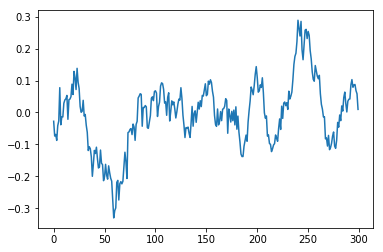

In [18]:
plt.plot( results['W'][-1].T)
#weight_movie.gen_weights_movie(np.array(results['W']),'movie','test' )

In [29]:
sys.path.append('../selfPackages/')
import inlineMovies
#print(np.random.rand(10,10)[2])
inlineMovies.generatePlot(Ydata=np.array(results['W'])[:,0,:],Xdata=None,xlim=None,ylim=None,frames=100,interval=20)